In [ ]:

# Importing the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import randint


# Plots
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff


# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier


# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the file
diabetes_df = pd.read_csv("drive/Shareddrives/Data Visualization - Group Project/diabetes.csv")

In [ ]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
# Number of null values in each column
nulls_per_column = diabetes_df.isnull().sum()

print("nulls in each column: ")
print(nulls_per_column)

nulls in each column: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Count the 0 values in each column of our dataframe
zero_counts = (diabetes_df == 0).sum()
print(f"Zero count in each column\n{zero_counts}")

Zero count in each column
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
features_variables_original = diabetes_df.iloc[:, 0:8]

outcome_variable_original = diabetes_df.iloc[:, -1]

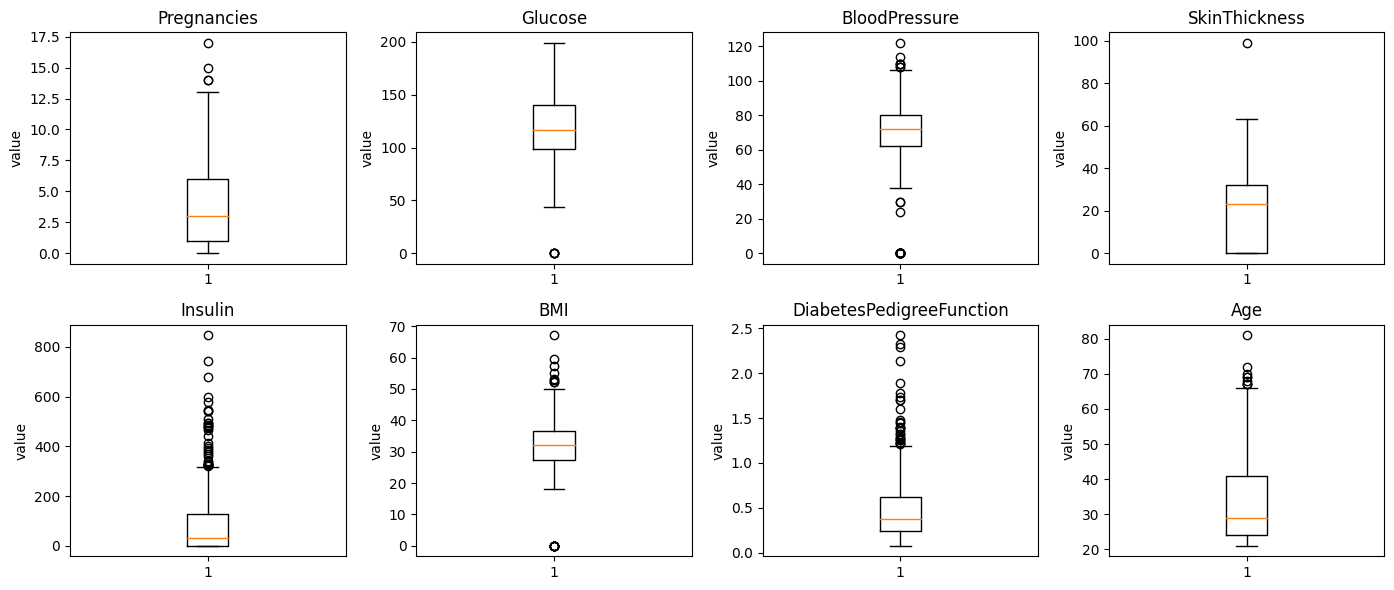

In [ ]:
#plot the variables to check for outliers on Original data
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(features_variables_original.columns):
    axs[i].boxplot(features_variables_original[feature],)
    axs[i].set_title(feature)
    axs[i].set_ylabel('value')

# Remove any unused subplots
for j in range(len(features_variables_original.columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Creating a copy of the data frame for comparison of raw and cleaned data
# While comparing data after imputation, diabetes_df will be the uncleaned raw data while diabetes_df_working will contain clean data
diabetes_df_working = diabetes_df.copy()

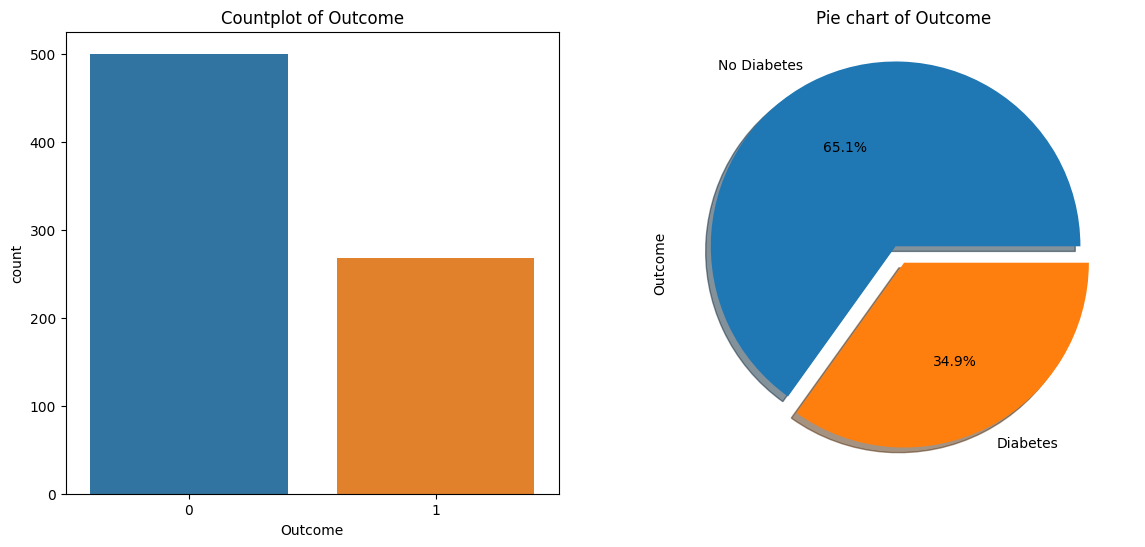

In [ ]:
# Countplot and pie plot of Outcome
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#countplot
axes[0].set_title('Countplot of Outcome')
sns.countplot(data=diabetes_df, x='Outcome', ax=axes[0])
#,color='orange', edgecolor='orchid'

# Pie plot
axes[1].set_title('Pie chart of Outcome')
diabetes_df["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No Diabetes", "Diabetes"], shadow=True,ax=axes[1])

plt.show()

## Univariate analyses - Box plots and Violin plots with winsorization

### Pregnancies

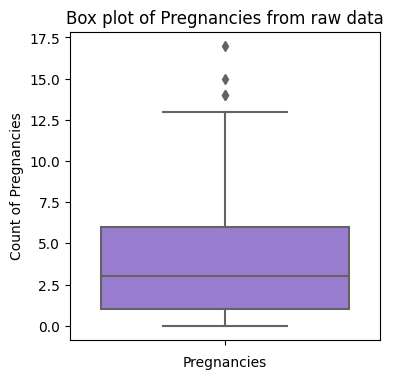

In [ ]:
# Creating box plot for Pregnancies
plt.figure(figsize=(4, 4))
sns.boxplot(y='Pregnancies', data=diabetes_df, color='mediumpurple')

# Setting the title for the box plot
plt.title("Box plot of Pregnancies from raw data")

# Setting the x and y labels for the box plot
plt.xlabel("Pregnancies")
plt.ylabel("Count of Pregnancies")

# Displaying the box plot
plt.show()

# Winsorization to be done on outliers

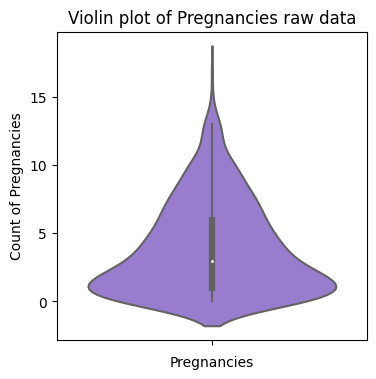

In [ ]:
# Creating the violin plot for Pregnancies

# Setting the size of violin plot for Pregnancies
plt.figure(figsize=(4, 4))

# Plotting the violin plot for Pregnancies
sns.violinplot(y ="Pregnancies",data = diabetes_df_working, color='mediumpurple')

# Setting the title for the violin plot
plt.title("Violin plot of Pregnancies raw data")

# Setting the y labels for the violin plot
plt.xlabel("Pregnancies")
plt.ylabel("Count of Pregnancies")

# Displaying the violin plot
plt.show()

In [ ]:
# Winsorization process for capping outliers
# Calculating the 25th, 75th and 95th percentile for Pregnancies
quartile1_preg = diabetes_df_working['Pregnancies'].quantile(0.25)
quartile3_preg = diabetes_df_working['Pregnancies'].quantile(0.75)
quartile_95_preg = diabetes_df_working['Pregnancies'].quantile(0.95)

# Calculating the IQR
interquartile_range_preg = quartile3_preg - quartile1_preg

#Calculating upper and lower whiskers
upper_limit_preg = quartile3_preg + 1.5 * interquartile_range_preg
lower_limit_preg = quartile1_preg - 1.5 * interquartile_range_preg

print(upper_limit_preg)
print(math.ceil(upper_limit_preg))
print(lower_limit_preg)
print(quartile_95_preg)

# We are selecting 95th percentile value for winsorization
# Creating a new column Pregnancies_winsorize_95 which contains 95th percentile value wherever there are outliers in Pregnancies (value is >= rounded up value of upper limit since Pregnancies can't have decimals)
diabetes_df_working["Pregnancies_winsorize_95"] = np.where(diabetes_df_working["Pregnancies"] >= math.ceil(upper_limit_preg), quartile_95_preg, diabetes_df_working["Pregnancies"])

13.5
14
-6.5
10.0


In [ ]:
# Checking to make sure the winsorization was applied correctly
diabetes_df_working.loc[diabetes_df_working['Pregnancies'] >= math.ceil(upper_limit_preg)]

# Winsorization has been done correctly for 4 values

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_winsorize_95  
88                      0.153   43        1                      10.0  
159                     0.817   47        1                      10.0  
298                     0.412   46        1                      10.0  
455                     0.212   38        1                      10.0

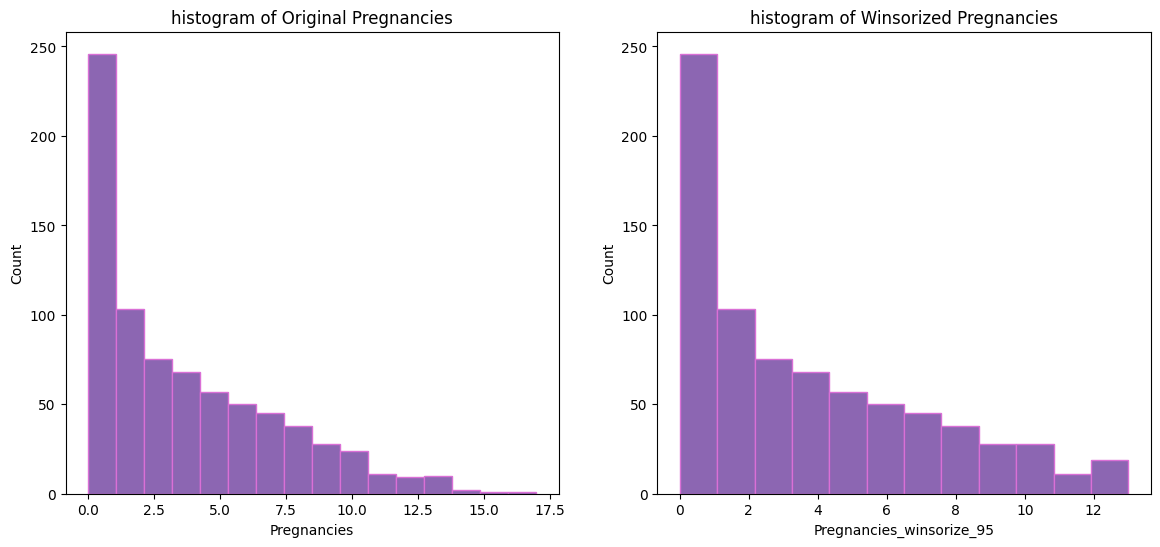

In [ ]:
# Pregnancies subplots for comparing pre and post winsorization
# Define plotting region (1 row, 2 columns)
# Fig size has 2 arguments: width and height
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Creating histogram in each subplot

# Part 1: raw data
axes[0].set_title('histogram of Original Pregnancies')
sns.histplot(data=diabetes_df, x='Pregnancies',color='rebeccapurple', edgecolor='orchid', ax=axes[0])

# Part 2: winsorized Pregnancies values
axes[1].set_title('histogram of Winsorized Pregnancies')
sns.histplot(data=diabetes_df_working, x='Pregnancies_winsorize_95',color='rebeccapurple', edgecolor='orchid', ax=axes[1])


plt.show()

### Glucose

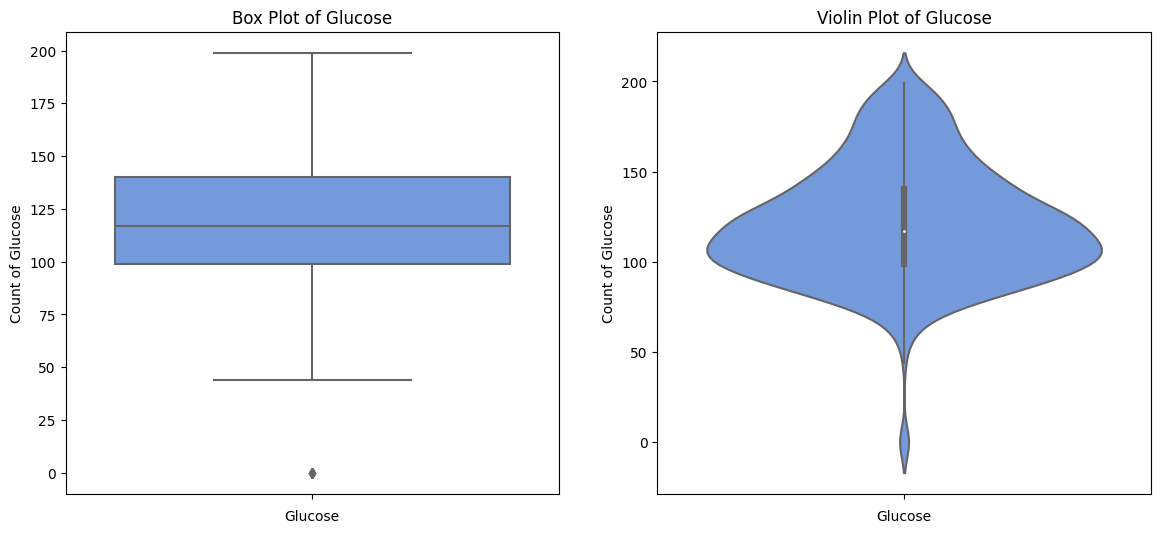

In [ ]:
# Creating box plot and violin plot for Glucose
# Define plotting region (1 row, 2 columns)
# Fig size has 2 arguments: width and height
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# box plot
axes[0].set_title('Box Plot of Glucose')
sns.boxplot(y='Glucose', data=diabetes_df_working, color='cornflowerblue', ax=axes[0])
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Count of Glucose')

# violin plot
axes[1].set_title('Violin Plot of Glucose')
sns.violinplot(data=diabetes_df_working, y='Glucose',color='cornflowerblue', ax=axes[1])
axes[1].set_xlabel('Glucose')
axes[1].set_ylabel('Count of Glucose')

plt.show()

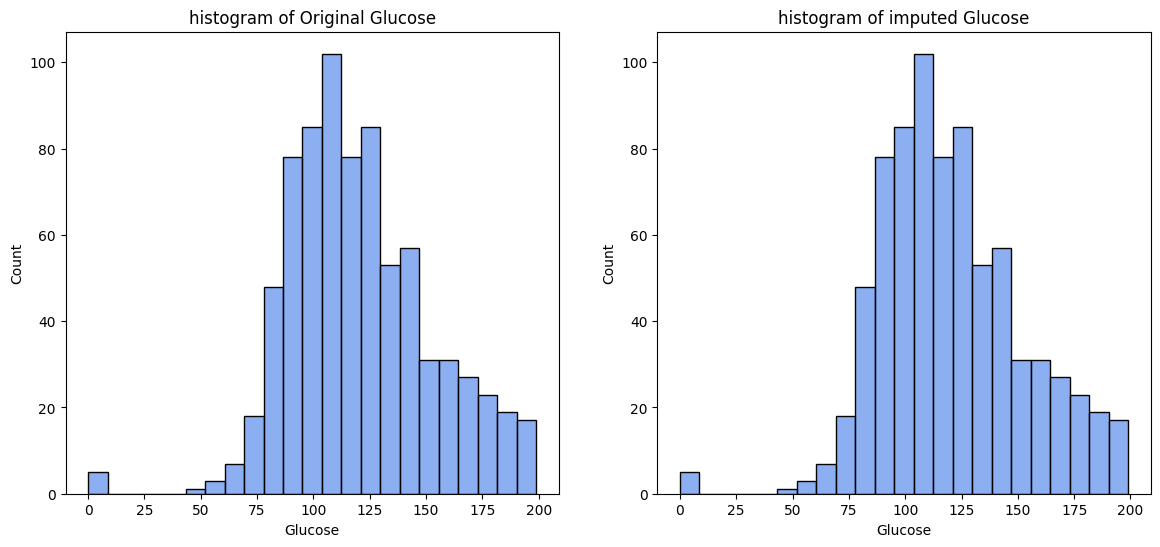

In [ ]:
# Glucose subplots for comparing pre and post imputation
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Creating histogram in each subplot

# Part 1: raw data
axes[0].set_title('histogram of Original Glucose')
sns.histplot(data=diabetes_df, x='Glucose',color='cornflowerblue', ax=axes[0])

# Part 2: imputed Glucose values
axes[1].set_title('histogram of imputed Glucose')
sns.histplot(data=diabetes_df_working, x='Glucose',color='cornflowerblue', ax=axes[1])


plt.show()

### BloodPressure

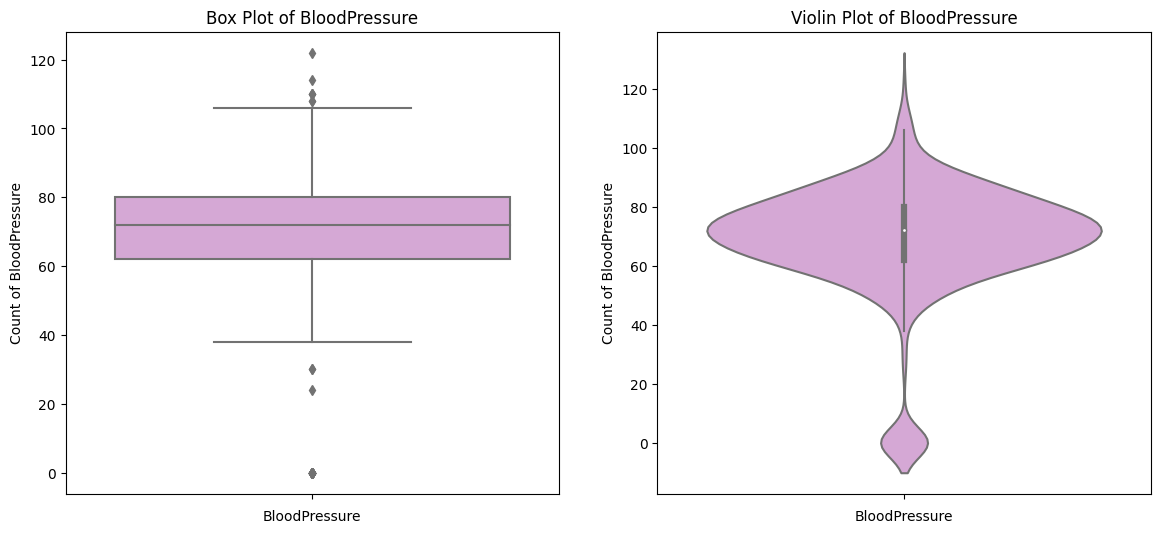

In [ ]:
#Subplots for BloodPressure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# box plot
axes[0].set_title('Box Plot of BloodPressure')
sns.boxplot(y='BloodPressure', data=diabetes_df_working, color='plum', ax=axes[0])
axes[0].set_xlabel('BloodPressure')
axes[0].set_ylabel('Count of BloodPressure')

# violin plot
axes[1].set_title('Violin Plot of BloodPressure')
sns.violinplot(data=diabetes_df_working, y='BloodPressure',color='plum', ax=axes[1])
axes[1].set_xlabel('BloodPressure')
axes[1].set_ylabel('Count of BloodPressure')

plt.show()

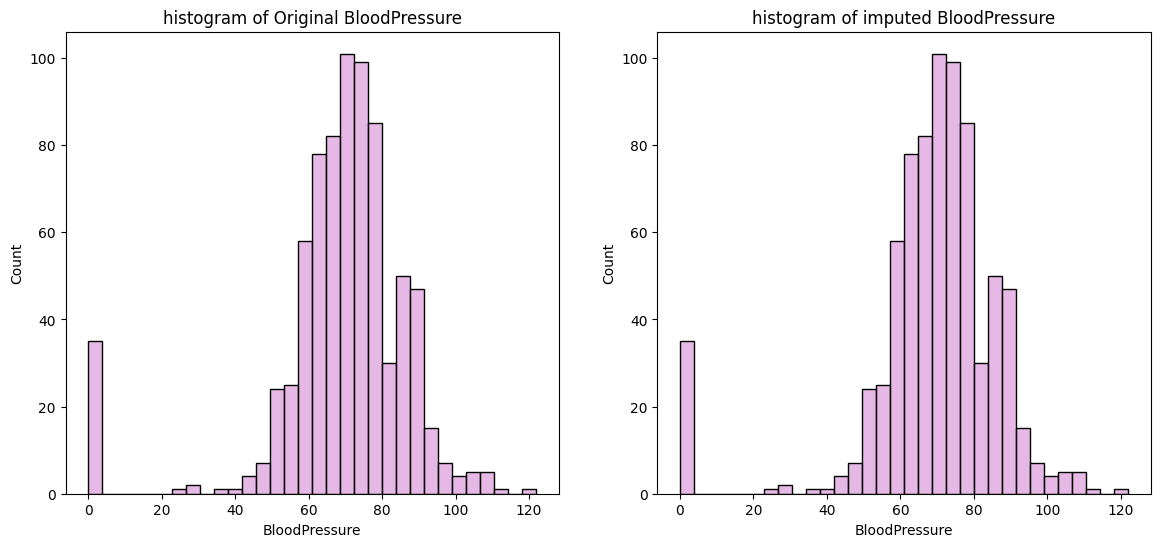

In [ ]:
# BloodPressure subplots for comparing pre and post imputation
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Creating histogram in each subplot

# Part 1: raw data
axes[0].set_title('histogram of Original BloodPressure')
sns.histplot(data=diabetes_df, x='BloodPressure',color='plum', ax=axes[0])

# Part 2: imputed BloodPressure values
axes[1].set_title('histogram of imputed BloodPressure')
sns.histplot(data=diabetes_df_working, x='BloodPressure',color='plum', ax=axes[1])


plt.show()

### BMI

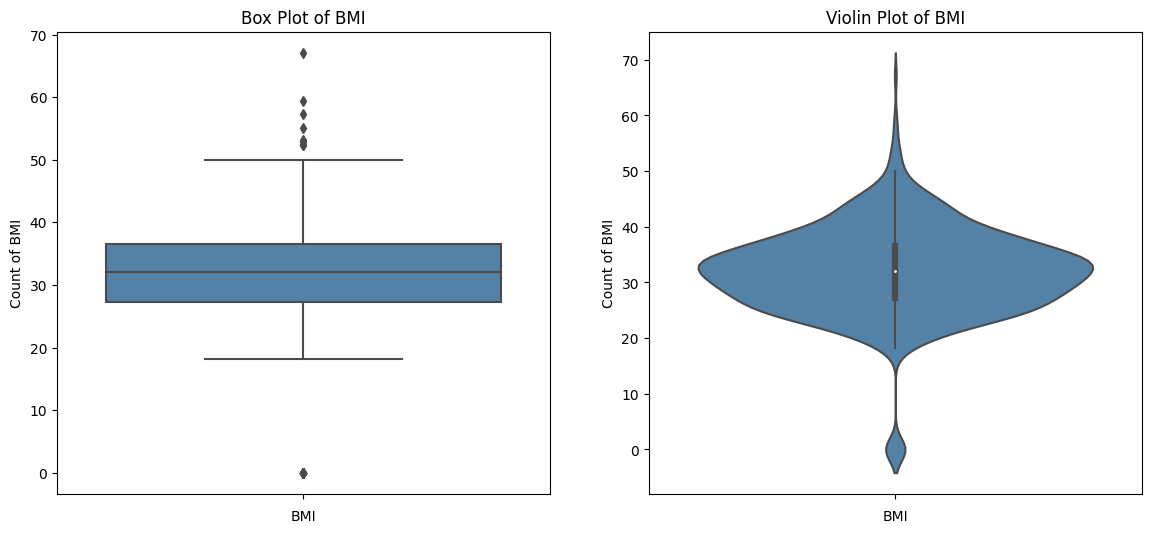

In [ ]:
#Subplots for BMI
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# box plot
axes[0].set_title('Box Plot of BMI')
sns.boxplot(y='BMI', data=diabetes_df_working, color='steelblue', ax=axes[0])
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Count of BMI')

# violin plot
axes[1].set_title('Violin Plot of BMI')
sns.violinplot(data=diabetes_df_working, y='BMI',color='steelblue', ax=axes[1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Count of BMI')

plt.show()

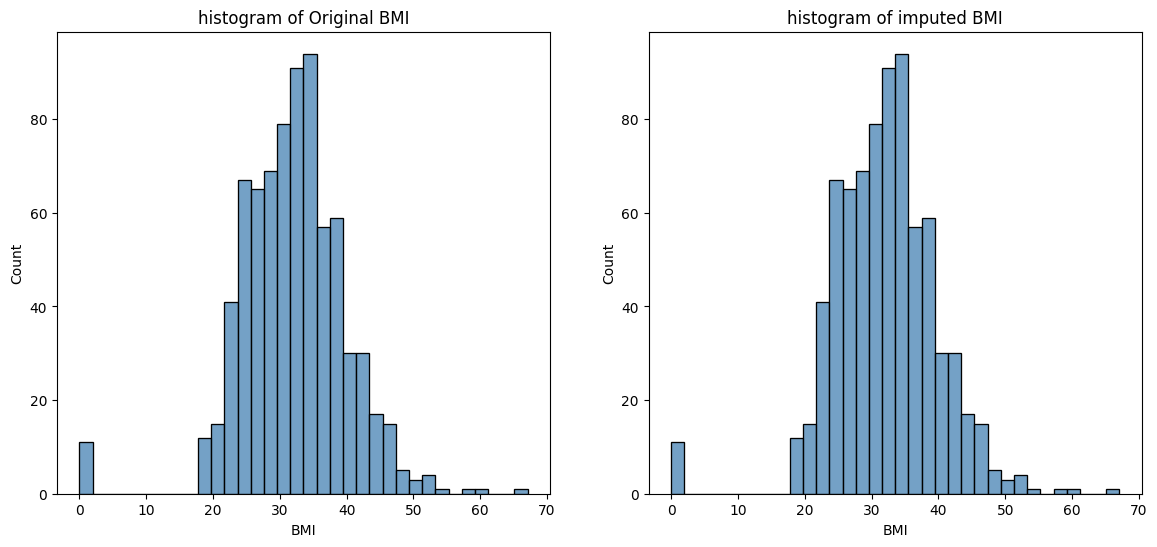

In [ ]:

# BMI subplots for comparing pre and post imputation
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Creating histogram in each subplot

# Part 1: raw data
axes[0].set_title('histogram of Original BMI')
sns.histplot(data=diabetes_df, x='BMI',color='steelblue', ax=axes[0])

# Part 2: imputed BloodPressure values
axes[1].set_title('histogram of imputed BMI')
sns.histplot(data=diabetes_df_working, x='BMI',color='steelblue', ax=axes[1])


plt.show()


### DiabetesPedigreeFunction

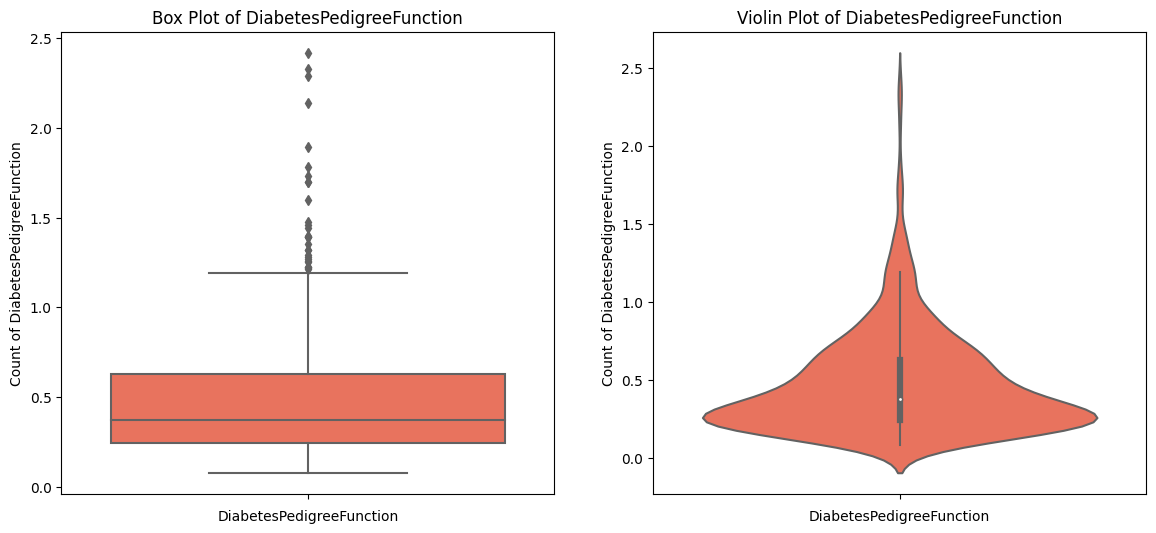

In [ ]:
#Subplots for DiabetesPedigreeFunction
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# box plot
axes[0].set_title('Box Plot of DiabetesPedigreeFunction')
sns.boxplot(y='DiabetesPedigreeFunction', data=diabetes_df_working, color='tomato', ax=axes[0])
axes[0].set_xlabel('DiabetesPedigreeFunction')
axes[0].set_ylabel('Count of DiabetesPedigreeFunction')

# violin plot
axes[1].set_title('Violin Plot of DiabetesPedigreeFunction')
sns.violinplot(data=diabetes_df_working, y='DiabetesPedigreeFunction',color='tomato', ax=axes[1])
axes[1].set_xlabel('DiabetesPedigreeFunction')
axes[1].set_ylabel('Count of DiabetesPedigreeFunction')

plt.show()

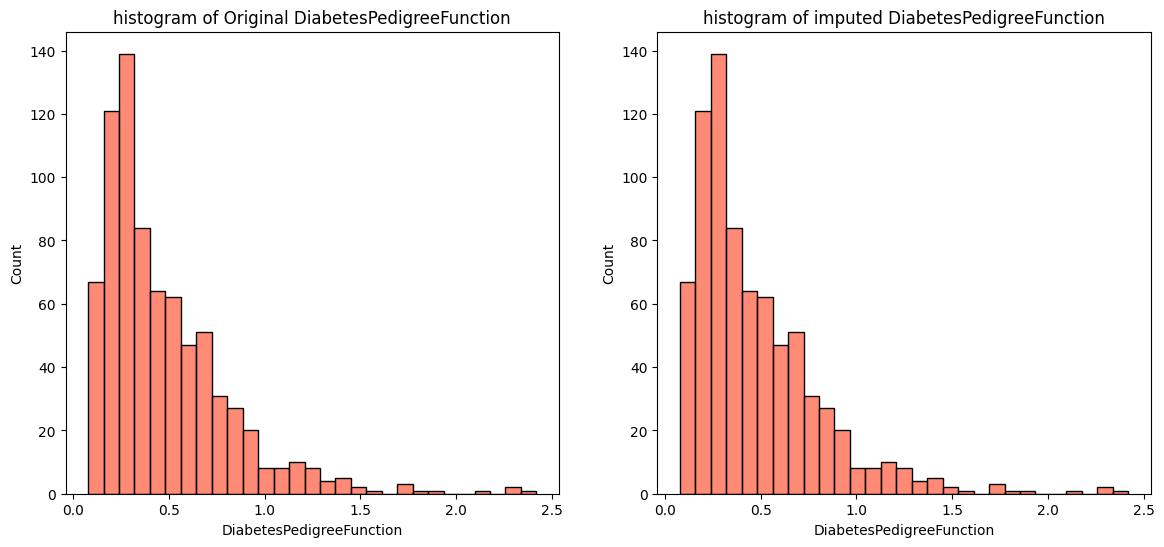

In [ ]:
# DiabetesPedigreeFunction subplots for comparing pre and post imputation
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Creating histogram in each subplot

# Part 1: raw data
axes[0].set_title('histogram of Original DiabetesPedigreeFunction')
sns.histplot(data=diabetes_df, x='DiabetesPedigreeFunction',color='tomato', ax=axes[0])

# Part 2: imputed BloodPressure values
axes[1].set_title('histogram of imputed DiabetesPedigreeFunction')
sns.histplot(data=diabetes_df_working, x='DiabetesPedigreeFunction',color='tomato', ax=axes[1])

plt.show()

### Age

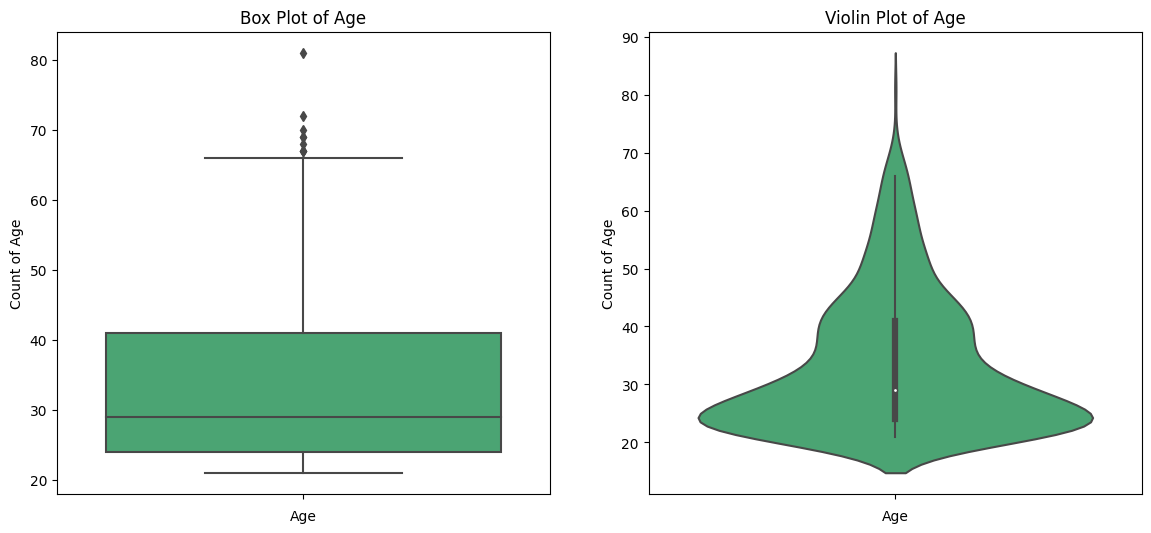

In [ ]:
#Subplots for Age
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# box plot
axes[0].set_title('Box Plot of Age')
sns.boxplot(y='Age', data=diabetes_df_working, color='mediumseagreen', ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count of Age')

# violin plot
axes[1].set_title('Violin Plot of Age')
sns.violinplot(data=diabetes_df_working, y='Age',color='mediumseagreen', ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count of Age')

plt.show()

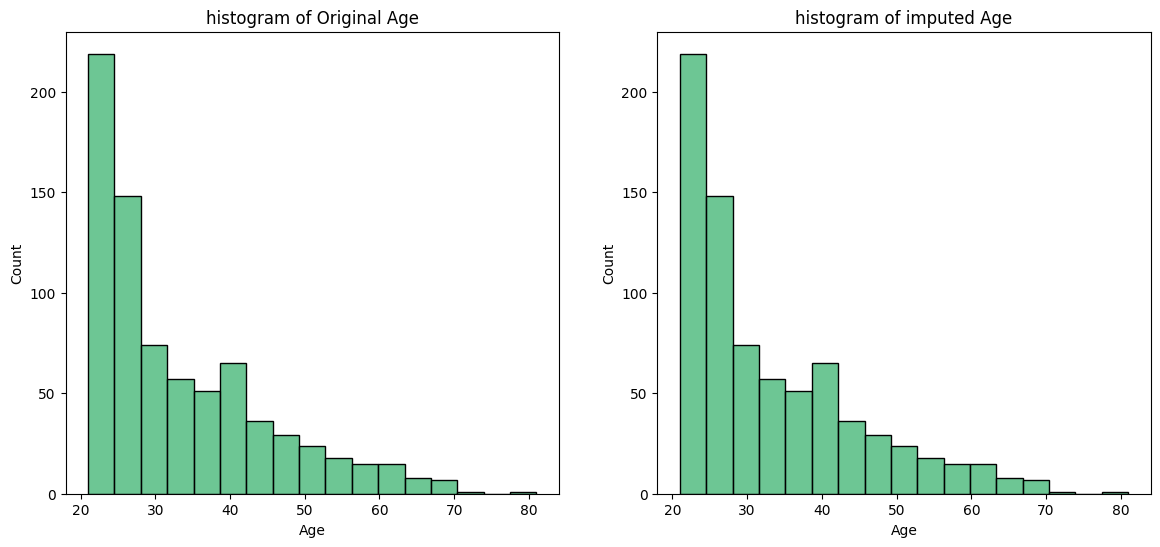

In [ ]:
# Age subplots for comparing pre and post imputation
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Creating histogram in each subplot

# Part 1: raw data
axes[0].set_title('histogram of Original Age')
sns.histplot(data=diabetes_df, x='Age',color='mediumseagreen', ax=axes[0])

# Part 2: imputed BloodPressure values
axes[1].set_title('histogram of imputed Age')
sns.histplot(data=diabetes_df_working, x='Age',color='mediumseagreen', ax=axes[1])


plt.show()

### Skin Thickness

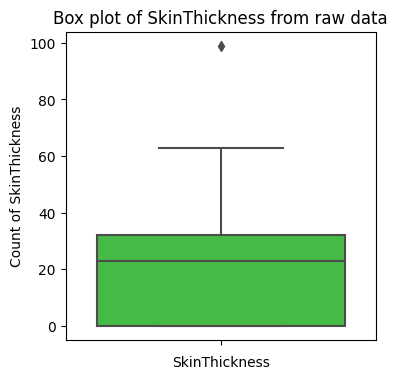

In [ ]:
# Creating box plot for SkinThickness
plt.figure(figsize=(4, 4))

# Ploting the box plot for SkinThickness
sns.boxplot(y='SkinThickness', data=diabetes_df_working, color='limegreen')

# Setting the title for the box plot
plt.title("Box plot of SkinThickness from raw data")

# Setting the y labels for the box plot
plt.xlabel("SkinThickness")
plt.ylabel("Count of SkinThickness")

# Displaying the box plot
plt.show()

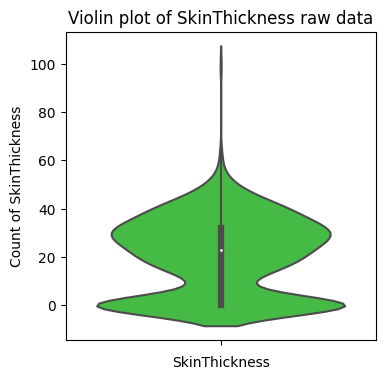

In [ ]:
# Creating the violin plot for SkinThickness

# Setting the size of violin plot for SkinThickness
plt.figure(figsize=(4, 4))

# Plotting the violin plot for SkinThickness
sns.violinplot(y ="SkinThickness",data = diabetes_df_working, color='limegreen')

# Setting the title for the violin plot
plt.title("Violin plot of SkinThickness raw data")

# Setting the y labels for the violin plot
plt.xlabel("SkinThickness")
plt.ylabel("Count of SkinThickness")

# Displaying the violin plot
plt.show()

In [ ]:
# Winsorization process for capping outliers
# Calculating the 25th, 75th and 95th percentile for Skin thickness
quartile1_st = diabetes_df_working['SkinThickness'].quantile(0.25)
quartile3_st = diabetes_df_working['SkinThickness'].quantile(0.75)
quartile_95_st = diabetes_df_working['SkinThickness'].quantile(0.95)

# Calculating the IQR
interquartile_range_st = quartile3_st - quartile1_st

# Calculating upper and lower whiskers
upper_limit_st = quartile3_st + 1.5 * interquartile_range_st
lower_limit_st = quartile1_st - 1.5 * interquartile_range_st

print(upper_limit_st)
print(lower_limit_st)
print(quartile_95_st)

# We are selecting 95th percentile value for winsorization
# Creating a new column Skinthickness_winsorize_95 which contains 95th percentile value wherever there are outliers in Skin thickness (value is >= upper limit)
diabetes_df_working["Skinthickness_winsorize_95"] = np.where(diabetes_df_working["SkinThickness"] >= upper_limit_st, quartile_95_st, diabetes_df_working["SkinThickness"])

80.0
-48.0
44.0


In [ ]:
# Checking to make sure the winsorization was applied correctly
diabetes_df_working[diabetes_df_working['SkinThickness'] >= upper_limit_st]

# Winsorization has been done correctly for 1 value

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2      197             70             99        0  34.7   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_winsorize_95  \
579                     0.575   62        1                       2.0   

     Skinthickness_winsorize_95  
579                        44.0

### Insulin

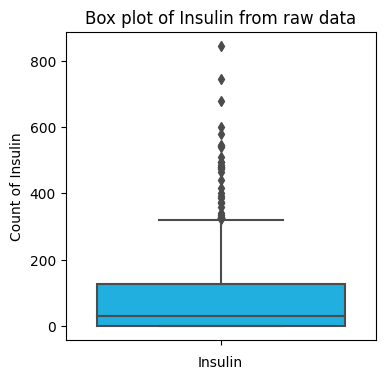

In [ ]:
# Creating box plot for Insulin
plt.figure(figsize=(4, 4))

sns.boxplot(y='Insulin', data=diabetes_df, color='deepskyblue')
# Setting the title for the box plot
plt.title("Box plot of Insulin from raw data")

# Setting the x and y labels for the box plot
plt.xlabel("Insulin")
plt.ylabel("Count of Insulin")

# Displaying the box plot
plt.show()

# No treatment is done on outliers for Insulin since ~49% of data is missing and we would like to preserve the original data as much as possible

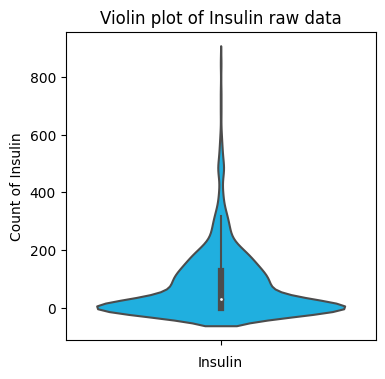

In [ ]:
# Creating the violin plot for Insulin

# Setting the size of violin plot for Insulin
plt.figure(figsize=(4, 4))

# Plotting the violin plot for Insulin
sns.violinplot(y ="Insulin",data = diabetes_df, color='deepskyblue')

# Setting the title for the violin plot
plt.title("Violin plot of Insulin raw data")

# Setting the y labels for the violin plot
plt.xlabel("Insulin")
plt.ylabel("Count of Insulin")

# Displaying the violin plot
plt.show()

In [ ]:
diabetes_df_working.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_winsorize_95', 'Skinthickness_winsorize_95'],
      dtype='object')

In [ ]:
# All columns except outcome
features_variables_winsorization = diabetes_df_working[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
               'BMI', 'DiabetesPedigreeFunction', 'Age',
               'Pregnancies_winsorize_95', 'Skinthickness_winsorize_95']]

#outcome column
outcome_variable_winsorization = diabetes_df_working['Outcome']

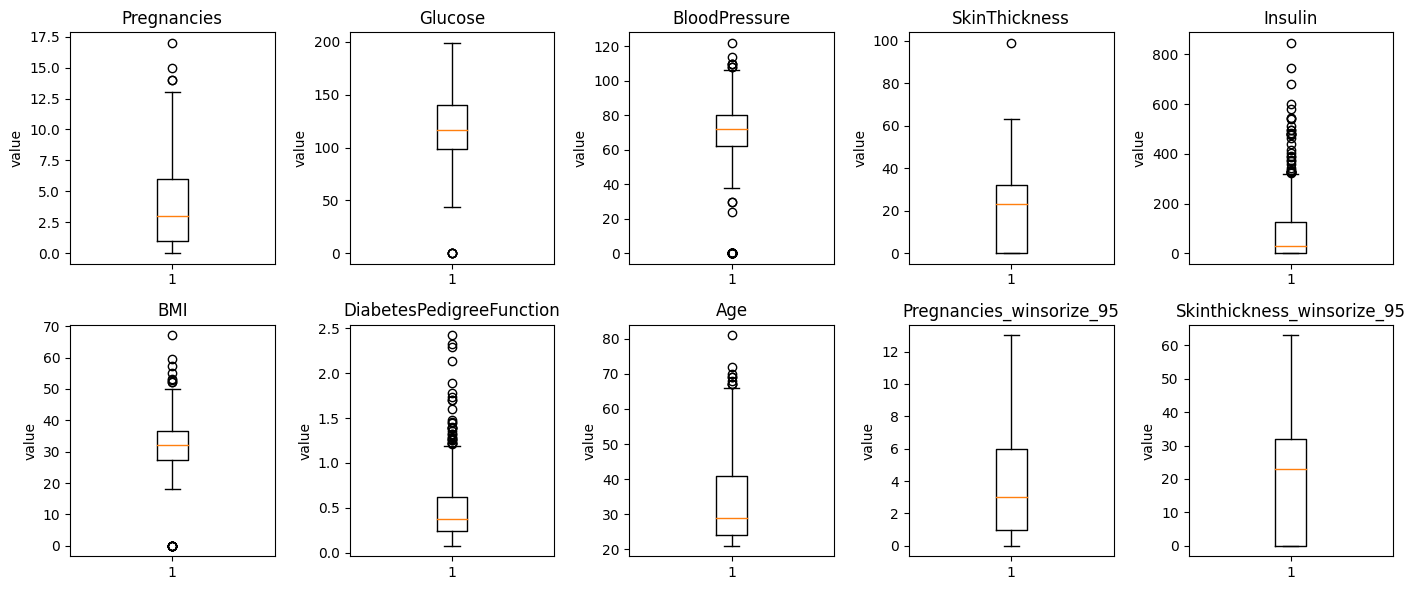

In [ ]:
#plot the variables to check for outliers after winsorization
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(features_variables_winsorization.columns):
    axs[i].boxplot(features_variables_winsorization[feature],)
    axs[i].set_title(feature)
    axs[i].set_ylabel('value')

# Remove any unused subplots
for j in range(len(features_variables_winsorization.columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

## Univariate analyses - Missing values and imputation

In [ ]:
# Missing values (0) - first replace with nan
# 0 is a valid value for Pregnancies, hence we are not replacing the 0 with nan
diabetes_df_working[['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'Skinthickness_winsorize_95']] = diabetes_df_working[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'Skinthickness_winsorize_95']
    ].replace(0,np.NaN)

In [ ]:
# Number of null values in each column
nulls_per_column_working = diabetes_df_working.isnull().sum()

print("Null values in each column: ")
print(nulls_per_column_working)

Null values in each column: 
Pregnancies                     0
Glucose                         5
BloodPressure                  35
SkinThickness                 227
Insulin                       374
BMI                            11
DiabetesPedigreeFunction        0
Age                             0
Outcome                         0
Pregnancies_winsorize_95        0
Skinthickness_winsorize_95    227
dtype: int64


In [ ]:
# Consolidated missing plot
def missing_plot_cons(df, column) :
    null_feat = pd.DataFrame(len(df[column]) - df.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(df[column]) - (len(df[column]) - df.isnull().sum()))
                                   /len(df[column])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,
                   opacity = 0.8, text = percentage_null['Count'],
                   textposition = 'auto',
                   marker=dict(color = '#7EC0EE',
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [ ]:
# Plot of each feature with missing value (count and %) of Outcome
missing_plot_cons(diabetes_df_working, 'Outcome')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>],
       [<Axes: title={'center': 'Pregnancies_winsorize_95'}>,
        <Axes: title={'center': 'Skinthickness_winsorize_95'}>, <Axes: >]],
      dtype=object)

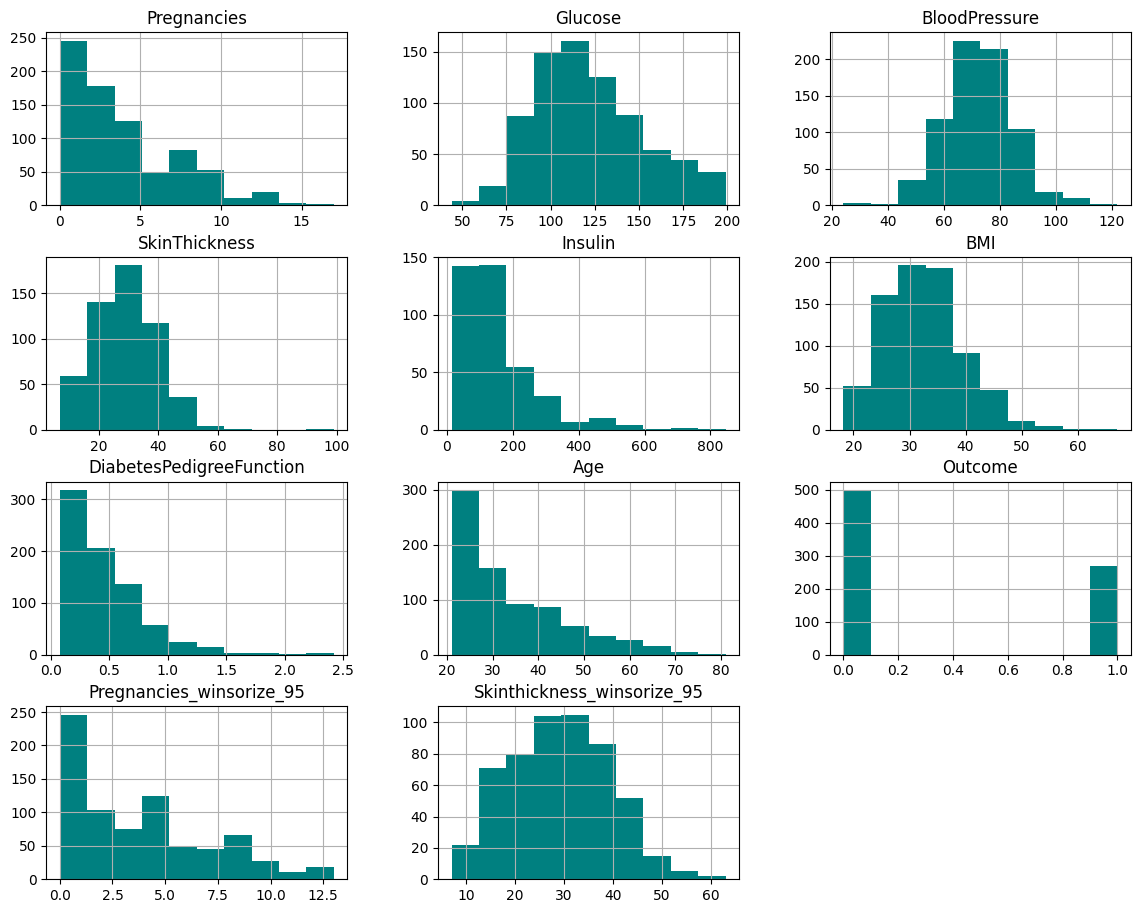

In [ ]:
# Consolidated list of histograms for all of the columns in the dataframe
diabetes_df_working.hist(figsize = (14,11), color="#008080")

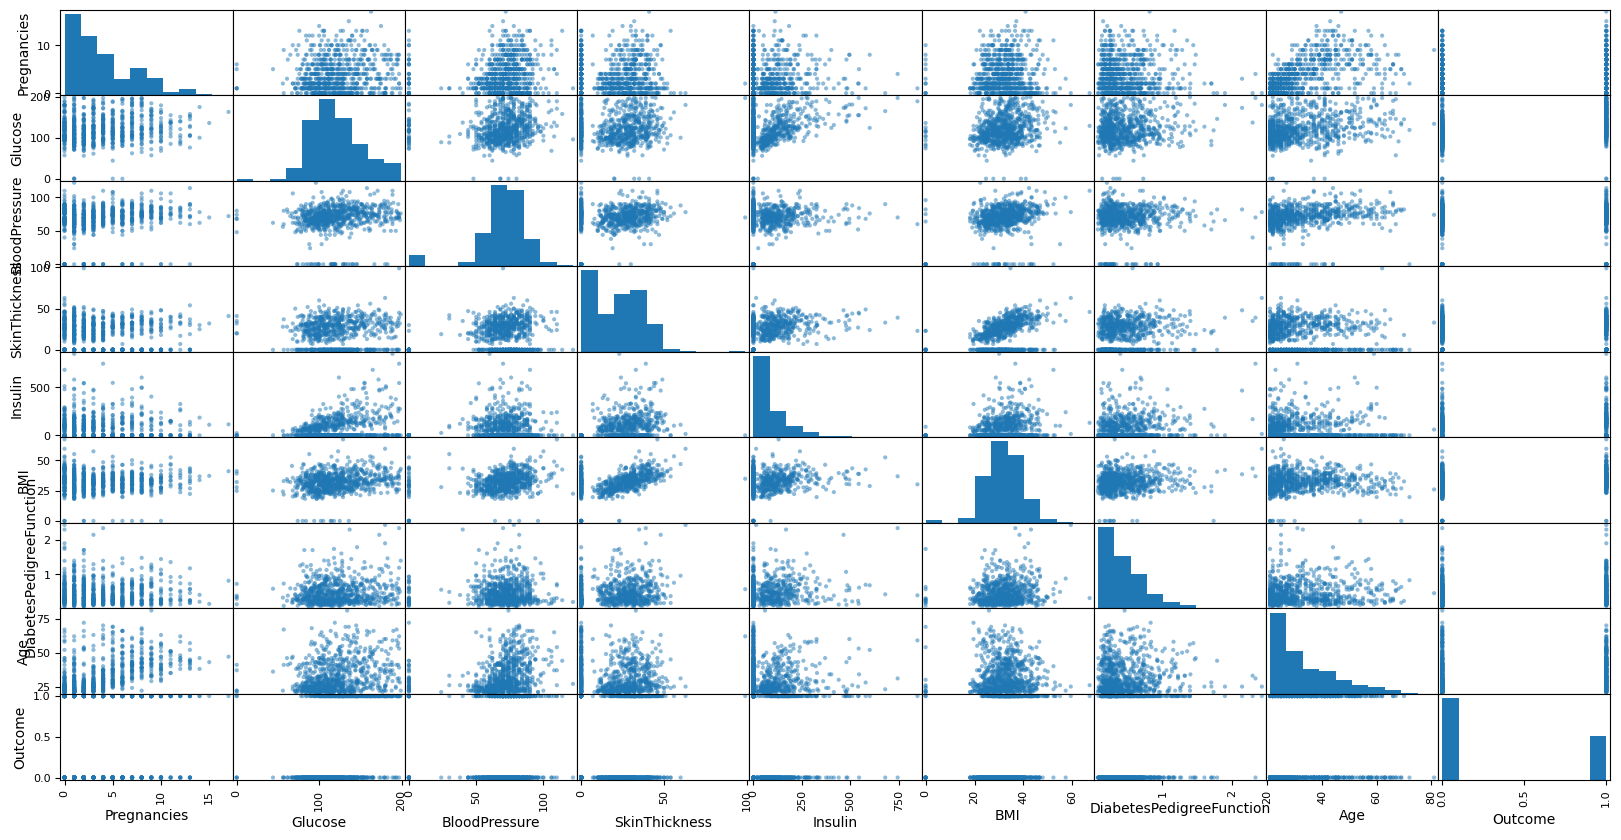

In [ ]:
# Scatter matrix
p=pd.plotting.scatter_matrix(diabetes_df,figsize=(20, 10))

### Imputation for columns with low volume of missing values based on visual inspection of the data distributions

Glucose

BMI

Blood Pressure

In [ ]:
# Median imputation for Glucose and BMI since they aren't looking like normal distributions
diabetes_df_working['Glucose'].fillna(diabetes_df_working['Glucose'].median(), inplace = True)
diabetes_df_working['BMI'].fillna(diabetes_df_working['BMI'].median(), inplace = True)

# Mean imputation for Blood Pressure since it looks like normal distribution
diabetes_df_working['BloodPressure'].fillna(diabetes_df_working['BloodPressure'].mean(), inplace = True)

### Class mean imputation for Skin thickness

In [ ]:
# Class mean imputation for SkinThickness
# Since SkinThickness is closely linked to BMI, we will create 5 buckets of BMI to represent class
# Then, this class combined with Outcome will be used to impute the SkinThickness

# Defining the custom ranges of BMI to facilitate imputation
bmi_group_edges = [0, 20, 25, 30, 35, 100] # custom bin buckets, max 100 is considered to account for anything > 35
bmi_group_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese', 'Morbidly obese']

# Creating a new column bmi_bucket with above defined cuts
diabetes_df_working['bmi_bucket'] = pd.cut(diabetes_df_working['BMI'],
                                           bins=bmi_group_edges, labels=bmi_group_labels)


# Grouping the df by bmi_bucket and Outcome and calculate the mean of non-null skinthickness for each group
st_imp_class_mean = diabetes_df_working.groupby(['bmi_bucket', 'Outcome'])['Skinthickness_winsorize_95'].mean()


# Function to impute missing values in skin thickness based on group mean
def class_mean_impute_st(row):
    # If Skinthickness is missing, return the class mean wrt to bmi_bucket and outcome
    if pd.isnull(row['Skinthickness_winsorize_95']):
        return st_imp_class_mean[(row['bmi_bucket'],row['Outcome'])]
    # Else, return the original value of skin thickness
    else:
        return row['Skinthickness_winsorize_95']

# Apply the imputation function to the dataframe and create a new column
diabetes_df_working['imputed_skinthickness'] = diabetes_df_working.apply(class_mean_impute_st, axis=1)

# Checking the inputed values
diabetes_df_working[diabetes_df_working['Skinthickness_winsorize_95'].isna()]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8    183.0      64.000000            NaN      NaN  23.3   
5              5    116.0      74.000000            NaN      NaN  25.6   
7             10    115.0      72.405184            NaN      NaN  35.3   
9              8    125.0      96.000000            NaN      NaN  32.3   
10             4    110.0      92.000000            NaN      NaN  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0    123.0      72.000000            NaN      NaN  36.3   
758            1    106.0      76.000000            NaN      NaN  37.5   
759            6    190.0      92.000000            NaN      NaN  35.5   
762            9     89.0      62.000000            NaN      NaN  22.5   
766            1    126.0      60.000000            NaN      NaN  30.1   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_winsorize_95  \
2                       0.672   32        1                       8.0   
5                       0.201   30        0                       5.0   
7                       0.134   29        0                      10.0   
9                       0.232   54        1                       8.0   
10                      0.191   30        0                       4.0   
..                        ...  ...      ...                       ...   
757                     0.258   52        1                       0.0   
758                     0.197   26        0                       1.0   
759                     0.278   66        1                       6.0   
762                     0.142   33        0                       9.0   
766                     0.349   47        1                       1.0   

     Skinthickness_winsorize_95      bmi_bucket  imputed_skinthickness  
2                           NaN         Healthy              15.000000  
5                           NaN      Overweight              22.760000  
7                           NaN  Morbidly obese              36.388350  
9                           NaN           Obese              31.257576  
10                          NaN  Morbidly obese              36.388350  
..                          ...             ...                    ...  
757                         NaN  Morbidly obese              37.035714  
758                         NaN  Morbidly obese              36.388350  
759                         NaN  Morbidly obese              37.035714  
762                         NaN         Healthy              18.629630  
766                         NaN           Obese              31.257576  

[227 rows x 13 columns]

In [ ]:
# Class mean imputation for SkinThickness (with BMI bucket only)
# Since SkinThickness is closely linked to BMI, we will create 5 buckets of BMI to represent class
# This class will be used to impute the SkinThickness

# Defining the custom ranges of BMI to facilitate imputation
bmi_group_edges = [0, 20, 25, 30, 35, 100] # custom bin buckets, max 100 is considered to account for anything > 35
bmi_group_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese', 'Morbidly obese']

# Creating a new column bmi_bucket with above defined cuts
diabetes_df_working['bmi_bucket'] = pd.cut(diabetes_df_working['BMI'],
                                           bins=bmi_group_edges, labels=bmi_group_labels)


# Grouping the df by bmi_bucket and calculate the mean of non-null skinthickness for each group
st_imp_class_mean = diabetes_df_working.groupby(['bmi_bucket'])['Skinthickness_winsorize_95'].mean()


# Function to impute missing values in skin thickness based on group mean
def class_mean_impute_st(row):
    # If Skinthickness is missing, return the class mean wrt to bmi_bucket
    if pd.isnull(row['Skinthickness_winsorize_95']):
        return st_imp_class_mean[(row['bmi_bucket'])]
    # Else, return the original value of skin thickness
    else:
        return row['Skinthickness_winsorize_95']

# Apply the imputation function to the dataframe and create a new column
diabetes_df_working['imputed_skinthickness_from_BMI_bucket'] = diabetes_df_working.apply(class_mean_impute_st, axis=1)

# Checking the inputed values
diabetes_df_working[diabetes_df_working['Skinthickness_winsorize_95'].isna()]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8    183.0      64.000000            NaN      NaN  23.3   
5              5    116.0      74.000000            NaN      NaN  25.6   
7             10    115.0      72.405184            NaN      NaN  35.3   
9              8    125.0      96.000000            NaN      NaN  32.3   
10             4    110.0      92.000000            NaN      NaN  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0    123.0      72.000000            NaN      NaN  36.3   
758            1    106.0      76.000000            NaN      NaN  37.5   
759            6    190.0      92.000000            NaN      NaN  35.5   
762            9     89.0      62.000000            NaN      NaN  22.5   
766            1    126.0      60.000000            NaN      NaN  30.1   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_winsorize_95  \
2                       0.672   32        1                       8.0   
5                       0.201   30        0                       5.0   
7                       0.134   29        0                      10.0   
9                       0.232   54        1                       8.0   
10                      0.191   30        0                       4.0   
..                        ...  ...      ...                       ...   
757                     0.258   52        1                       0.0   
758                     0.197   26        0                       1.0   
759                     0.278   66        1                       6.0   
762                     0.142   33        0                       9.0   
766                     0.349   47        1                       1.0   

     Skinthickness_winsorize_95      bmi_bucket  imputed_skinthickness  \
2                           NaN         Healthy              15.000000   
5                           NaN      Overweight              22.760000   
7                           NaN  Morbidly obese              36.388350   
9                           NaN           Obese              31.257576   
10                          NaN  Morbidly obese              36.388350   
..                          ...             ...                    ...   
757                         NaN  Morbidly obese              37.035714   
758                         NaN  Morbidly obese              36.388350   
759                         NaN  Morbidly obese              37.035714   
762                         NaN         Healthy              18.629630   
766                         NaN           Obese              31.257576   

     imputed_skinthickness_from_BMI_bucket  
2                                18.500000  
5                                23.101562  
7                                36.679144  
9                                29.378882  
10                               36.679144  
..                                     ...  
757                              36.679144  
758                              36.679144  
759                              36.679144  
762                              18.500000  
766                              29.378882  

[227 rows x 14 columns]

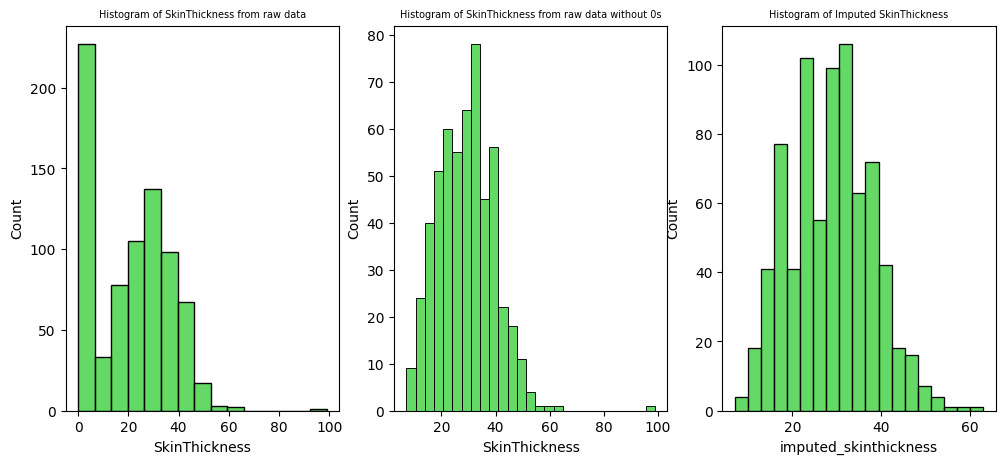

In [ ]:
# SkinThickness subplots for comparing pre and post imputation
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(12,5))
#figsize = (20,20)

# Creating histogram in each subplot
subplot_font_size_st = 7

# Part 1: raw data
sns.histplot(data=diabetes_df, x='SkinThickness', color='limegreen',ax=axes[0])
axes[0].set_title('Histogram of SkinThickness from raw data', fontsize=subplot_font_size_st)
# Part 2: raw data with non-zero SkinThickness values
sns.histplot(data=diabetes_df.loc[diabetes_df['SkinThickness'] > 0], x='SkinThickness', color='limegreen',ax=axes[1])
axes[1].set_title('Histogram of SkinThickness from raw data without 0s', fontsize=subplot_font_size_st)
# Part 3: imputed SkinThickness values
sns.histplot(data=diabetes_df_working, x='imputed_skinthickness',color='limegreen', ax=axes[2])
axes[2].set_title('Histogram of Imputed SkinThickness', fontsize=subplot_font_size_st)
plt.show()

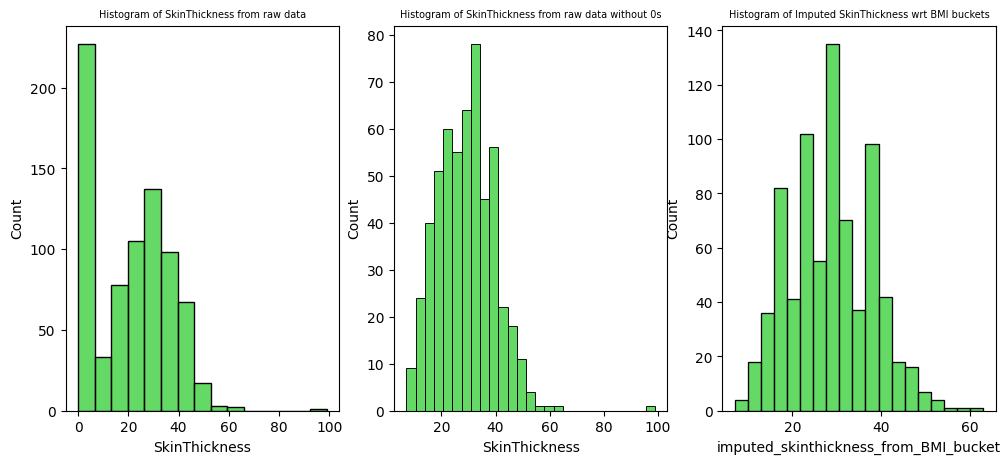

In [ ]:
# SkinThickness subplots for comparing pre and post imputation (without outcome)
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(12,5))
#figsize = (20,20)

# Creating histogram in each subplot
subplot_font_size_st = 7

# Part 1: raw data
sns.histplot(data=diabetes_df, x='SkinThickness', color='limegreen',ax=axes[0])
axes[0].set_title('Histogram of SkinThickness from raw data', fontsize=subplot_font_size_st)
# Part 2: raw data with non-zero SkinThickness values
sns.histplot(data=diabetes_df.loc[diabetes_df['SkinThickness'] > 0], x='SkinThickness', color='limegreen',ax=axes[1])
axes[1].set_title('Histogram of SkinThickness from raw data without 0s', fontsize=subplot_font_size_st)
# Part 3: imputed SkinThickness values
sns.histplot(data=diabetes_df_working, x='imputed_skinthickness_from_BMI_bucket',color='limegreen', ax=axes[2])
axes[2].set_title('Histogram of Imputed SkinThickness wrt BMI buckets', fontsize=subplot_font_size_st)
plt.show()

### Class mean imputation for Insulin

In [ ]:
# Class mean imputation for Insulin
# Since Insulin is closely linked to Glucose, we will create 4 buckets of Glucose to represent class
# Then, this class combined with Outcome will be used to impute the Insulin

# Defining the custom ranges of Glucose to facilitate imputation
#glucose_group_edges = [diabetes_df_working['Glucose'].min() - 1, 70, 100, 125, diabetes_df_working['Glucose'].max() + 1] # custom bin buckets
#glucose_group_labels = ['Low', 'Normal', 'Pre-diabetic', 'Diabetic']

# Defining the custom ranges of Glucose to facilitate imputation
glucose_group_edges = [0, 60, 80, 100, 120, 140, 160, 180, 200] # bin ranges based on looking at the data distribution
glucose_group_labels = [1, 2, 3, 4, 5, 6, 7, 8]


# Creating a new column glucose_bucket with above defined cuts
diabetes_df_working['glucose_bucket'] = pd.cut(diabetes_df_working['Glucose'],
                                           bins=glucose_group_edges, labels=glucose_group_labels)


# Grouping the df by glucose_bucket and Outcome and calculate the mean of non-null Insulin for each group
insulin_imp_class_mean = diabetes_df_working.groupby(['glucose_bucket', 'Outcome'])['Insulin'].mean()


# Function to impute missing values in insulin based on group mean
def class_mean_impute_insulin(row):
    # If Insulin is missing, return the class mean wrt to glucose_bucket and outcome
    if pd.isnull(row['Insulin']):
        return insulin_imp_class_mean[(row['glucose_bucket'],row['Outcome'])]
    # Else, return the original value of insulin
    else:
        return row['Insulin']

# Apply the imputation function to the dataframe and create a new column
diabetes_df_working['imputed_insulin'] = diabetes_df_working.apply(class_mean_impute_insulin, axis=1)

# Checking the inputed values
diabetes_df_working[diabetes_df_working['Insulin'].isna()]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0      72.000000           35.0      NaN  33.6   
1              1     85.0      66.000000           29.0      NaN  26.6   
2              8    183.0      64.000000            NaN      NaN  23.3   
5              5    116.0      74.000000            NaN      NaN  25.6   
7             10    115.0      72.405184            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0      74.000000           31.0      NaN  44.0   
762            9     89.0      62.000000            NaN      NaN  22.5   
764            2    122.0      70.000000           27.0      NaN  36.8   
766            1    126.0      60.000000            NaN      NaN  30.1   
767            1     93.0      70.000000           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_winsorize_95  \
0                       0.627   50        1                       6.0   
1                       0.351   31        0                       1.0   
2                       0.672   32        1                       8.0   
5                       0.201   30        0                       5.0   
7                       0.134   29        0                      10.0   
..                        ...  ...      ...                       ...   
761                     0.403   43        1                       9.0   
762                     0.142   33        0                       9.0   
764                     0.340   27        0                       2.0   
766                     0.349   47        1                       1.0   
767                     0.315   23        0                       1.0   

     Skinthickness_winsorize_95      bmi_bucket  imputed_skinthickness  \
0                          35.0           Obese              35.000000   
1                          29.0      Overweight              29.000000   
2                           NaN         Healthy              15.000000   
5                           NaN      Overweight              22.760000   
7                           NaN  Morbidly obese              36.388350   
..                          ...             ...                    ...   
761                        31.0  Morbidly obese              31.000000   
762                         NaN         Healthy              18.629630   
764                        27.0  Morbidly obese              27.000000   
766                         NaN           Obese              31.257576   
767                        31.0           Obese              31.000000   

     imputed_skinthickness_from_BMI_bucket glucose_bucket  imputed_insulin  
0                                35.000000              6       230.560000  
1                                29.000000              3        76.179775  
2                                18.500000              8       322.210526  
5                                23.101562              4       124.069444  
7                                36.679144              4       124.069444  
..                                     ...            ...              ...  
761                              31.000000              7       213.807692  
762                              18.500000              3        76.179775  
764                              27.000000              5       178.365385  
766                              29.378882              5       174.375000  
767                              31.000000              3        76.179775  

[374 rows x 16 columns]

In [ ]:
# Class mean imputation for Insulin with Glucose buckets only
# Since Insulin is closely linked to Glucose, we will create 4 buckets of Glucose to represent class
# This class  will be used to impute the Insulin

# Defining the custom ranges of Glucose to facilitate imputation
glucose_group_edges = [0, 60, 80, 100, 120, 140, 160, 180, 200] # bin ranges based on looking at the data distribution
glucose_group_labels = [1, 2, 3, 4, 5, 6, 7, 8]


# Creating a new column glucose_bucket with above defined cuts
diabetes_df_working['glucose_bucket'] = pd.cut(diabetes_df_working['Glucose'],
                                           bins=glucose_group_edges, labels=glucose_group_labels)


# Grouping the df by glucose_bucket and Outcome and calculate the mean of non-null Insulin for each group
insulin_imp_class_mean = diabetes_df_working.groupby(['glucose_bucket'])['Insulin'].mean()


# Function to impute missing values in insulin based on group mean
def class_mean_impute_insulin(row):
    # If Insulin is missing, return the class mean wrt to glucose_bucket
    if pd.isnull(row['Insulin']):
        return insulin_imp_class_mean[(row['glucose_bucket'])]
    # Else, return the original value of insulin
    else:
        return row['Insulin']

# Apply the imputation function to the dataframe and create a new column
diabetes_df_working['imputed_insulin_from_glucose_bucket'] = diabetes_df_working.apply(class_mean_impute_insulin, axis=1)

# Checking the inputed values
diabetes_df_working[diabetes_df_working['Insulin'].isna()]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0      72.000000           35.0      NaN  33.6   
1              1     85.0      66.000000           29.0      NaN  26.6   
2              8    183.0      64.000000            NaN      NaN  23.3   
5              5    116.0      74.000000            NaN      NaN  25.6   
7             10    115.0      72.405184            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0      74.000000           31.0      NaN  44.0   
762            9     89.0      62.000000            NaN      NaN  22.5   
764            2    122.0      70.000000           27.0      NaN  36.8   
766            1    126.0      60.000000            NaN      NaN  30.1   
767            1     93.0      70.000000           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_winsorize_95  \
0                       0.627   50        1                       6.0   
1                       0.351   31        0                       1.0   
2                       0.672   32        1                       8.0   
5                       0.201   30        0                       5.0   
7                       0.134   29        0                      10.0   
..                        ...  ...      ...                       ...   
761                     0.403   43        1                       9.0   
762                     0.142   33        0                       9.0   
764                     0.340   27        0                       2.0   
766                     0.349   47        1                       1.0   
767                     0.315   23        0                       1.0   

     Skinthickness_winsorize_95      bmi_bucket  imputed_skinthickness  \
0                          35.0           Obese              35.000000   
1                          29.0      Overweight              29.000000   
2                           NaN         Healthy              15.000000   
5                           NaN      Overweight              22.760000   
7                           NaN  Morbidly obese              36.388350   
..                          ...             ...                    ...   
761                        31.0  Morbidly obese              31.000000   
762                         NaN         Healthy              18.629630   
764                        27.0  Morbidly obese              27.000000   
766                         NaN           Obese              31.257576   
767                        31.0           Obese              31.000000   

     imputed_skinthickness_from_BMI_bucket glucose_bucket  imputed_insulin  \
0                                35.000000              6       230.560000   
1                                29.000000              3        76.179775   
2                                18.500000              8       322.210526   
5                                23.101562              4       124.069444   
7                                36.679144              4       124.069444   
..                                     ...            ...              ...   
761                              31.000000              7       213.807692   
762                              18.500000              3        76.179775   
764                              27.000000              5       178.365385   
766                              29.378882              5       174.375000   
767                              31.000000              3        76.179775   

     imputed_insulin_from_glucose_bucket  
0                             228.509804  
1                              82.581633  
2                             335.045455  
5                             127.269663  
7                             127.269663  
..                                   ...  
761                           220.750000  
762                            82.581633  
764                       

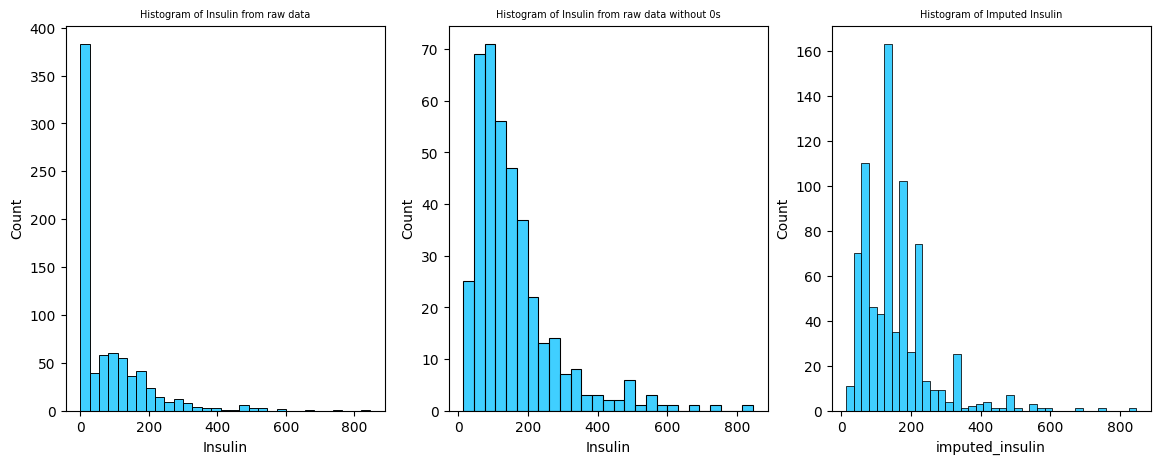

In [ ]:
# Insulin subplots for comparing pre and post imputation
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(14,5))

# Creating histogram in each subplot

subplot_font_size_in = 7

# Part 1: raw data
sns.histplot(data=diabetes_df, x='Insulin',  color='deepskyblue', ax=axes[0])
axes[0].set_title('Histogram of Insulin from raw data',fontsize=subplot_font_size_in)
# Part 2: raw data with non-zero Insulin values
sns.histplot(data=diabetes_df.loc[diabetes_df['Insulin'] > 0], x='Insulin', color='deepskyblue',ax=axes[1])
axes[1].set_title('Histogram of Insulin from raw data without 0s', fontsize=subplot_font_size_in)
# Part 3: imputed Insulin values
sns.histplot(data=diabetes_df_working, x='imputed_insulin', color='deepskyblue', ax=axes[2])
axes[2].set_title('Histogram of Imputed Insulin', fontsize=subplot_font_size_in)

plt.show()

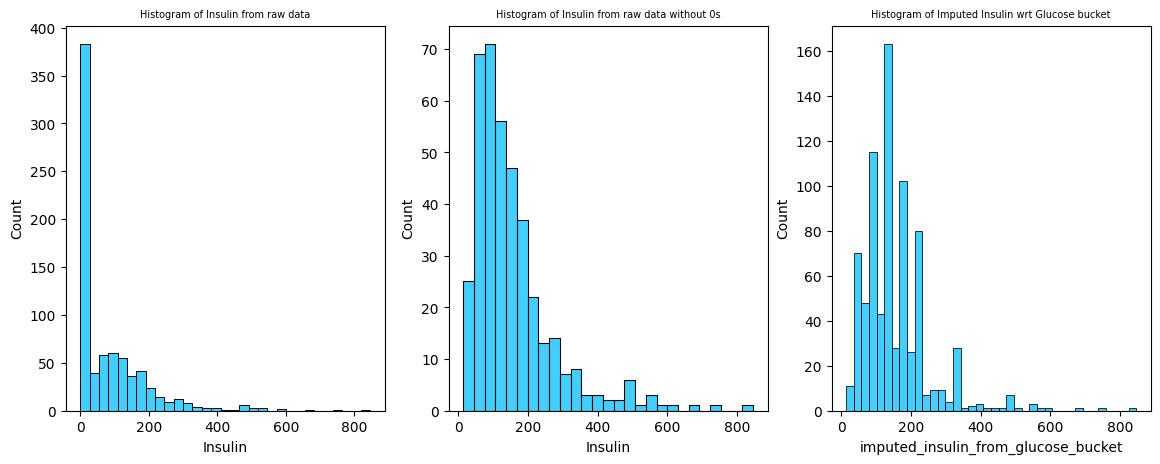

In [ ]:
# Insulin subplots for comparing pre and post imputation (with Glucose buckets only)
# Define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(14,5))

# Creating histogram in each subplot

subplot_font_size_in = 7

# Part 1: raw data
sns.histplot(data=diabetes_df, x='Insulin',  color='deepskyblue', ax=axes[0])
axes[0].set_title('Histogram of Insulin from raw data',fontsize=subplot_font_size_in)
# Part 2: raw data with non-zero Insulin values
sns.histplot(data=diabetes_df.loc[diabetes_df['Insulin'] > 0], x='Insulin', color='deepskyblue',ax=axes[1])
axes[1].set_title('Histogram of Insulin from raw data without 0s', fontsize=subplot_font_size_in)
# Part 3: imputed Insulin values
sns.histplot(data=diabetes_df_working, x='imputed_insulin_from_glucose_bucket', color='deepskyblue', ax=axes[2])
axes[2].set_title('Histogram of Imputed Insulin wrt Glucose bucket', fontsize=subplot_font_size_in)

plt.show()

## Bivariate analyses - Relationships between independent variables

### Correlation heatmap for raw data

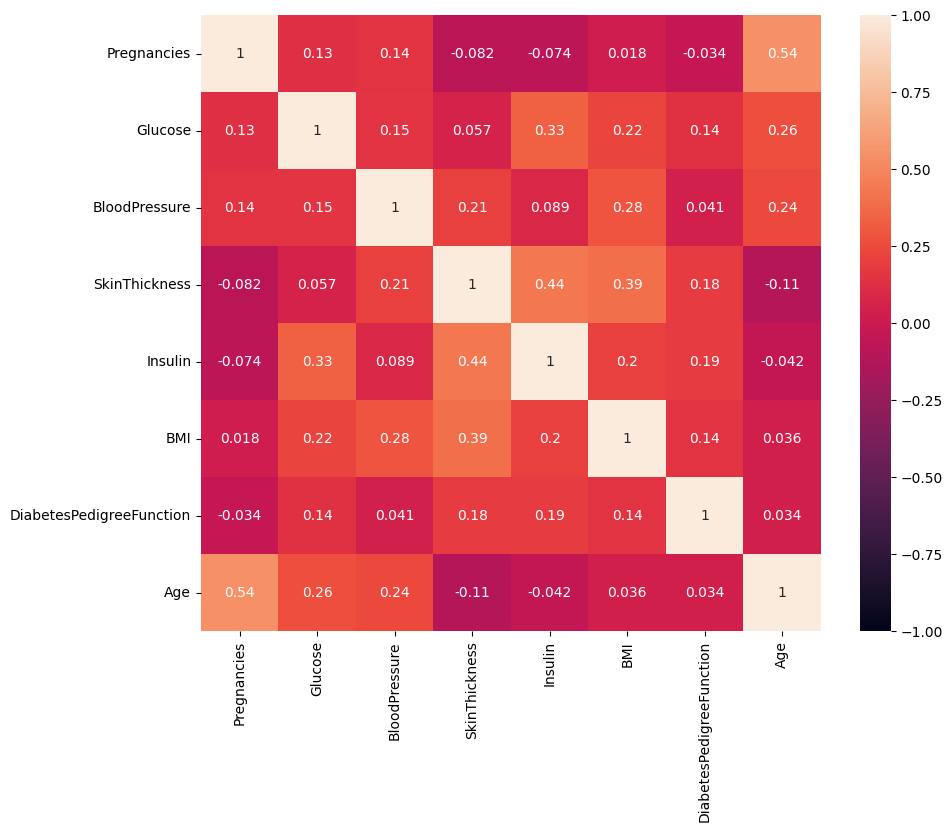

In [ ]:
# Heatmap to illustrate relationships between all independent variables -

# Setting size of figure with width 10 and height 8
plt.figure(figsize=(10,8))

# Calculating the correlation matrix on the numeric columns
corr = diabetes_df.loc[:, diabetes_df.columns!='Outcome'].select_dtypes('number').corr()

# Plotting the heatmap
sns.heatmap(corr, annot=True, vmin=-1,vmax=1)

# Displaying the heatmap
plt.show()

# No correlation observed between any of the independent variables

### Correlation heatmap for treated data

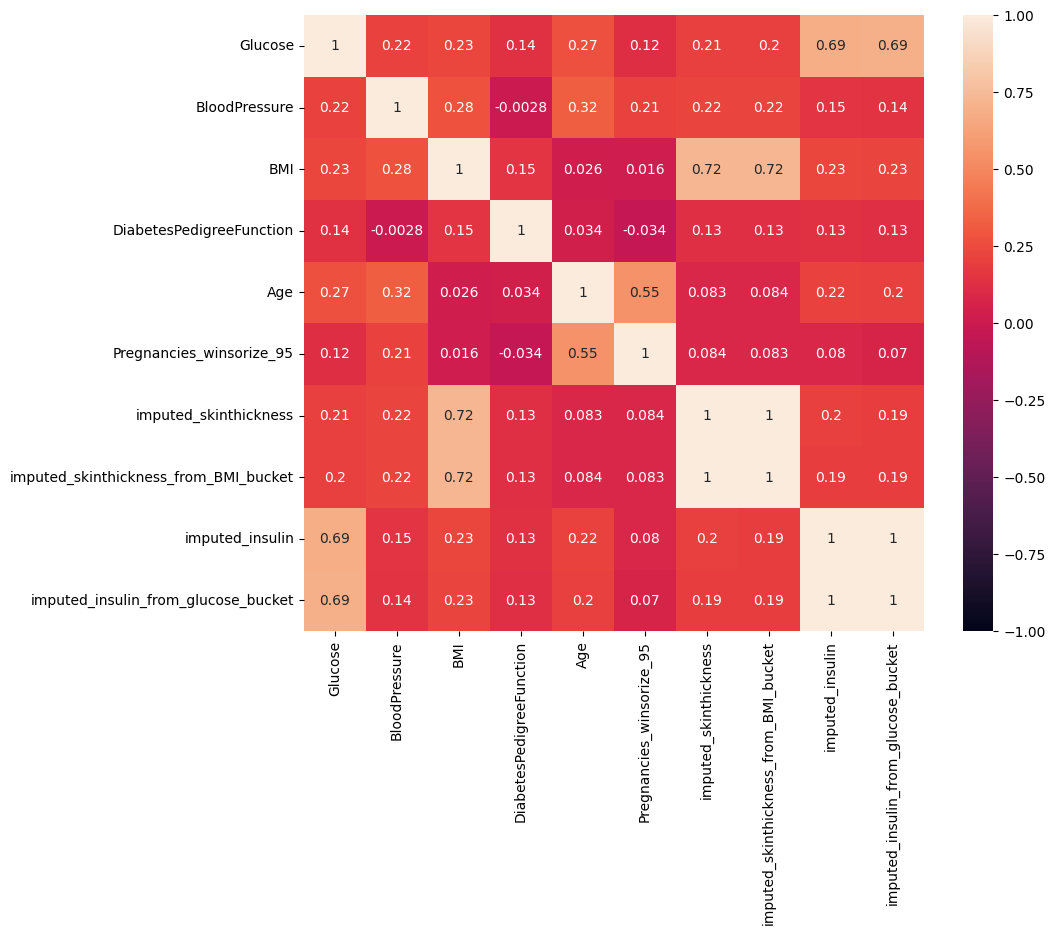

In [ ]:
# Heatmap to illustrate relationships between all independent variables

# Setting size of figure with width 10 and height 8
plt.figure(figsize=(10,8))

# Calculating the correlation matrix on the numeric columns
#corr = diabetes_df_working.loc[:, diabetes_df_working.columns!='Outcome'].select_dtypes('number').corr()
# We are removing outcome and other orginal values that have been imputed
corr = diabetes_df_working.loc[:, ~diabetes_df_working.columns.isin(['Outcome', 'Insulin', 'Pregnancies', 'SkinThickness', 'Skinthickness_winsorize_95'])].select_dtypes('number').corr()


# Plotting the heatmap
sns.heatmap(corr, annot=True,vmin=-1,vmax=1)

# Displaying the heatmap
plt.show()

# No correlation observed between any of the independent variables

### Scatter plot with sub-plot for relationship between SkinThickness and BMI

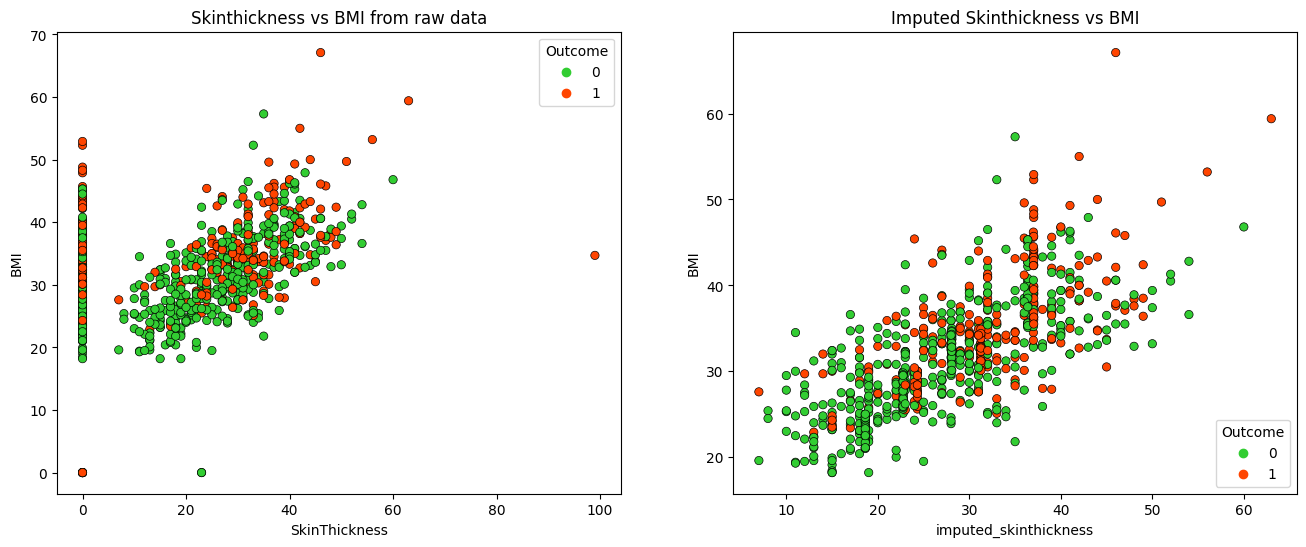

In [ ]:
# Plots for relationship between Skinthickness and BMI

# Define plotting region (1 row, 2 columns)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

palette ={0 : 'limegreen', 1 : 'orangered'}
edgecolor = 'black'

ax1.set_title('Skinthickness vs BMI from raw data')
ax1 = sns.scatterplot(x = diabetes_df['SkinThickness'], y = diabetes_df['BMI'], hue = "Outcome",
                    data = diabetes_df, palette = palette, edgecolor=edgecolor, ax=ax1)
plt.legend(loc='lower right', title='Outcome')

ax2.set_title('Imputed Skinthickness vs BMI')
ax2 = sns.scatterplot(x = diabetes_df_working['imputed_skinthickness'], y = diabetes_df_working['BMI'], hue = "Outcome",
                    data = diabetes_df_working, palette = palette, edgecolor=edgecolor, ax=ax2)
plt.legend(loc='lower right', title='Outcome')

#ax3.set_title('Imputed Skinthickness vs BMI')
#ax3 = sns.scatterplot(x = diabetes_df_working['imputed_skinthickness'], y = diabetes_df_working['bmi_bucket'], hue = "Outcome",
#                    data = diabetes_df_working, palette = palette, edgecolor=edgecolor, ax=ax3)
#plt.legend(loc='lower right', title='Outcome')


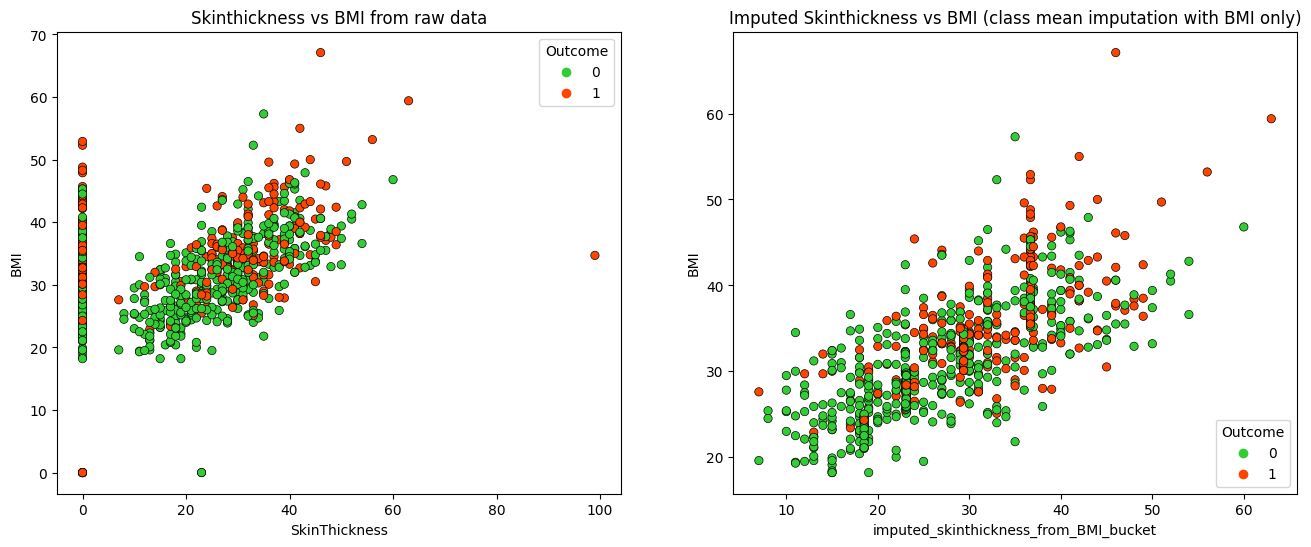

In [ ]:
# Plots for relationship between Skinthickness and BMI (without Outcome)

# Define plotting region (1 row, 2 columns)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

palette ={0 : 'limegreen', 1 : 'orangered'}
edgecolor = 'black'

ax1.set_title('Skinthickness vs BMI from raw data')
ax1 = sns.scatterplot(x = diabetes_df['SkinThickness'], y = diabetes_df['BMI'], hue = "Outcome",
                    data = diabetes_df, palette = palette, edgecolor=edgecolor, ax=ax1)
plt.legend(loc='lower right', title='Outcome')

ax2.set_title('Imputed Skinthickness vs BMI (class mean imputation with BMI only)')
ax2 = sns.scatterplot(x = diabetes_df_working['imputed_skinthickness_from_BMI_bucket'], y = diabetes_df_working['BMI'], hue = "Outcome",
                    data = diabetes_df_working, palette = palette, edgecolor=edgecolor, ax=ax2)
plt.legend(loc='lower right', title='Outcome')

#ax3.set_title('Imputed Skinthickness vs BMI')
#ax3 = sns.scatterplot(x = diabetes_df_working['imputed_skinthickness'], y = diabetes_df_working['bmi_bucket'], hue = "Outcome",
#                    data = diabetes_df_working, palette = palette, edgecolor=edgecolor, ax=ax3)
#plt.legend(loc='lower right', title='Outcome')


### Scatter plot with sub-plot for relationship between Insulin and Glucose

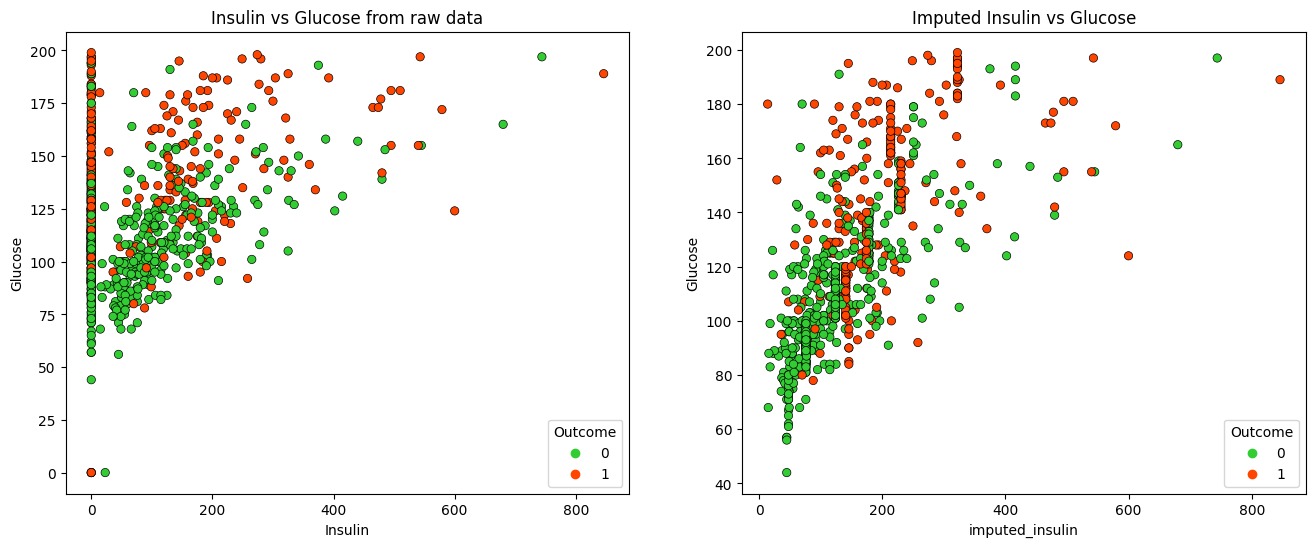

In [ ]:
# Plots for relationship between Insulin and Glucose

# Define plotting region (1 row, 2 columns)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

palette ={0 : 'limegreen', 1 : 'orangered'}
edgecolor = 'black'

ax1.set_title('Insulin vs Glucose from raw data')
ax1 = sns.scatterplot(x = diabetes_df['Insulin'], y = diabetes_df['Glucose'], hue = "Outcome",
                    data = diabetes_df, palette = palette, edgecolor=edgecolor, ax=ax1)
plt.legend(loc='lower right', title='Outcome')

ax2.set_title('Imputed Insulin vs Glucose')
ax2 = sns.scatterplot(x = diabetes_df_working['imputed_insulin'], y = diabetes_df_working['Glucose'], hue = "Outcome",
                    data = diabetes_df_working, palette = palette, edgecolor=edgecolor, ax=ax2)
plt.legend(loc='lower right', title='Outcome')


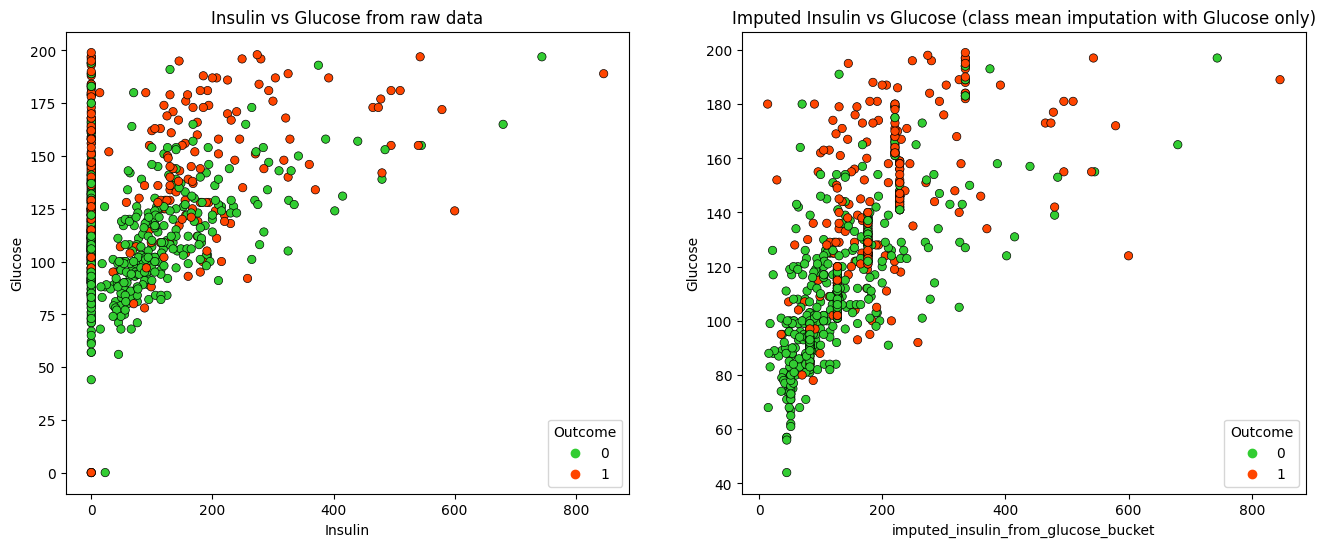

In [ ]:
# Plots for relationship between Insulin and Glucose (without Outcome)

# Define plotting region (1 row, 2 columns)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

palette ={0 : 'limegreen', 1 : 'orangered'}
edgecolor = 'black'

ax1.set_title('Insulin vs Glucose from raw data')
ax1 = sns.scatterplot(x = diabetes_df['Insulin'], y = diabetes_df['Glucose'], hue = "Outcome",
                    data = diabetes_df, palette = palette, edgecolor=edgecolor, ax=ax1)
plt.legend(loc='lower right', title='Outcome')

ax2.set_title('Imputed Insulin vs Glucose (class mean imputation with Glucose only)')
ax2 = sns.scatterplot(x = diabetes_df_working['imputed_insulin_from_glucose_bucket'], y = diabetes_df_working['Glucose'], hue = "Outcome",
                    data = diabetes_df_working, palette = palette, edgecolor=edgecolor, ax=ax2)
plt.legend(loc='lower right', title='Outcome')


## Bivariate analyses - Relationships between dependent and independent variables

Column with target feature analysis

1. Pregnancies

In [ ]:
desc = pd.concat([diabetes_df['Pregnancies'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'Pregnancies'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'Pregnancies'].describe()], axis=1)
desc.columns = ['Pregnancies','Pregnancies(Outcome=0)', 'Pregnancies(Outcome=1)']
desc

Pregnancies  Pregnancies(Outcome=0)  Pregnancies(Outcome=1)
count   768.000000              500.000000              268.000000
mean      3.845052                3.298000                4.865672
std       3.369578                3.017185                3.741239
min       0.000000                0.000000                0.000000
25%       1.000000                1.000000                1.750000
50%       3.000000                2.000000                4.000000
75%       6.000000                5.000000                8.000000
max      17.000000               13.000000               17.000000

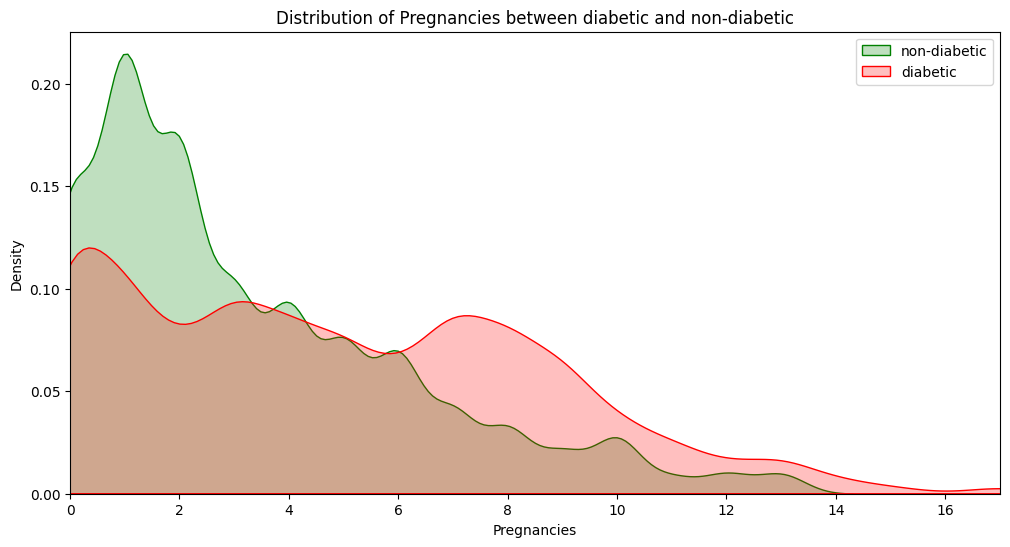

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='Pregnancies', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='Pregnancies', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['Pregnancies'].min(), diabetes_df['Pregnancies'].max())
ax.set_title('Distribution of Pregnancies between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-tests

In [ ]:
limit = 7
field = "Pregnancies"
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for Pregnancies - 5.065127298053476e-10
p-value for independent t-test between Pregnancies < 7 and Pregnancies >= 7 data - 4.3507830163225805e-189
Pregnancies >= 7 are 1.9463351233026642 times more likely to be diabetic.


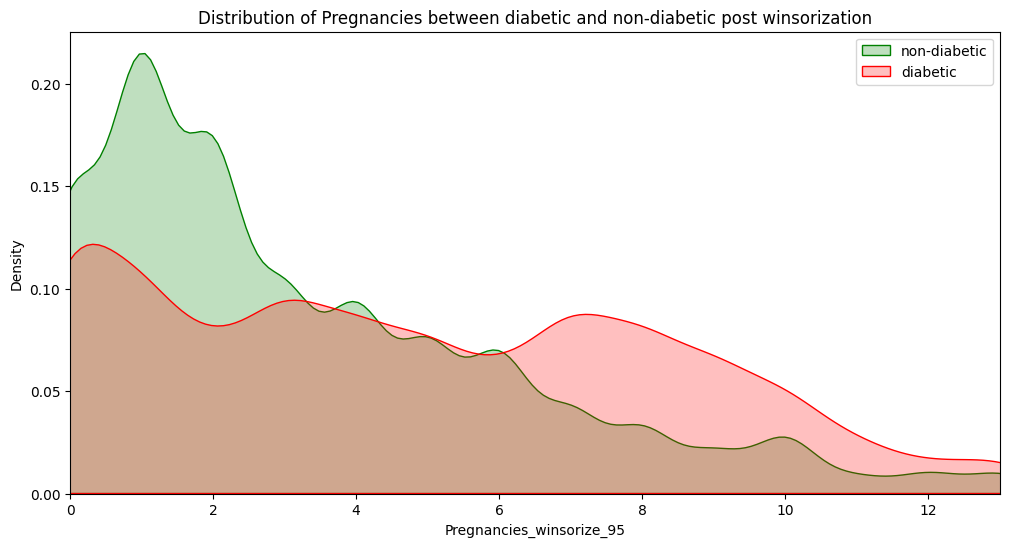

In [ ]:
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='Pregnancies_winsorize_95', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='Pregnancies_winsorize_95', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['Pregnancies_winsorize_95'].min(), diabetes_df_working['Pregnancies_winsorize_95'].max())
ax.set_title('Distribution of Pregnancies between diabetic and non-diabetic post winsorization')
ax.legend()
plt.show()

In [ ]:
limit = 7
field = "Pregnancies_winsorize_95"
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for Pregnancies_winsorize_95 - 1.5357741252467435e-09
p-value for independent t-test between Pregnancies_winsorize_95 < 7 and Pregnancies_winsorize_95 >= 7 data - 4.9273846304360856e-191
Pregnancies_winsorize_95 >= 7 are 1.9463351233026642 times more likely to be diabetic.


2. Glucose

In [ ]:
desc = pd.concat([diabetes_df['Glucose'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'Glucose'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'Glucose'].describe()], axis=1)
desc.columns = ['Glucose','Glucose(Outcome=0)', 'Glucose(Outcome=1)']
desc

Glucose  Glucose(Outcome=0)  Glucose(Outcome=1)
count  768.000000            500.0000          268.000000
mean   120.894531            109.9800          141.257463
std     31.972618             26.1412           31.939622
min      0.000000              0.0000            0.000000
25%     99.000000             93.0000          119.000000
50%    117.000000            107.0000          140.000000
75%    140.250000            125.0000          167.000000
max    199.000000            197.0000          199.000000

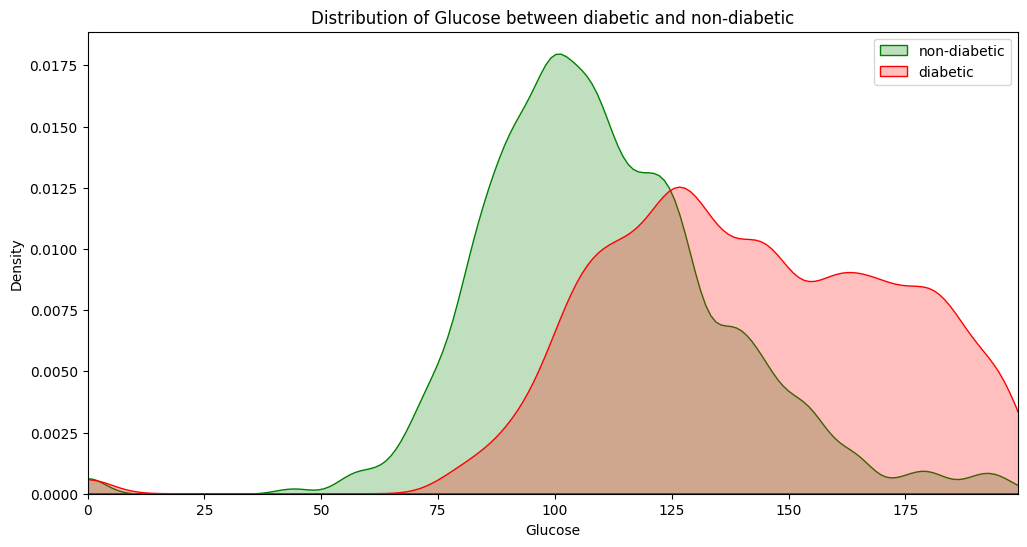

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='Glucose', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='Glucose', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['Glucose'].min(), diabetes_df['Glucose'].max())
ax.set_title('Distribution of Glucose between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-test

In [ ]:
limit = 120
field = "Glucose"
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for Glucose - 8.935431645289913e-43
p-value for independent t-test between Glucose < 120 and Glucose >= 120 data - 4.079692745418746e-164
Glucose >= 120 are 3.205714285714286 times more likely to be diabetic.


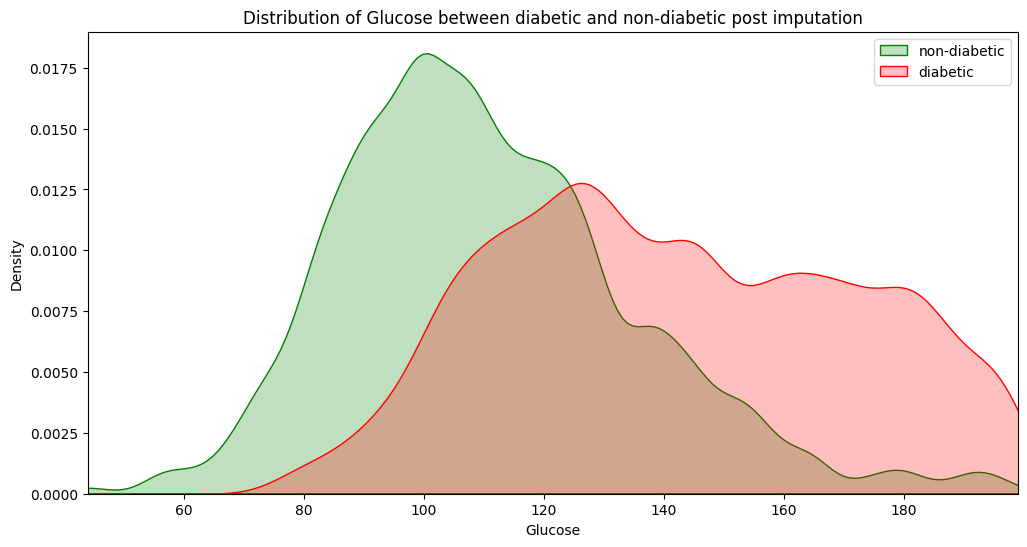

In [ ]:
#post imputation
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='Glucose', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='Glucose', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['Glucose'].min(), diabetes_df_working['Glucose'].max())
ax.set_title('Distribution of Glucose between diabetic and non-diabetic post imputation')
ax.legend()
plt.show()

Insights and t-test post imputation

In [ ]:
limit = 120
field = "Glucose"
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for Glucose - 3.1287190418423694e-48
p-value for independent t-test between Glucose < 120 and Glucose >= 120 data - 6.175258483606492e-176
Glucose >= 120 are 3.205714285714286 times more likely to be diabetic.


3. BP

In [ ]:
desc = pd.concat([diabetes_df['BloodPressure'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'BloodPressure'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'BloodPressure'].describe()], axis=1)
desc.columns = ['BloodPressure','BloodPressure(Outcome=0)', 'BloodPressure(Outcome=1)']
desc

BloodPressure  BloodPressure(Outcome=0)  BloodPressure(Outcome=1)
count     768.000000                500.000000                268.000000
mean       69.105469                 68.184000                 70.824627
std        19.355807                 18.063075                 21.491812
min         0.000000                  0.000000                  0.000000
25%        62.000000                 62.000000                 66.000000
50%        72.000000                 70.000000                 74.000000
75%        80.000000                 78.000000                 82.000000
max       122.000000                122.000000                114.000000

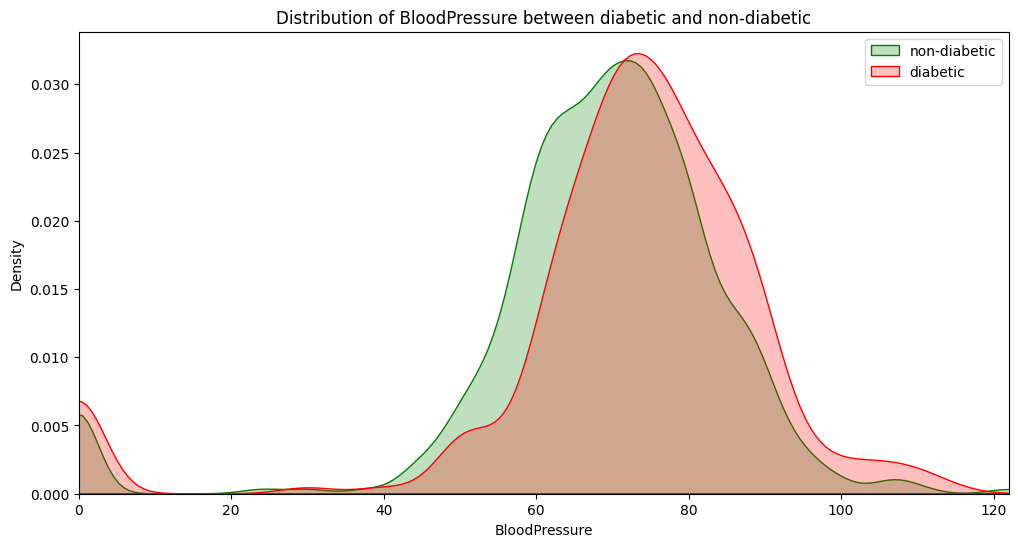

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='BloodPressure', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='BloodPressure', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['BloodPressure'].min(), diabetes_df['BloodPressure'].max())
ax.set_title('Distribution of BloodPressure between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-test

In [ ]:
limit = 82
field = "BloodPressure"
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for BloodPressure - 0.07151390009776082
p-value for independent t-test between BloodPressure < 82 and BloodPressure >= 82 data - 2.9191691056408976e-58
BloodPressure >= 82 are 1.4732984293193718 times more likely to be diabetic.


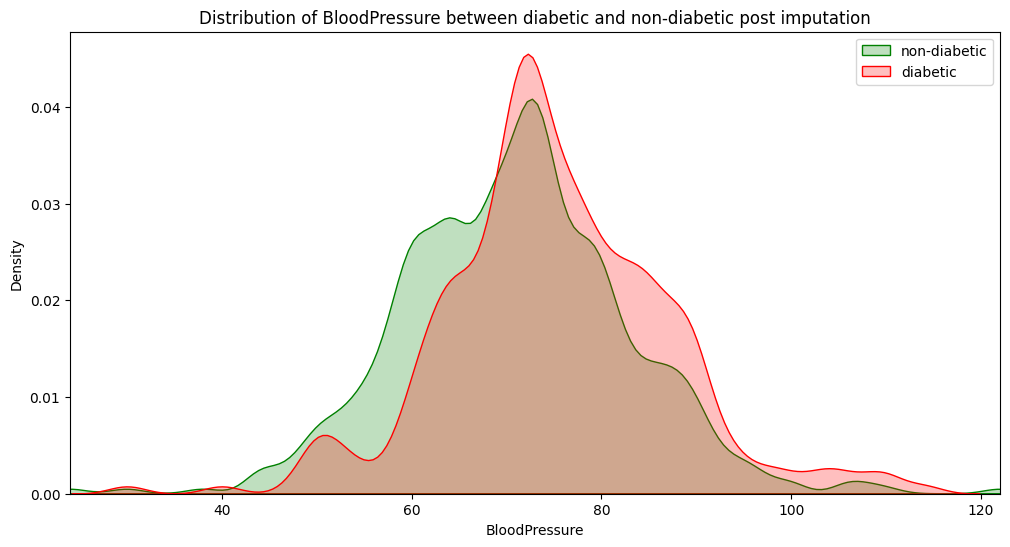

In [ ]:
#post imputation
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='BloodPressure', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='BloodPressure', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['BloodPressure'].min(), diabetes_df_working['BloodPressure'].max())
ax.set_title('Distribution of BloodPressure between diabetic and non-diabetic post imputation')
ax.legend()
plt.show()

In [ ]:
limit = 82
field = "BloodPressure"
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for BloodPressure - 3.709288185093571e-06
p-value for independent t-test between BloodPressure < 82 and BloodPressure >= 82 data - 6.488053812093482e-121
BloodPressure >= 82 are 1.4732984293193718 times more likely to be diabetic.


4. Skin Thickness

In [ ]:
desc = pd.concat([diabetes_df['SkinThickness'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'SkinThickness'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'SkinThickness'].describe()], axis=1)
desc.columns = ['SkinThickness','SkinThickness (Outcome=0)', 'SkinThickness (Outcome=1)']
desc

SkinThickness  SkinThickness (Outcome=0)  SkinThickness (Outcome=1)
count     768.000000                 500.000000                 268.000000
mean       20.536458                  19.664000                  22.164179
std        15.952218                  14.889947                  17.679711
min         0.000000                   0.000000                   0.000000
25%         0.000000                   0.000000                   0.000000
50%        23.000000                  21.000000                  27.000000
75%        32.000000                  31.000000                  36.000000
max        99.000000                  60.000000                  99.000000

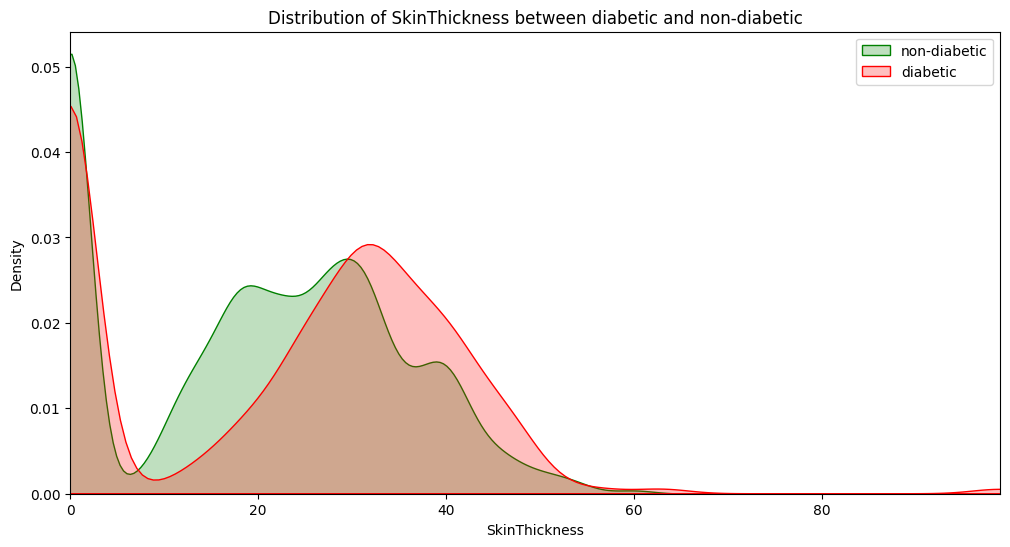

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='SkinThickness', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='SkinThickness', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['SkinThickness'].min(), diabetes_df['SkinThickness'].max())
ax.set_title('Distribution of SkinThickness between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-test

In [ ]:
limit = 30
field = "SkinThickness"
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for SkinThickness - 0.03834770482049123
p-value for independent t-test between SkinThickness < 30 and SkinThickness >= 30 data - 5.91009076697178e-156
SkinThickness >= 30 are 1.4707234786954893 times more likely to be diabetic.


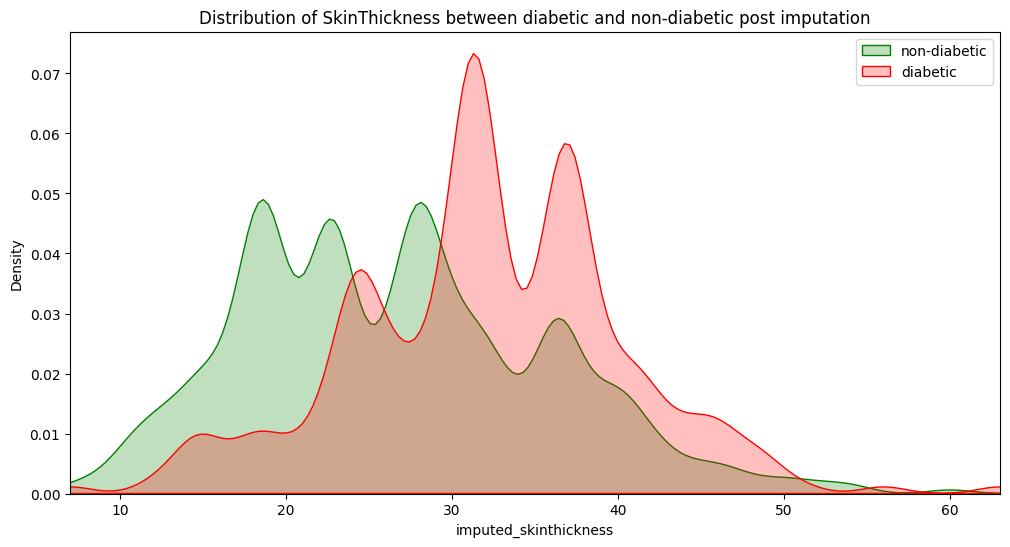

In [ ]:
#post imputation
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='imputed_skinthickness', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='imputed_skinthickness', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['imputed_skinthickness'].min(), diabetes_df_working['imputed_skinthickness'].max())
ax.set_title('Distribution of SkinThickness between diabetic and non-diabetic post imputation')
ax.legend()
plt.show()

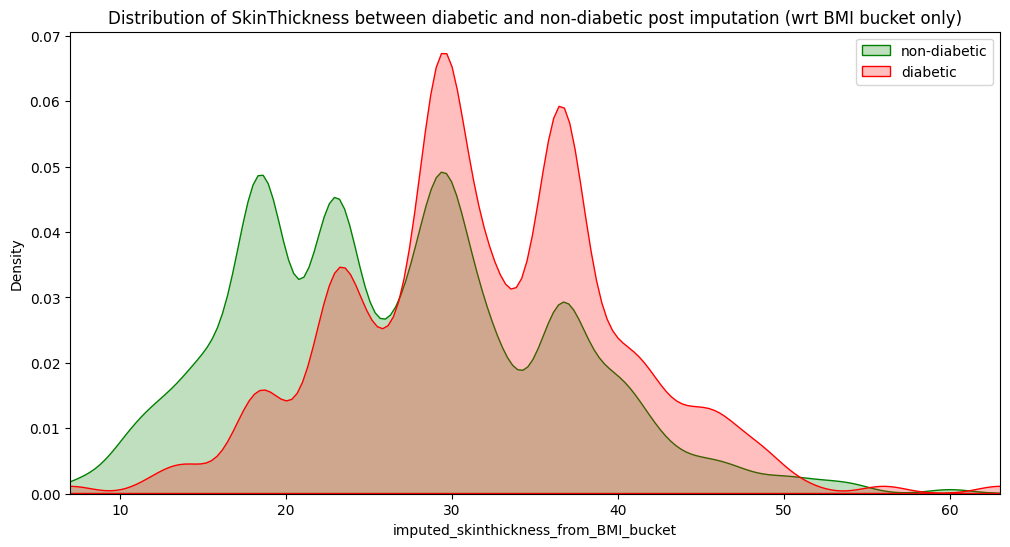

In [ ]:
#post imputation with BMI bucket only as class
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='imputed_skinthickness_from_BMI_bucket', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='imputed_skinthickness_from_BMI_bucket', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['imputed_skinthickness_from_BMI_bucket'].min(), diabetes_df_working['imputed_skinthickness_from_BMI_bucket'].max())
ax.set_title('Distribution of SkinThickness between diabetic and non-diabetic post imputation (wrt BMI bucket only)')
ax.legend()
plt.show()

In [ ]:
limit = 30
field = "imputed_skinthickness"
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for imputed_skinthickness - 1.5058002607024294e-15
p-value for independent t-test between imputed_skinthickness < 30 and imputed_skinthickness >= 30 data - 4.611163735701649e-183
imputed_skinthickness >= 30 are 2.5086459164671457 times more likely to be diabetic.


In [ ]:
# For class mean wrt BMI only
limit = 30
field = "imputed_skinthickness_from_BMI_bucket"
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for imputed_skinthickness_from_BMI_bucket - 1.6966678085384025e-13
p-value for independent t-test between imputed_skinthickness_from_BMI_bucket < 30 and imputed_skinthickness_from_BMI_bucket >= 30 data - 1.391772295337001e-172
imputed_skinthickness_from_BMI_bucket >= 30 are 1.7082815734989647 times more likely to be diabetic.


5. Insulin

In [ ]:
desc = pd.concat([diabetes_df['Insulin'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'Insulin'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'Insulin'].describe()], axis=1)
desc.columns = ['Insulin','Insulin (Outcome=0)', 'Insulin (Outcome=1)']
desc

Insulin  Insulin (Outcome=0)  Insulin (Outcome=1)
count  768.000000           500.000000           268.000000
mean    79.799479            68.792000           100.335821
std    115.244002            98.865289           138.689125
min      0.000000             0.000000             0.000000
25%      0.000000             0.000000             0.000000
50%     30.500000            39.000000             0.000000
75%    127.250000           105.000000           167.250000
max    846.000000           744.000000           846.000000

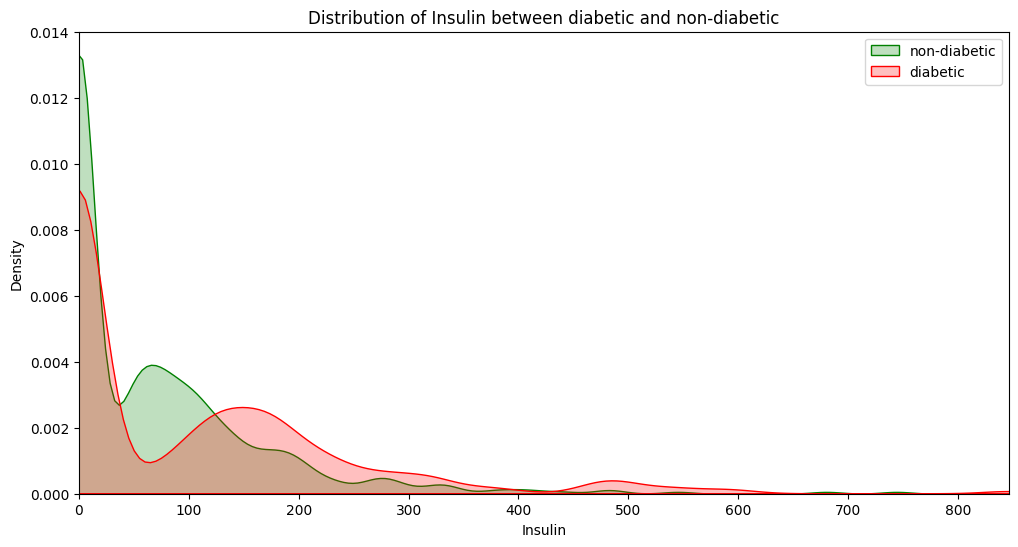

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='Insulin', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='Insulin', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['Insulin'].min(), diabetes_df['Insulin'].max())
ax.set_title('Distribution of Insulin between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-test

In [ ]:
limit = 150
field = "Insulin"
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for Insulin - 0.00028618646036031987
p-value for independent t-test between Insulin < 150 and Insulin >= 150 data - 5.723730403775857e-165
Insulin >= 150 are 1.7130584785233742 times more likely to be diabetic.


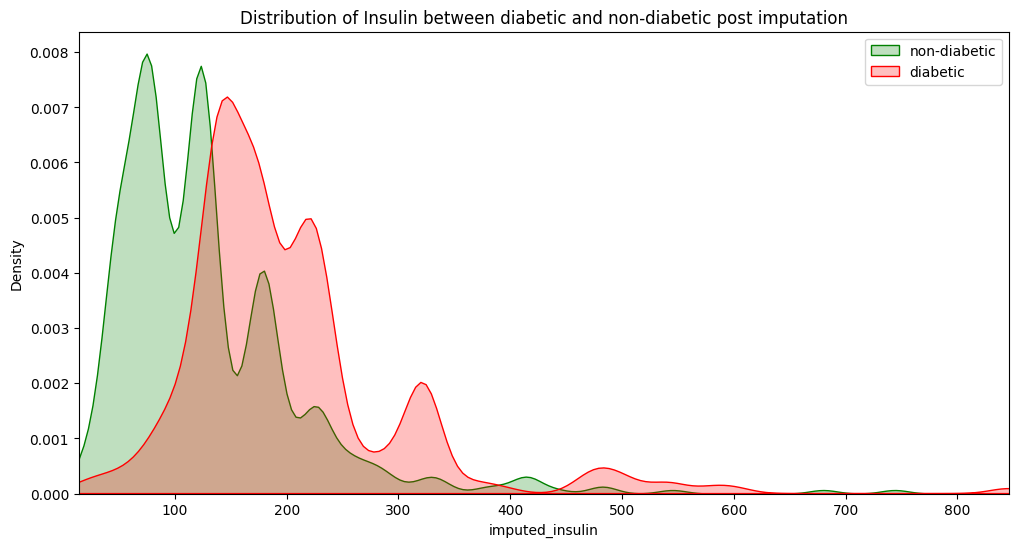

In [ ]:
#post imputation
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='imputed_insulin', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='imputed_insulin', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['imputed_insulin'].min(), diabetes_df_working['imputed_insulin'].max())
ax.set_title('Distribution of Insulin between diabetic and non-diabetic post imputation')
ax.legend()
plt.show()

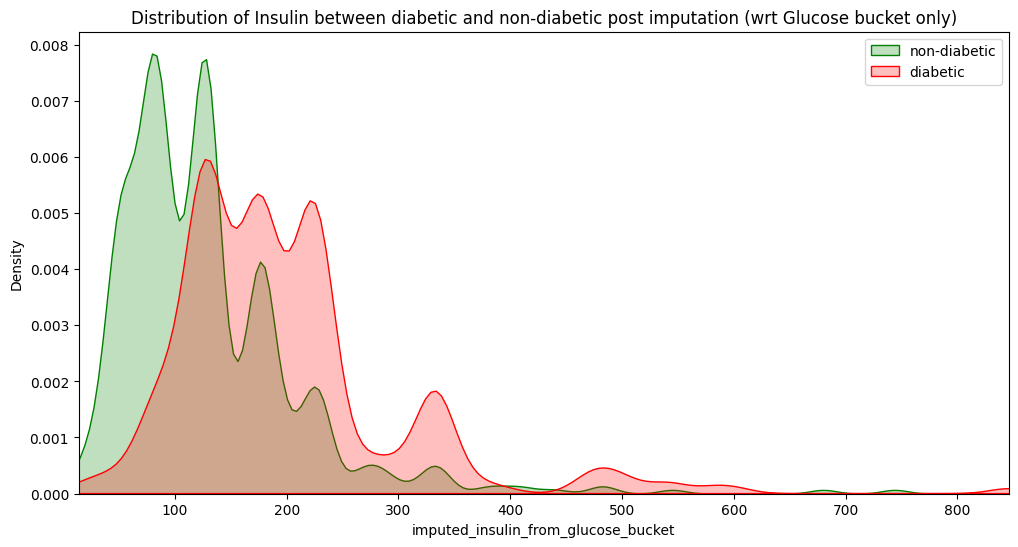

In [ ]:
#post imputation with Glucose bucket only
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='imputed_insulin_from_glucose_bucket', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='imputed_insulin_from_glucose_bucket', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['imputed_insulin_from_glucose_bucket'].min(), diabetes_df_working['imputed_insulin_from_glucose_bucket'].max())
ax.set_title('Distribution of Insulin between diabetic and non-diabetic post imputation (wrt Glucose bucket only)')
ax.legend()
plt.show()

In [ ]:
limit = 150
field = 'imputed_insulin'
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for imputed_insulin - 2.729588218565327e-24
p-value for independent t-test between imputed_insulin < 150 and imputed_insulin >= 150 data - 1.6982715190419012e-122
imputed_insulin >= 150 are 2.6620060790273556 times more likely to be diabetic.


In [ ]:
# For class mean wrt BMI only
limit = 150
field = 'imputed_insulin_from_glucose_bucket'
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for imputed_insulin_from_glucose_bucket - 8.656501773061282e-23
p-value for independent t-test between imputed_insulin_from_glucose_bucket < 150 and imputed_insulin_from_glucose_bucket >= 150 data - 3.3377272121718027e-125
imputed_insulin_from_glucose_bucket >= 150 are 2.6620060790273556 times more likely to be diabetic.


6. BMI

In [ ]:
desc = pd.concat([diabetes_df['BMI'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'BMI'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'BMI'].describe()], axis=1)
desc.columns = ['BMI','BMI (Outcome=0)', 'BMI (Outcome=1)']
desc

BMI  BMI (Outcome=0)  BMI (Outcome=1)
count  768.000000       500.000000       268.000000
mean    31.992578        30.304200        35.142537
std      7.884160         7.689855         7.262967
min      0.000000         0.000000         0.000000
25%     27.300000        25.400000        30.800000
50%     32.000000        30.050000        34.250000
75%     36.600000        35.300000        38.775000
max     67.100000        57.300000        67.100000

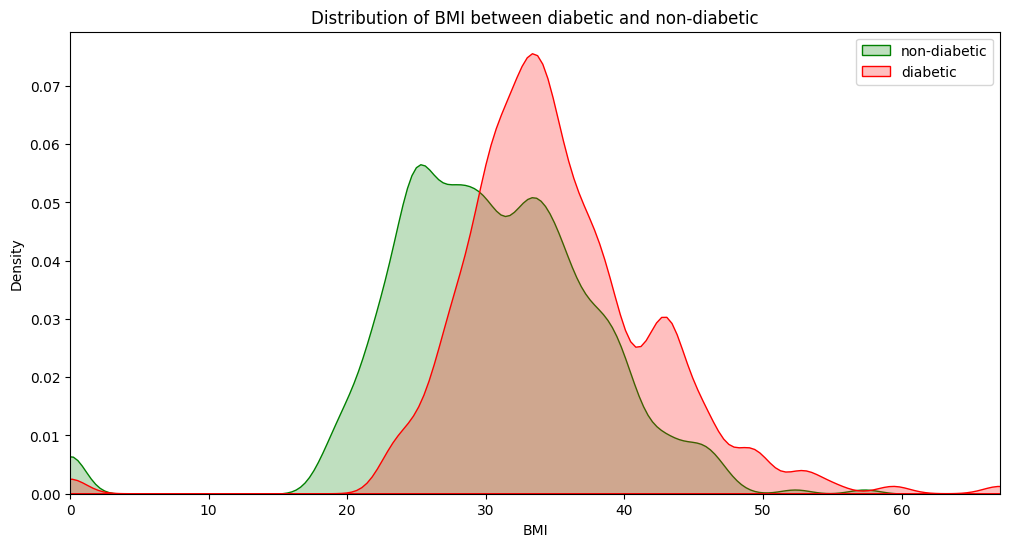

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='BMI', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='BMI', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['BMI'].min(), diabetes_df['BMI'].max())
ax.set_title('Distribution of BMI between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-test

In [ ]:
limit = 30
field = 'BMI'
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for BMI - 1.2298074873116022e-16
p-value for independent t-test between BMI < 30 and BMI >= 30 data - 4.168570169899403e-129
BMI >= 30 are 2.802836388792805 times more likely to be diabetic.


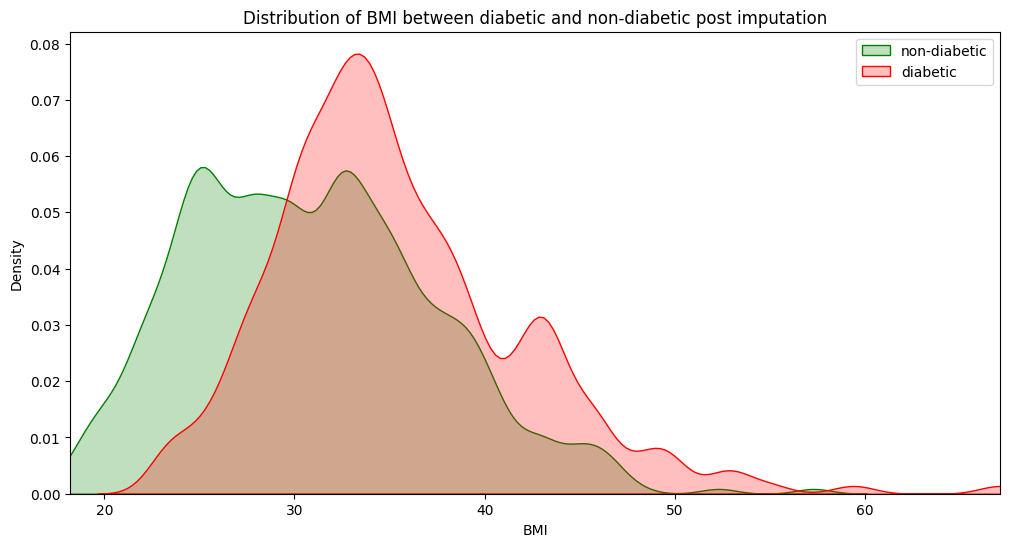

In [ ]:
outcome0 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0]
outcome1 = diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='BMI', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='BMI', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df_working['BMI'].min(), diabetes_df_working['BMI'].max())
ax.set_title('Distribution of BMI between diabetic and non-diabetic post imputation')
ax.legend()
plt.show()

In [ ]:
limit = 30
field = 'BMI'
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working['Outcome'] == 0, field], diabetes_df_working.loc[diabetes_df_working['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df_working.loc[diabetes_df_working[field] < limit, field], diabetes_df_working.loc[diabetes_df_working[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df_working.loc[diabetes_df_working[field] < limit, "Outcome"].mean()
    large = diabetes_df_working.loc[diabetes_df_working[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for BMI - 8.336902677508857e-19
p-value for independent t-test between BMI < 30 and BMI >= 30 data - 3.3321945292337946e-144
BMI >= 30 are 2.774547376767543 times more likely to be diabetic.


7. Diabetes pedigree function

In [ ]:
desc = pd.concat([diabetes_df['DiabetesPedigreeFunction'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'DiabetesPedigreeFunction'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'DiabetesPedigreeFunction'].describe()], axis=1)
desc.columns = ['DiabetesPedigreeFunction','DiabetesPedigreeFunction (Outcome=0)', 'DiabetesPedigreeFunction (Outcome=1)']
desc

DiabetesPedigreeFunction  DiabetesPedigreeFunction (Outcome=0)  \
count                768.000000                            500.000000   
mean                   0.471876                              0.429734   
std                    0.331329                              0.299085   
min                    0.078000                              0.078000   
25%                    0.243750                              0.229750   
50%                    0.372500                              0.336000   
75%                    0.626250                              0.561750   
max                    2.420000                              2.329000   

       DiabetesPedigreeFunction (Outcome=1)  
count                            268.000000  
mean                               0.550500  
std                                0.372354  
min                                0.088000  
25%                                0.262500  
50%                                0.449000  
75%                                0.728000  
max                                2.420000

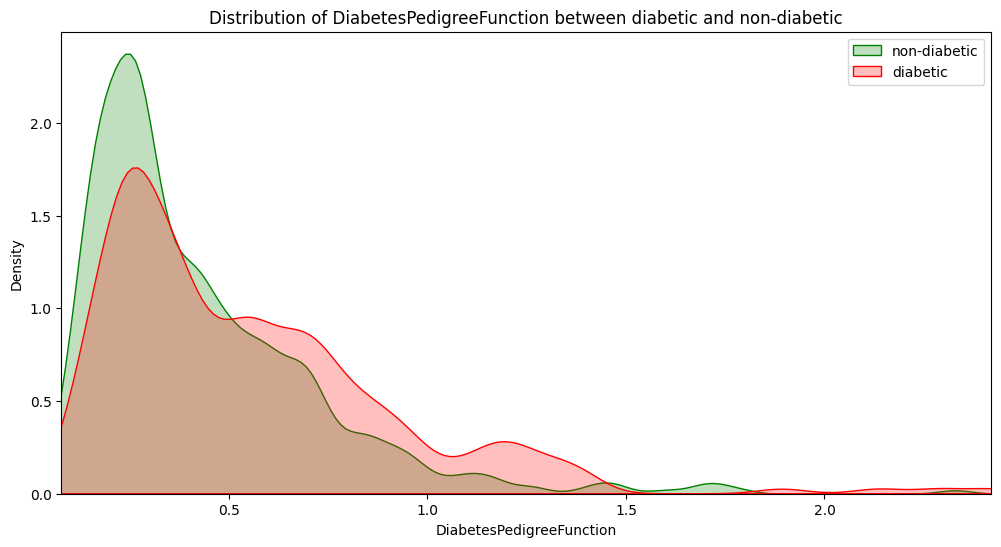

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='DiabetesPedigreeFunction', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='DiabetesPedigreeFunction', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['DiabetesPedigreeFunction'].min(), diabetes_df['DiabetesPedigreeFunction'].max())
ax.set_title('Distribution of DiabetesPedigreeFunction between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-test

In [ ]:
limit = 0.5
field = 'DiabetesPedigreeFunction'
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for DiabetesPedigreeFunction - 1.254607010148809e-06
p-value for independent t-test between DiabetesPedigreeFunction < 0.5 and DiabetesPedigreeFunction >= 0.5 data - 7.378690780033069e-155
DiabetesPedigreeFunction >= 0.5 are 1.5728377485127372 times more likely to be diabetic.


8. Age

In [ ]:
desc = pd.concat([diabetes_df['Age'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 0, 'Age'].describe(),
                  diabetes_df.loc[diabetes_df['Outcome'] == 1, 'Age'].describe()], axis=1)
desc.columns = ['Age','Age (Outcome=0)', 'Age (Outcome=1)']
desc

Age  Age (Outcome=0)  Age (Outcome=1)
count  768.000000       500.000000       268.000000
mean    33.240885        31.190000        37.067164
std     11.760232        11.667655        10.968254
min     21.000000        21.000000        21.000000
25%     24.000000        23.000000        28.000000
50%     29.000000        27.000000        36.000000
75%     41.000000        37.000000        44.000000
max     81.000000        81.000000        70.000000

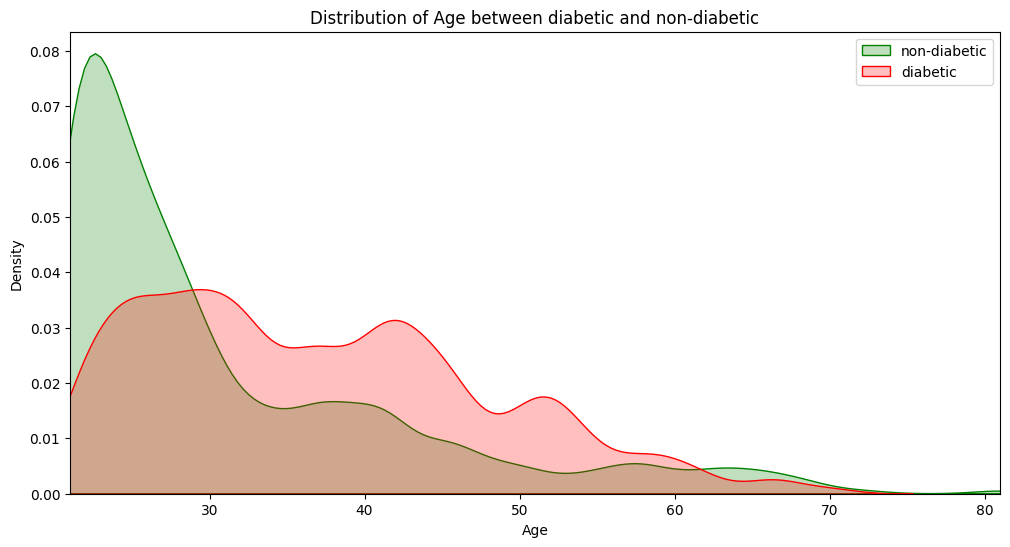

In [ ]:
outcome0 = diabetes_df.loc[diabetes_df['Outcome'] == 0]
outcome1 = diabetes_df.loc[diabetes_df['Outcome'] == 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

_ = sns.kdeplot(data=outcome0, x='Age', bw_adjust=0.5, color='green', label='non-diabetic', fill=True, ax=ax)
_ = sns.kdeplot(data=outcome1, x='Age', bw_adjust=0.5, color='red', label='diabetic', fill=True, ax=ax)
plt.xlim(diabetes_df['Age'].min(), diabetes_df['Age'].max())
ax.set_title('Distribution of Age between diabetic and non-diabetic')
ax.legend()
plt.show()

Insights and t-test

In [ ]:
limit = 30
field = 'Age'
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df['Outcome'] == 0, field], diabetes_df.loc[diabetes_df['Outcome'] == 1, field])
print(f"p-value for independent t-test between Outcome=0 and Outcome=1 data for {field} - {p_value}")
_, p_value = ttest_ind(diabetes_df.loc[diabetes_df[field] < limit, field], diabetes_df.loc[diabetes_df[field] >= limit, field])
print(f"p-value for independent t-test between {field} < {limit} and {field} >= {limit} data - {p_value}")
if p_value < 0.05:
    small = diabetes_df.loc[diabetes_df[field] < limit, "Outcome"].mean()
    large = diabetes_df.loc[diabetes_df[field] >= limit, "Outcome"].mean()
    print(f"{field} >= {limit} are {large/small} times more likely to be diabetic.")
else:
    print(f"No significant difference in {field} groups.")

p-value for independent t-test between Outcome=0 and Outcome=1 data for Age - 2.2099754606654358e-11
p-value for independent t-test between Age < 30 and Age >= 30 data - 1.2725757982911757e-160
Age >= 30 are 2.3317972350230414 times more likely to be diabetic.


Shapiro

In [ ]:
alpha = 0.05 #significance level
for column in features_variables_original.columns:
    column_data = features_variables_original[column]
    statistic, p_value = shapiro(column_data)
    #print the test result for the current column
    print("Column:", column)
    print("Statistic:", statistic)
    print("p_value:", p_value)

    #check for normality per column
    if (p_value < alpha):
        print("The data does not follow normal distribution")
    else:
        print("The data follows normal distribution")
    print()

Column: Pregnancies
Statistic: 0.9042831659317017
p_value: 1.6100101271064348e-21
The data does not follow normal distribution

Column: Glucose
Statistic: 0.9701048731803894
p_value: 1.987464880170986e-11
The data does not follow normal distribution

Column: BloodPressure
Statistic: 0.81892329454422
p_value: 1.5844936208677322e-28
The data does not follow normal distribution

Column: SkinThickness
Statistic: 0.904627799987793
p_value: 1.751799708531821e-21
The data does not follow normal distribution

Column: Insulin
Statistic: 0.7220208644866943
p_value: 7.915339984765649e-34
The data does not follow normal distribution

Column: BMI
Statistic: 0.9499890208244324
p_value: 1.8407586602041262e-15
The data does not follow normal distribution

Column: DiabetesPedigreeFunction
Statistic: 0.8365188837051392
p_value: 2.4777990069755762e-27
The data does not follow normal distribution

Column: Age
Statistic: 0.874765932559967
p_value: 2.401829612553989e-24
The data does not follow normal distr

In [ ]:
alpha = 0.05  # significance level

for column1 in features_variables_original.columns:
    for column2 in features_variables_original.columns:
        if column1 != column2:
            data1 = features_variables_original[column1]
            data2 = features_variables_original[column2]

            statistic, p_value = ttest_ind(data1, data2)

            # print the test result for the current pair of columns
            print("Comparison between {} and {}".format(column1, column2))
            print("Statistic:", statistic)
            print("p_value:", p_value)

            # check for normality per column
            if p_value < alpha:
                print("The data does not follow a normal distribution")
            else:
                print("The data follows a normal distribution")

            print()


Comparison between Pregnancies and Glucose
Statistic: -100.89586017888995
p_value: 0.0
The data does not follow a normal distribution

Comparison between Pregnancies and BloodPressure
Statistic: -92.05259864556302
p_value: 0.0
The data does not follow a normal distribution

Comparison between Pregnancies and SkinThickness
Statistic: -28.370941358093923
p_value: 1.0831681944846181e-142
The data does not follow a normal distribution

Comparison between Pregnancies and Insulin
Statistic: -18.25701658786493
p_value: 1.5323390411418638e-67
The data does not follow a normal distribution

Comparison between Pregnancies and BMI
Statistic: -90.97785510165771
p_value: 0.0
The data does not follow a normal distribution

Comparison between Pregnancies and DiabetesPedigreeFunction
Statistic: 27.60925074681145
p_value: 1.4831587376364908e-136
The data does not follow a normal distribution

Comparison between Pregnancies and Age
Statistic: -66.59133483687613
p_value: 0.0
The data does not follow a no

In [ ]:
# IQR
def outlier_thresholds(diabetes_df, col_name, q1=0.25, q3=0.75):
    quartile1 = diabetes_df[col_name].quantile(q1)
    quartile3 = diabetes_df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
for i in diabetes_df.columns:
    print("Outlier thresholds for {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(diabetes_df,i)))

Outlier thresholds for Pregnancies : (-6.50, 13.50)
Outlier thresholds for Glucose : (37.12, 202.12)
Outlier thresholds for BloodPressure : (35.00, 107.00)
Outlier thresholds for SkinThickness : (-48.00, 80.00)
Outlier thresholds for Insulin : (-190.88, 318.12)
Outlier thresholds for BMI : (13.35, 50.55)
Outlier thresholds for DiabetesPedigreeFunction : (-0.33, 1.20)
Outlier thresholds for Age : (-1.50, 66.50)
Outlier thresholds for Outcome : (-1.50, 2.50)


In [ ]:
#downloading the file for visualizing in Tableau

# diabetes_df_working.to_csv('diabetes_df_working.csv', index=False)

# from google.colab import files

# files.download('diabetes_df_working.csv')


## Predictive Modeling

### Decision Tree

#### Including Outcome in Class Mean Imputation

In [ ]:
# Splitting the data into features (X) and target (Y)
X = diabetes_df_working.loc[:,['Pregnancies_winsorize_95', 'Glucose', 'BloodPressure', 'imputed_skinthickness', 'imputed_insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = diabetes_df_working.loc[:,['Outcome']]

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((537, 8), (231, 8), (537, 1), (231, 1))

Perform hyperparameter tuning to find the best parameters for DecisionTreeClassifier.

This will give us the best Decision Tree that is already trained on X_train, Y_train.

In [ ]:
base_dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, len(Y_train)),
    'min_samples_split': randint(2, 40),
    'min_samples_leaf': randint(2, 20),
    'max_features': randint(1, 8)
}
rand_search_dt = RandomizedSearchCV(base_dt,
                                    param_distributions = param_dist_dt,
                                    n_iter=500,
                                    cv=5,
                                    random_state=42,
                                    error_score=0.0)
rand_search_dt.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=0.0,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b952531d270>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b952501c250>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b952542e830>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b952501cdc0>,
                                        'splitter': ['best', 'random']},
                   random_state=42)

pima_dt has the best Decision Tree Classifier from the Random Parameter Search above

In [ ]:
pima_dt = rand_search_dt.best_estimator_
print(rand_search_dt.best_params_)

{'criterion': 'log_loss', 'max_depth': 28, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 38, 'splitter': 'best'}


In [ ]:
# predict Y for X_test
Y_pred_dt = pima_dt.predict(X_test)

In [ ]:
# Model accuracy
accuracy_pima_dt = accuracy_score(Y_test, Y_pred_dt)
print("Test Accuracy of Decision Tree model: %.2f%%" % (accuracy_pima_dt*100))

Test Accuracy of Decision Tree model: 84.85%


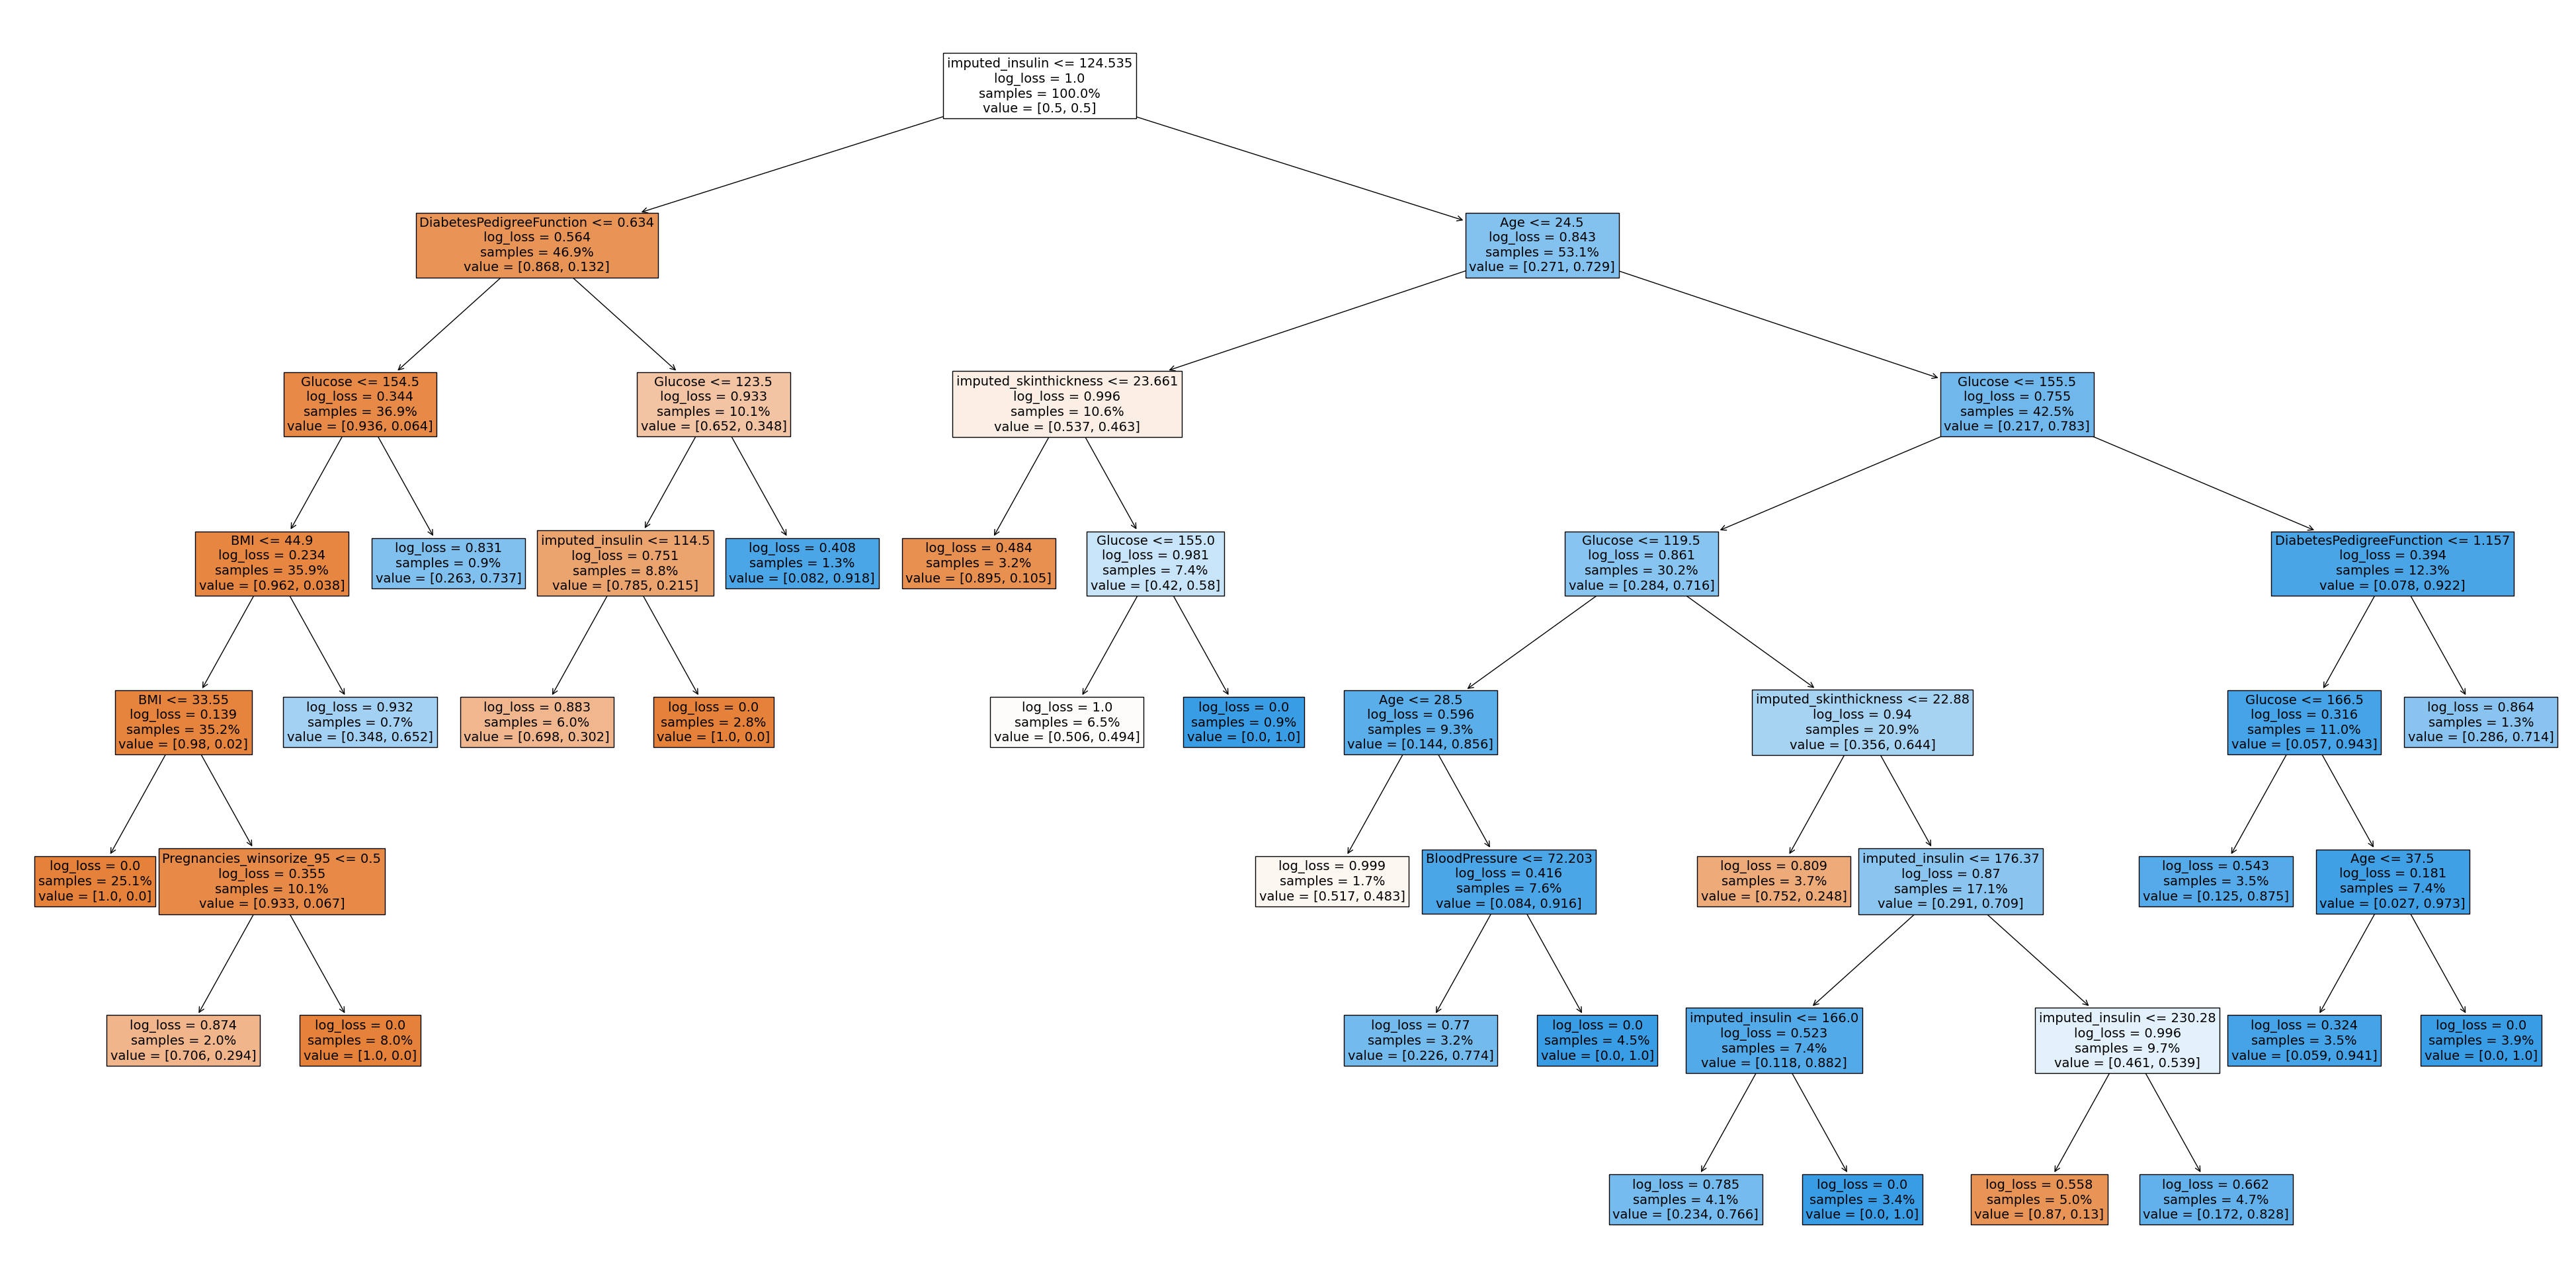

In [ ]:
_, ax = plt.subplots(1,1, figsize=(50,25))
_ = plot_tree(pima_dt, feature_names=X_train.columns.tolist(), impurity=True, filled=True, proportion=True, fontsize=14)

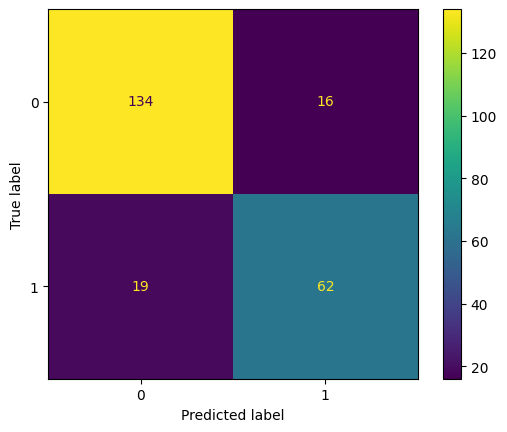

In [ ]:
# Confusion matrix - going forward with gini because it is providing the best test accuracy
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

_ = ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()

In [ ]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

print("Accuracy of DT:", accuracy_dt)
print("Precision of DT:", precision_dt)
print("Recall of DT:", recall_dt)
print("F1 Score of DT:", f1_dt)

Accuracy of DT: 0.8484848484848485
Precision of DT: 0.7948717948717948
Recall of DT: 0.7654320987654321
F1 Score of DT: 0.7798742138364779


In [ ]:
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_dt = pima_dt.predict_proba(X_test)[:,1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(Y_test["Outcome"].to_numpy(), y_pred_prob_dt, pos_label=1)

# Compute the ROC AUC score
roc_auc_dt = roc_auc_score(Y_test["Outcome"].to_numpy(), y_pred_prob_dt)
roc_auc_dt

0.8721399176954733

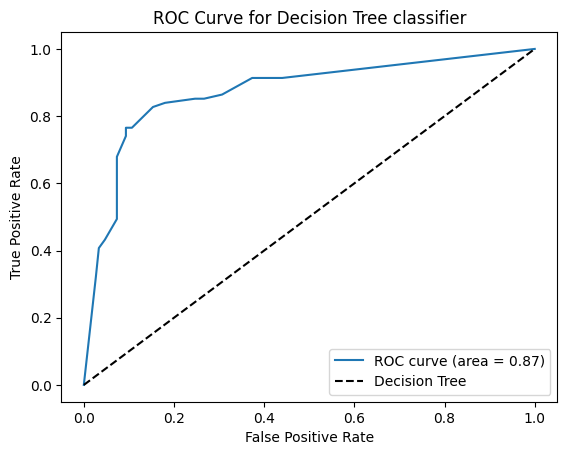

In [ ]:
# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_dt)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree classifier')
plt.legend(loc="lower right")
plt.show()

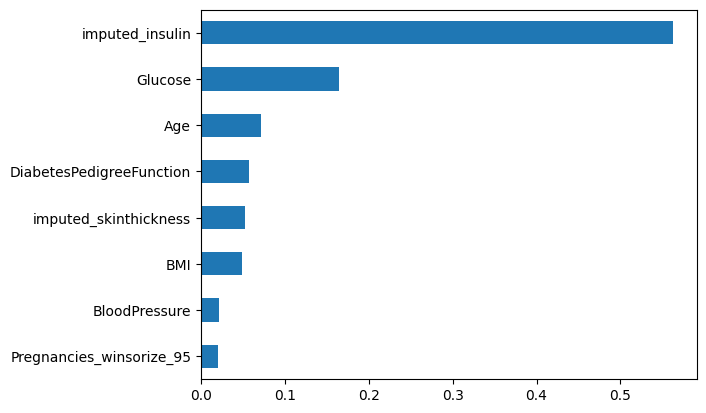

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
_ = pd.Series(pima_dt.feature_importances_, index=X_train.columns).sort_values(ascending=True).plot.barh()

#### Not Including Outcome in Class Mean Imputation

In [ ]:
# Splitting the data into features (X) and target (Y)
X = diabetes_df_working.loc[:,['Pregnancies_winsorize_95', 'Glucose', 'BloodPressure', 'imputed_skinthickness_from_BMI_bucket', 'imputed_insulin_from_glucose_bucket', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = diabetes_df_working.loc[:,['Outcome']]

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((537, 8), (231, 8), (537, 1), (231, 1))

In [ ]:
base_dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, len(Y_train)),
    'min_samples_split': randint(2, 40),
    'min_samples_leaf': randint(2, 20),
    'max_features': randint(1, 8)
}
rand_search_dt = RandomizedSearchCV(base_dt,
                                    param_distributions = param_dist_dt,
                                    n_iter=500,
                                    cv=5,
                                    random_state=42,
                                    error_score=0.0)
rand_search_dt.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=0.0,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95252f9ba0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9525289420>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95252886a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b952527a6e0>,
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [ ]:
pima_dt = rand_search_dt.best_estimator_
print(rand_search_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 34, 'max_features': 7, 'min_samples_leaf': 9, 'min_samples_split': 20, 'splitter': 'random'}


In [ ]:
# predict Y for X_test
Y_pred_dt = pima_dt.predict(X_test)

In [ ]:
# Model accuracy
accuracy_pima_dt = accuracy_score(Y_test, Y_pred_dt)
print("Test Accuracy of Decision Tree model: %.2f%%" % (accuracy_pima_dt*100))

Test Accuracy of Decision Tree model: 73.59%


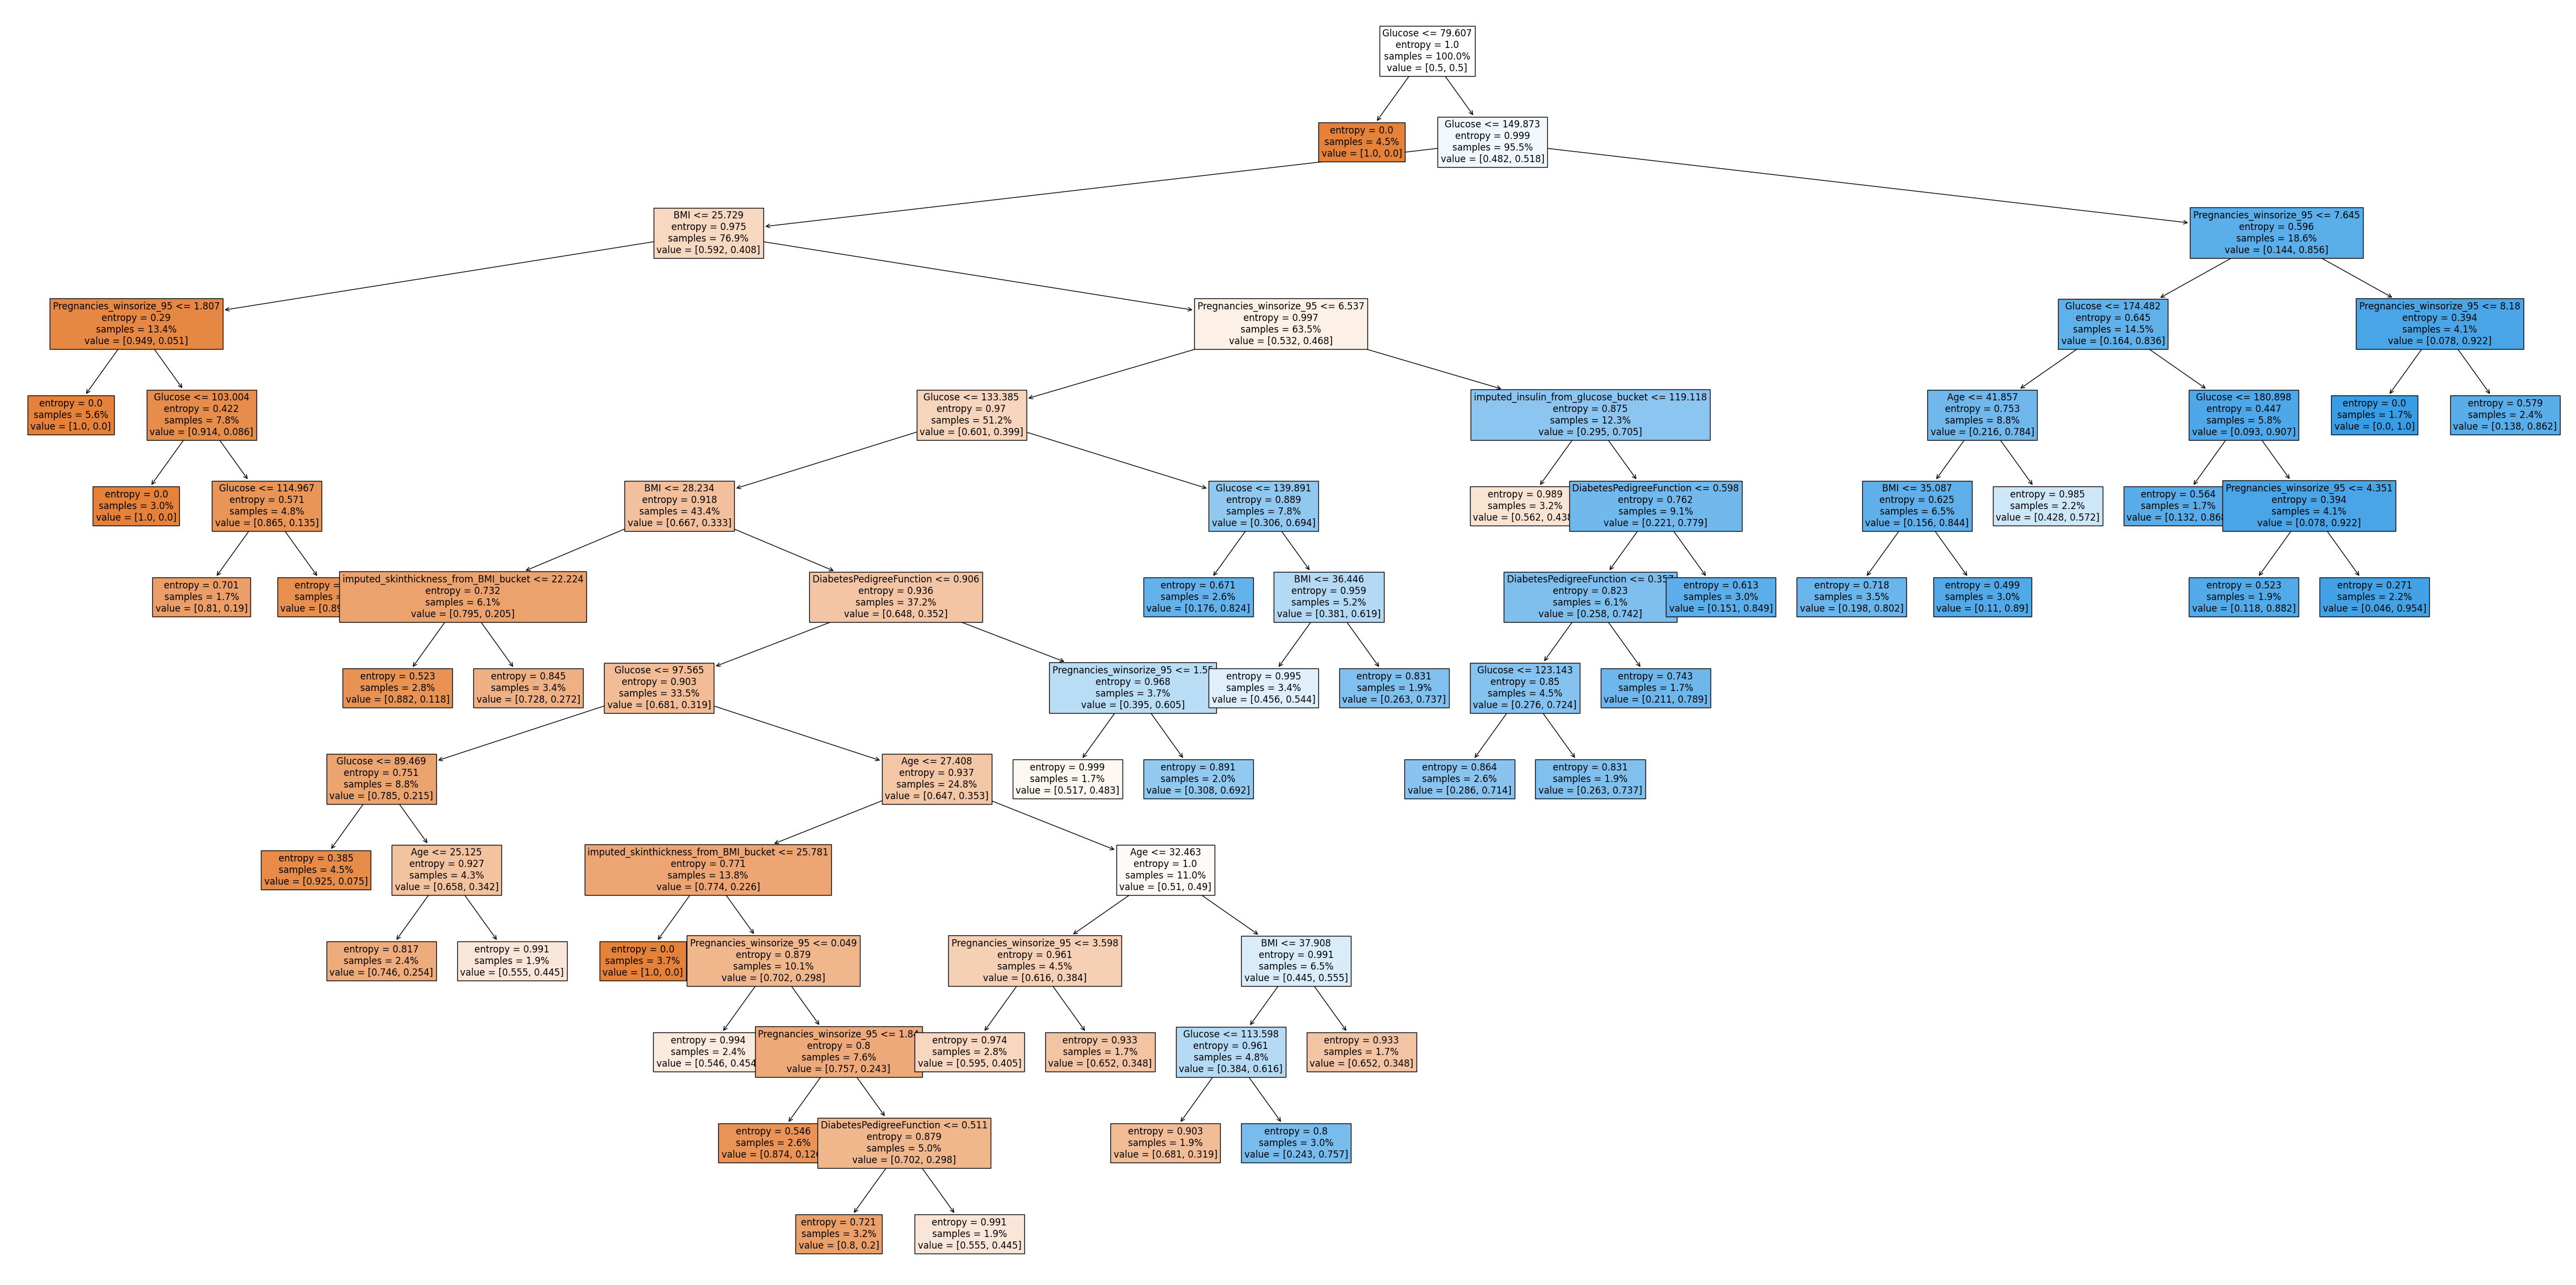

In [ ]:
_, ax = plt.subplots(1,1, figsize=(60,30))
_ = plot_tree(pima_dt, feature_names=X_train.columns.tolist(), impurity=True, filled=True, proportion=True, fontsize=12)

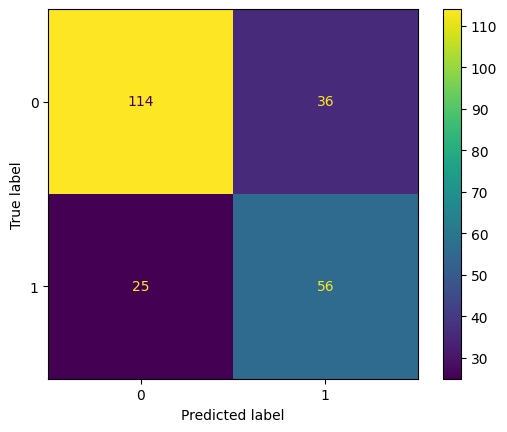

In [ ]:
# Confusion matrix - going forward with gini because it is providing the best test accuracy
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

_ = ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()

In [ ]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

print("Accuracy of DT:", accuracy_dt)
print("Precision of DT:", precision_dt)
print("Recall of DT:", recall_dt)
print("F1 Score of DT:", f1_dt)

Accuracy of DT: 0.7359307359307359
Precision of DT: 0.6086956521739131
Recall of DT: 0.691358024691358
F1 Score of DT: 0.6473988439306358


In [ ]:
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_dt = pima_dt.predict_proba(X_test)[:,1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(Y_test["Outcome"].to_numpy(), y_pred_prob_dt, pos_label=1)

# Compute the ROC AUC score
roc_auc_dt = roc_auc_score(Y_test["Outcome"].to_numpy(), y_pred_prob_dt)
roc_auc_dt

0.7946913580246913

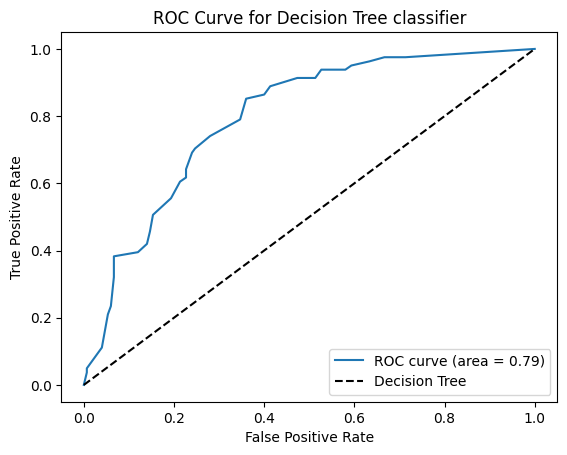

In [ ]:
# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_dt)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
_ = pd.Series(pima_dt.feature_importances_, index=X_train.columns).sort_values(ascending=True).plot.barh()

### Random Forest

#### Including Outcome in Class Mean Imputation

In [ ]:
# Splitting the data into features (X) and target (y)
X = diabetes_df_working.drop(['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket', 'imputed_skinthickness_from_BMI_bucket', 'imputed_insulin_from_glucose_bucket'], axis=1)
y = diabetes_df_working['Outcome']

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Checking shape of training and test splits
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [ ]:
# Training random forest with default parameters on training data
pima_rf_v1 = RandomForestClassifier()
pima_rf_v1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predicting on the test data
y_pred_rf_v1 = pima_rf_v1.predict(X_test)

In [ ]:
# Model accuracy from 1st attempt
accuracy_pima_rf_v1 = accuracy_score(y_test, y_pred_rf_v1)
print("Accuracy of base Random Forest model: %.2f%%" % (accuracy_pima_rf_v1*100))

Accuracy of base Random Forest model: 83.12%


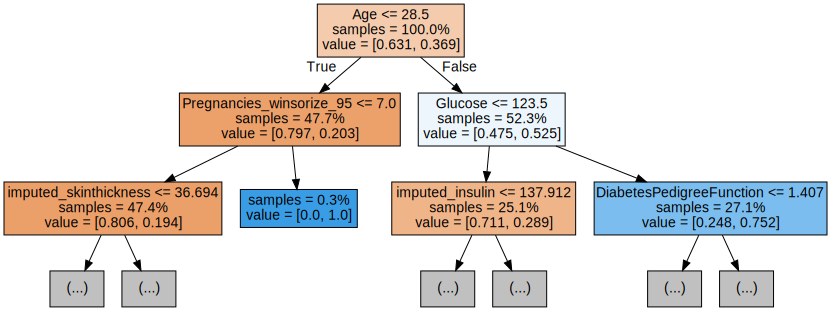

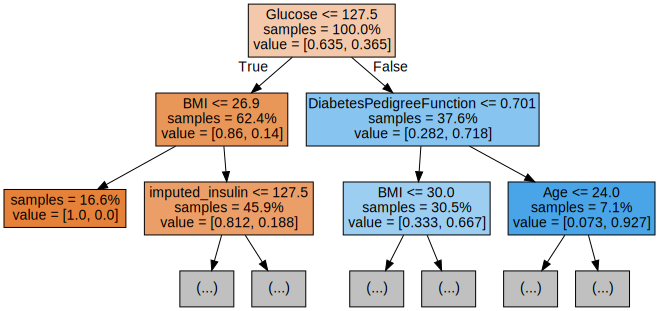

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Snapshot of trees in the ensemble model
# List of variables not used in the model
rf_excl_list = ['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket', 'imputed_skinthickness_from_BMI_bucket', 'imputed_insulin_from_glucose_bucket']
rf_col_list = np.array(diabetes_df_working.loc[:, ~diabetes_df_working.columns.isin(rf_excl_list)].columns)

# Visualizing the trees
# Considering the first three decision trees from the forest

# Setting size of figure with width 12 and height 8
plt.figure(figsize=(12,8))

for i in range(3):
    tree = pima_rf_v1.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=rf_col_list,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Hyperparameter tuning

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
pima_rf_v2 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(pima_rf_v2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b952449f550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95219841f0>})

In [ ]:
# Hyperparameter tuning

param_dist_rf = {'max_depth': randint(1,200),
              'min_samples_split': randint(1,100),
              'max_leaf_nodes': randint(1,100),
              'min_samples_leaf': randint(1,100),
              'n_estimators': randint(1,500),
              'max_samples': randint(1,100),
              'max_features': randint(1,10)}

# Create a random forest classifier
pima_rf_v2 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search_rf = RandomizedSearchCV(pima_rf_v2,
                                 param_distributions = param_dist_rf,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95219ea050>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95219dabc0>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95219eb...
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9524456f20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9524456d40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95219851b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95219ea1d0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search_rf.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters for Random Forest are:',  rand_search_rf.best_params_)

Best hyperparameters for Random Forest are: {'max_depth': 27, 'max_features': 4, 'max_leaf_nodes': 78, 'max_samples': 98, 'min_samples_leaf': 7, 'min_samples_split': 66, 'n_estimators': 156}


In [ ]:
# Training random forest with optimal parameters on training data
pima_rf_v3 = RandomForestClassifier(max_depth = 129,
                                    n_estimators = 490)
pima_rf_v3.fit(X_train, y_train)

# Predicting on the test data
y_pred_rf_v3 = pima_rf_v3.predict(X_test)

In [ ]:
# Model accuracy from 3rd attempt
accuracy_pima_rf_v3 = accuracy_score(y_test, y_pred_rf_v3)
print("Accuracy of Random Forest model with optimal hyperparameters: %.2f%%" % (accuracy_pima_rf_v3*100))

Accuracy of Random Forest model with optimal hyperparameters: 82.25%


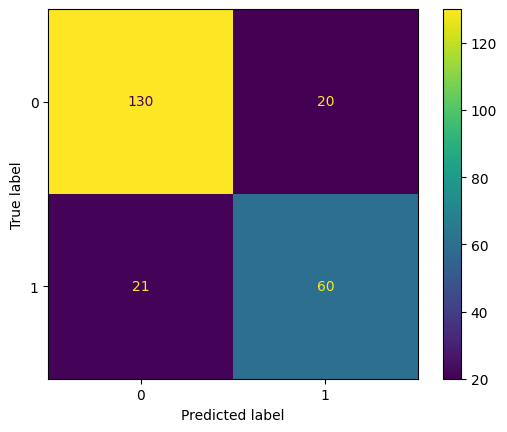

In [ ]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_v3)

ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot();

In [ ]:
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_v3)
precision_rf_final = precision_score(y_test, y_pred_rf_v3)
recall_rf_final = recall_score(y_test, y_pred_rf_v3)
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score_rf_final = 2 * (precision_rf_final * recall_rf_final) / (precision_rf_final + recall_rf_final)


print("Accuracy of RF: %.2f%%" % (accuracy_rf_final*100))
print("Precision of RF: %.2f%%" % (precision_rf_final*100))
print("Recall of RF: %.2f%%" % (recall_rf_final*100))
print("F1 score of RF: %.2f" % (f1_score_rf_final))


Accuracy of RF: 82.25%
Precision of RF: 75.00%
Recall of RF: 74.07%
F1 score of RF: 0.75


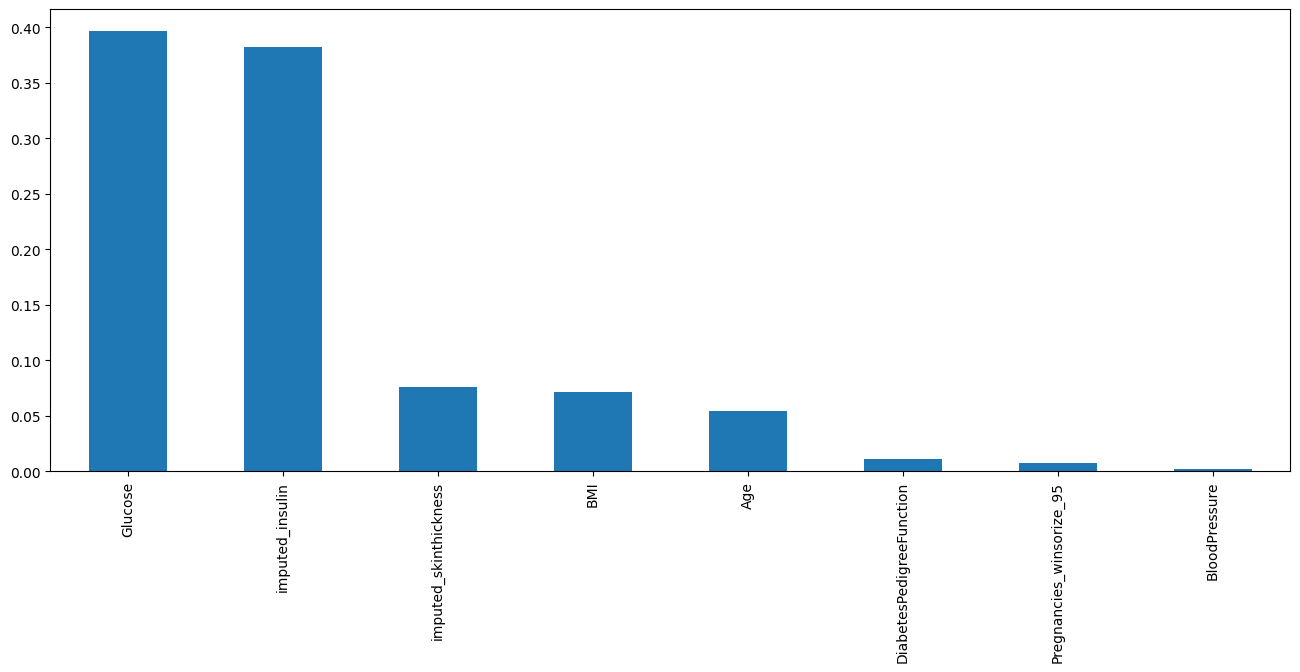

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_rf = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Bar chart with feature importance in decreasing order
feature_importances_rf.plot.bar(figsize=(16,6));

In [ ]:
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_rf = pima_rf_v3.predict_proba(X_test)[:, 1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf, pos_label=1)

# Compute the ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
roc_auc_rf

# Area under curve = 0.91 which is quite good

0.8911111111111112

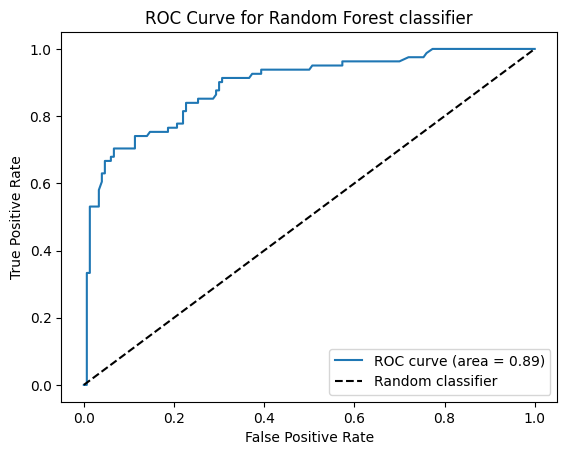

In [ ]:
# Plotting the ROC curve
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc="lower right")
plt.show()

#### Not including Outcome in Class Mean Imputation

In [ ]:
# Splitting the data into features (X) and target (Y)
X = diabetes_df_working.drop(['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket', 'imputed_skinthickness', 'imputed_insulin'], axis=1)
y = diabetes_df_working.loc[:,'Outcome']

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Checking shape of training and test splits
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [ ]:
# Training random forest with default parameters on training data
pima_rf_v1 = RandomForestClassifier()
pima_rf_v1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predicting on the test data
y_pred_rf_v1 = pima_rf_v1.predict(X_test)

In [ ]:
# Model accuracy from 1st attempt
accuracy_pima_rf_v1 = accuracy_score(y_test, y_pred_rf_v1)
print("Accuracy of base Random Forest model: %.2f%%" % (accuracy_pima_rf_v1*100))

Accuracy of base Random Forest model: 74.03%


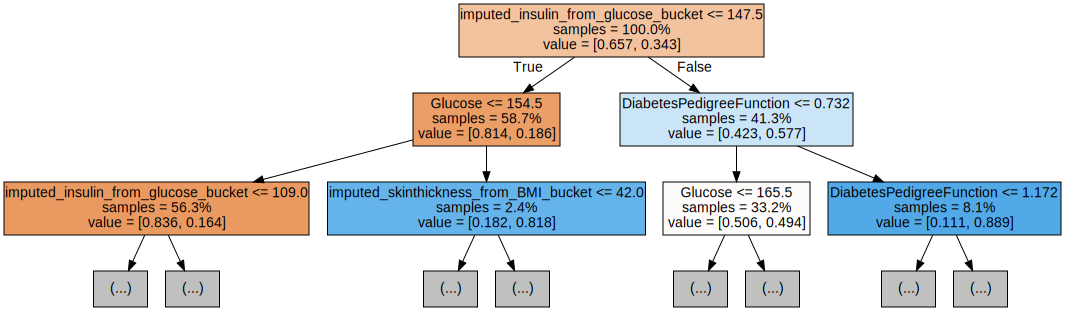

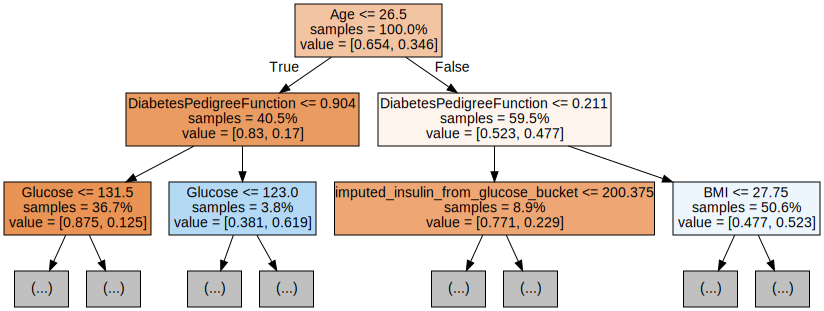

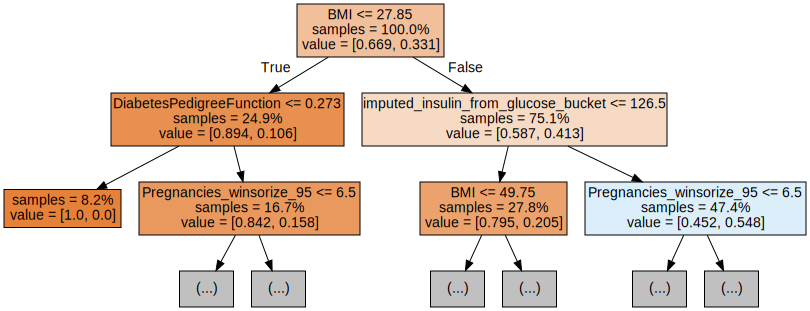

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Snapshot of trees in the ensemble model
# List of variables not used in the model
rf_excl_list = ['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket', 'imputed_skinthickness', 'imputed_insulin']
rf_col_list = np.array(diabetes_df_working.loc[:, ~diabetes_df_working.columns.isin(rf_excl_list)].columns)

# Visualizing the trees
# Considering the first three decision trees from the forest

# Setting size of figure with width 12 and height 8
plt.figure(figsize=(12,8))

for i in range(3):
    tree = pima_rf_v1.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=rf_col_list,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Hyperparameter tuning

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
pima_rf_v2 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(pima_rf_v2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95219af010>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95218279d0>})

In [ ]:
# Hyperparameter tuning

param_dist_rf = {'max_depth': randint(1,200),
              'min_samples_split': randint(1,100),
              'max_leaf_nodes': randint(1,100),
              'min_samples_leaf': randint(1,100),
              'n_estimators': randint(1,500),
              'max_samples': randint(1,100),
              'max_features': randint(1,10)}

# Create a random forest classifier
pima_rf_v2 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search_rf = RandomizedSearchCV(pima_rf_v2,
                                 param_distributions = param_dist_rf,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9521671ab0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9521673c40>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9521670...
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9521673220>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9521671570>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9521673520>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9521671ae0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search_rf.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters for Random Forest are:',  rand_search_rf.best_params_)

Best hyperparameters for Random Forest are: {'max_depth': 180, 'max_features': 4, 'max_leaf_nodes': 35, 'max_samples': 67, 'min_samples_leaf': 3, 'min_samples_split': 51, 'n_estimators': 353}


In [ ]:
# Training random forest with optimal parameters on training data
pima_rf_v3 = RandomForestClassifier(max_depth = 129,
                                    n_estimators = 490)
pima_rf_v3.fit(X_train, y_train)

# Predicting on the test data
y_pred_rf_v3 = pima_rf_v3.predict(X_test)

In [ ]:
# Model accuracy from 3rd attempt
accuracy_pima_rf_v3 = accuracy_score(y_test, y_pred_rf_v3)
print("Accuracy of Random Forest model with optimal hyperparameters: %.2f%%" % (accuracy_pima_rf_v3*100))

Accuracy of Random Forest model with optimal hyperparameters: 74.03%


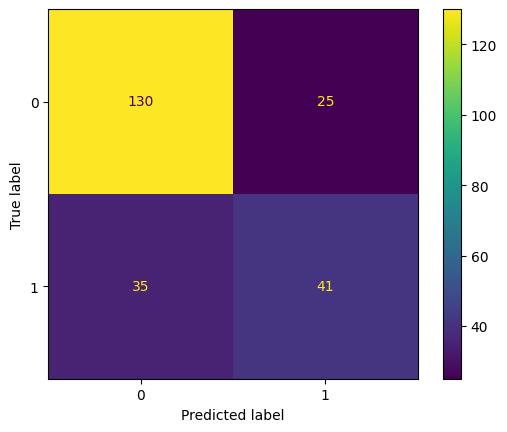

In [ ]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_v3)

ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()

In [ ]:
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_v3)
precision_rf_final = precision_score(y_test, y_pred_rf_v3)
recall_rf_final = recall_score(y_test, y_pred_rf_v3)
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score_rf_final = 2 * (precision_rf_final * recall_rf_final) / (precision_rf_final + recall_rf_final)


print("Accuracy of RF: %.2f%%" % (accuracy_rf_final*100))
print("Precision of RF: %.2f%%" % (precision_rf_final*100))
print("Recall of RF: %.2f%%" % (recall_rf_final*100))
print("F1 score of RF: %.2f" % (f1_score_rf_final))

Accuracy of RF: 74.03%
Precision of RF: 62.12%
Recall of RF: 53.95%
F1 score of RF: 0.58


<Axes: >

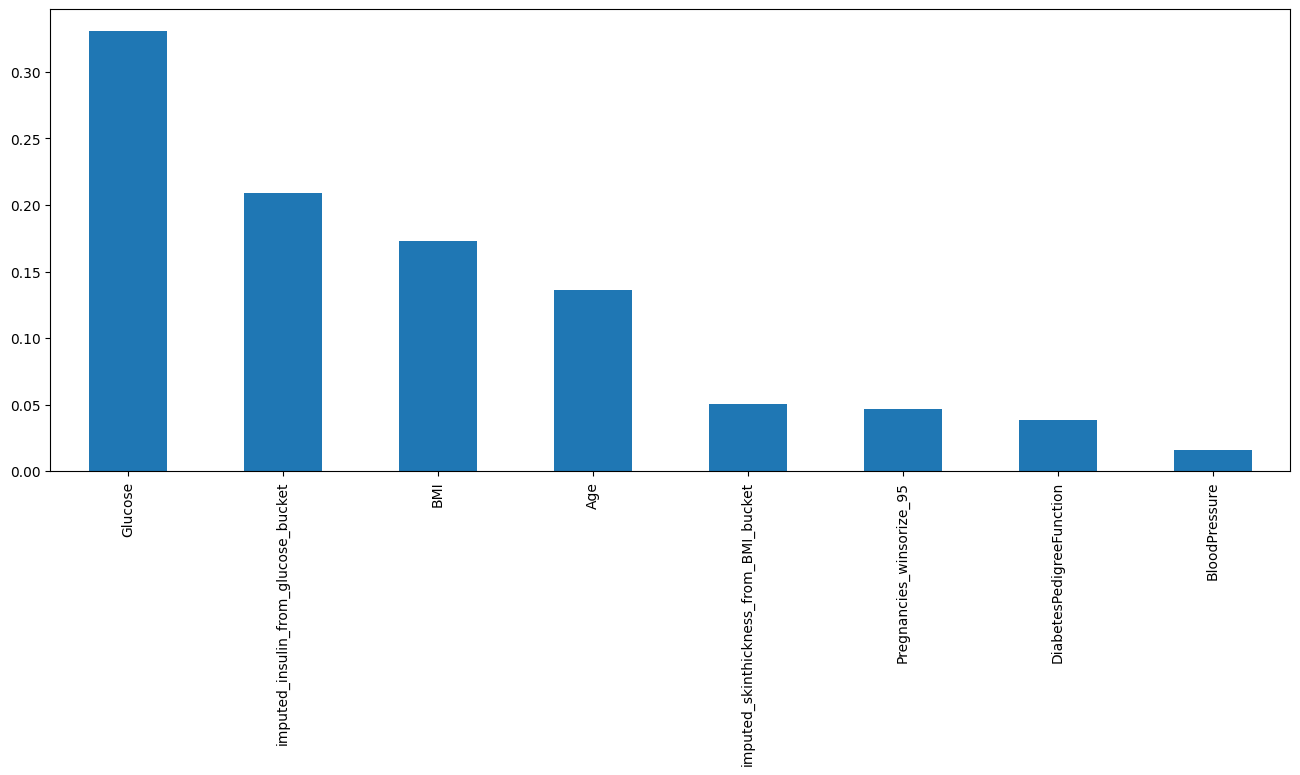

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_rf = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Bar chart with feature importance in decreasing order
feature_importances_rf.plot.bar(figsize=(16,6))

In [ ]:
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_rf = pima_rf_v3.predict_proba(X_test)[:, 1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf, pos_label=1)

# Compute the ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
roc_auc_rf

0.8080220713073004

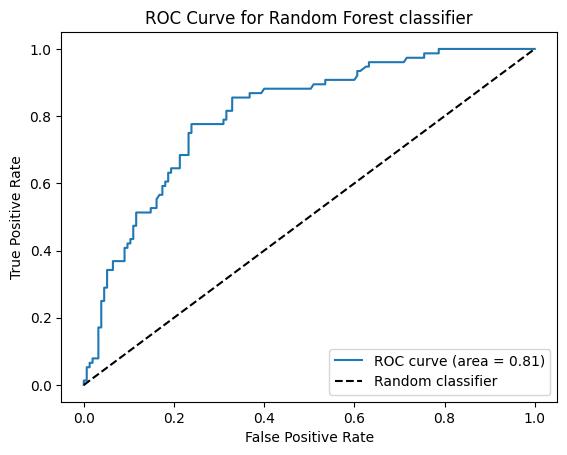

In [ ]:
# Plotting the ROC curve
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc="lower right")
plt.show()

### XGBoost

#### Including Outcome in Class Mean Imputation

In [ ]:
# Using the same train and test from the Random Forest part
from xgboost import XGBClassifier

# Splitting the data into features (X) and target (y)
X = diabetes_df_working.drop(['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket', 'imputed_skinthickness_from_BMI_bucket', 'imputed_insulin_from_glucose_bucket'], axis=1)
y = diabetes_df_working['Outcome']

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training the XGBoost classifier
xgb_pima_v1 = XGBClassifier()
xgb_pima_v1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting the model of test set
y_pred_xgb_v1 = xgb_pima_v1.predict(X_test)

accuracy_xgb_v1 = accuracy_score(y_test, y_pred_xgb_v1)
print("Accuracy of base XGBoost model: %.2f%%" % (accuracy_xgb_v1 * 100.0))

Accuracy of base XGBoost model: 88.31%


In [ ]:
# Hyperparameter tuning

param_dist_xgb = {'max_depth': randint(1,10),
                  'n_estimators': randint(1,1000),
                 'learning_rate': [i/10.0 for i in range(3,10)],
                 'subsample': [i/10.0 for i in range(5,10)],
                 'colsample_bytree': [i/10.0 for i in range(5,10)],
                 'min_child_weight': randint(1,10)}

# Create a XGBoost classifier
pima_xgb_v2 = XGBClassifier()

# Use random search to find the best hyperparameters
rand_search_xgb = RandomizedSearchCV(pima_xgb_v2,
                                 param_distributions = param_dist_xgb,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': [0.3, 0.4, 0.5, 0.6,
                                                          0.7, 0.8, 0.9],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95216bb2b0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9506bd0820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9506ba3df0>,
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [ ]:
# Create a variable for the best model
best_xgb = rand_search_xgb.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_xgb.best_params_)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.4, 'max_depth': 1, 'min_child_weight': 7, 'n_estimators': 392, 'subsample': 0.7}


In [ ]:
# Training XGBoost with optimal parameters on training data

pima_xgb_v3 = XGBClassifier(learning_rate = 0.9, max_depth = 3, n_estimators=288,
                            colsample_bytree=0.9, min_child_weight=9, seed=10)
pima_xgb_v3.fit(X_train, y_train)

# Predicting on the test data
y_pred_xgb_v3 = pima_xgb_v3.predict(X_test)

In [ ]:
# Model accuracy from 2nd attempt
accuracy_pima_xgb_v3 = accuracy_score(y_test, y_pred_xgb_v3)
print("Accuracy of XGBoost model with optimal hyperparameters: %.2f%%" % (accuracy_pima_xgb_v3*100))

Accuracy of XGBoost model with optimal hyperparameters: 88.31%


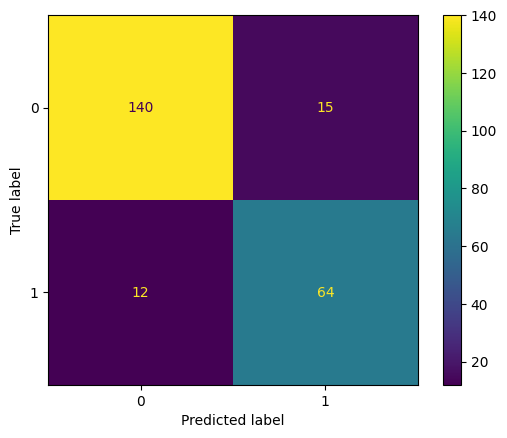

In [ ]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_v3)

ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot();

In [ ]:
accuracy_xgb_final = accuracy_score(y_test, y_pred_xgb_v3)
precision_xgb_final = precision_score(y_test, y_pred_xgb_v3)
recall_xgb_final = recall_score(y_test, y_pred_xgb_v3)
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score_xgb_final = 2 * (precision_xgb_final * recall_xgb_final) / (precision_xgb_final + recall_xgb_final)

print("Accuracy of XGBoost: %.2f%%" % (accuracy_xgb_final*100))
print("Precision of XGBoost: %.2f%%" % (precision_xgb_final*100))
print("Recall of XGBoost: %.2f%%" % (recall_xgb_final*100))
print("F1 score of XGBoost: %.2f" % (f1_score_xgb_final))


Accuracy of XGBoost: 88.31%
Precision of XGBoost: 81.01%
Recall of XGBoost: 84.21%
F1 score of XGBoost: 0.83


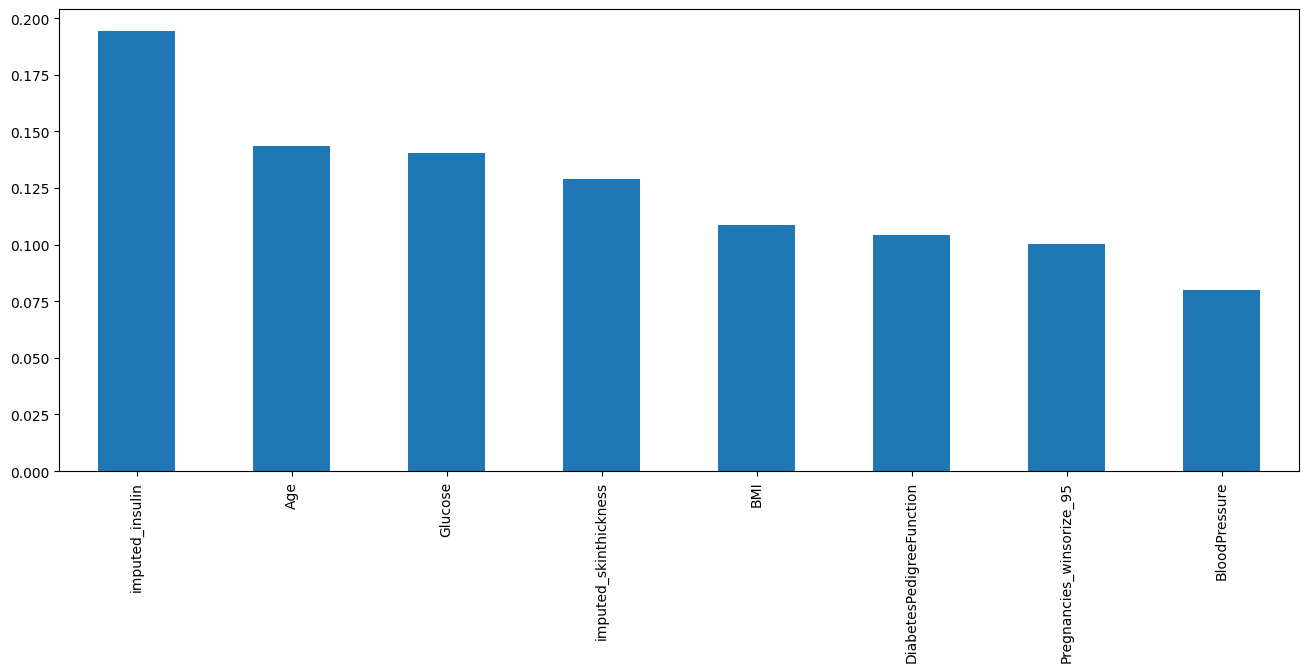

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_xgb = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Bar chart with feature importance in decreasing order
feature_importances_xgb.plot.bar(figsize=(16,6));

In [ ]:
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_xgb = pima_xgb_v3.predict_proba(X_test)[:, 1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_prob_xgb, pos_label=1)

# Compute the ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
roc_auc_xgb

# Area under curve = 0.91 which is quite good

0.9252971137521222

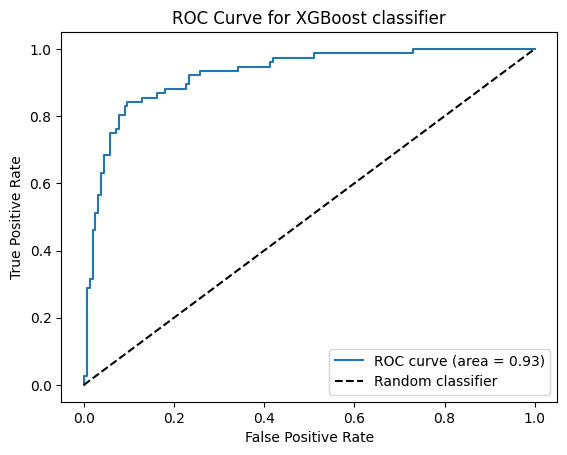

In [ ]:
# Plotting the ROC curve
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc="lower right")
plt.show()

#### Not Including Outcome in Class Mean Imputation

In [ ]:
# Using the same train and test from the Random Forest part
from xgboost import XGBClassifier

# Splitting the data into features (X) and target (y)
X = diabetes_df_working.drop(['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket', 'imputed_skinthickness', 'imputed_insulin'], axis=1)
y = diabetes_df_working['Outcome']

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training the XGBoost classifier
xgb_pima_v1 = XGBClassifier()
xgb_pima_v1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting the model of test set
y_pred_xgb_v1 = xgb_pima_v1.predict(X_test)

accuracy_xgb_v1 = accuracy_score(y_test, y_pred_xgb_v1)
print("Accuracy of base XGBoost model: %.2f%%" % (accuracy_xgb_v1 * 100.0))

Accuracy of base XGBoost model: 76.19%


In [ ]:
# Hyperparameter tuning

param_dist_xgb = {'max_depth': randint(1,10),
                  'n_estimators': randint(1,1000),
                 'learning_rate': [i/10.0 for i in range(3,10)],
                 'subsample': [i/10.0 for i in range(5,10)],
                 'colsample_bytree': [i/10.0 for i in range(5,10)],
                 'min_child_weight': randint(1,10)}

# Create a XGBoost classifier
pima_xgb_v2 = XGBClassifier()

# Use random search to find the best hyperparameters
rand_search_xgb = RandomizedSearchCV(pima_xgb_v2,
                                 param_distributions = param_dist_xgb,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': [0.3, 0.4, 0.5, 0.6,
                                                          0.7, 0.8, 0.9],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95062c0df0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9506330f40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95061518a0>,
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [ ]:
# Create a variable for the best model
best_xgb = rand_search_xgb.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_xgb.best_params_)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.6, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 178, 'subsample': 0.9}


In [ ]:
# Training XGBoost with optimal parameters on training data

pima_xgb_v3 = XGBClassifier(learning_rate = 0.9, max_depth = 3, n_estimators=288,
                            colsample_bytree=0.9, min_child_weight=9, seed=10)
pima_xgb_v3.fit(X_train, y_train)

# Predicting on the test data
y_pred_xgb_v3 = pima_xgb_v3.predict(X_test)

In [ ]:
# Model accuracy from 2nd attempt
accuracy_pima_xgb_v3 = accuracy_score(y_test, y_pred_xgb_v3)
print("Accuracy of XGBoost model with optimal hyperparameters: %.2f%%" % (accuracy_pima_xgb_v3*100))

Accuracy of XGBoost model with optimal hyperparameters: 73.16%


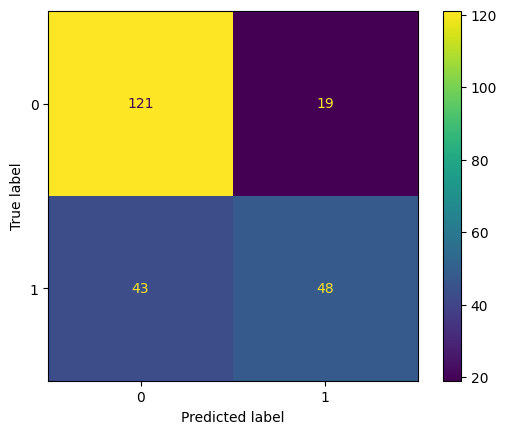

In [ ]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_v3)

ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot()

In [ ]:
accuracy_xgb_final = accuracy_score(y_test, y_pred_xgb_v3)
precision_xgb_final = precision_score(y_test, y_pred_xgb_v3)
recall_xgb_final = recall_score(y_test, y_pred_xgb_v3)
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score_xgb_final = 2 * (precision_xgb_final * recall_xgb_final) / (precision_xgb_final + recall_xgb_final)

print("Accuracy of XGBoost: %.2f%%" % (accuracy_xgb_final*100))
print("Precision of XGBoost: %.2f%%" % (precision_xgb_final*100))
print("Recall of XGBoost: %.2f%%" % (recall_xgb_final*100))
print("F1 score of XGBoost: %.2f" % (f1_score_xgb_final))

Accuracy of XGBoost: 73.16%
Precision of XGBoost: 71.64%
Recall of XGBoost: 52.75%
F1 score of XGBoost: 0.61


<Axes: >

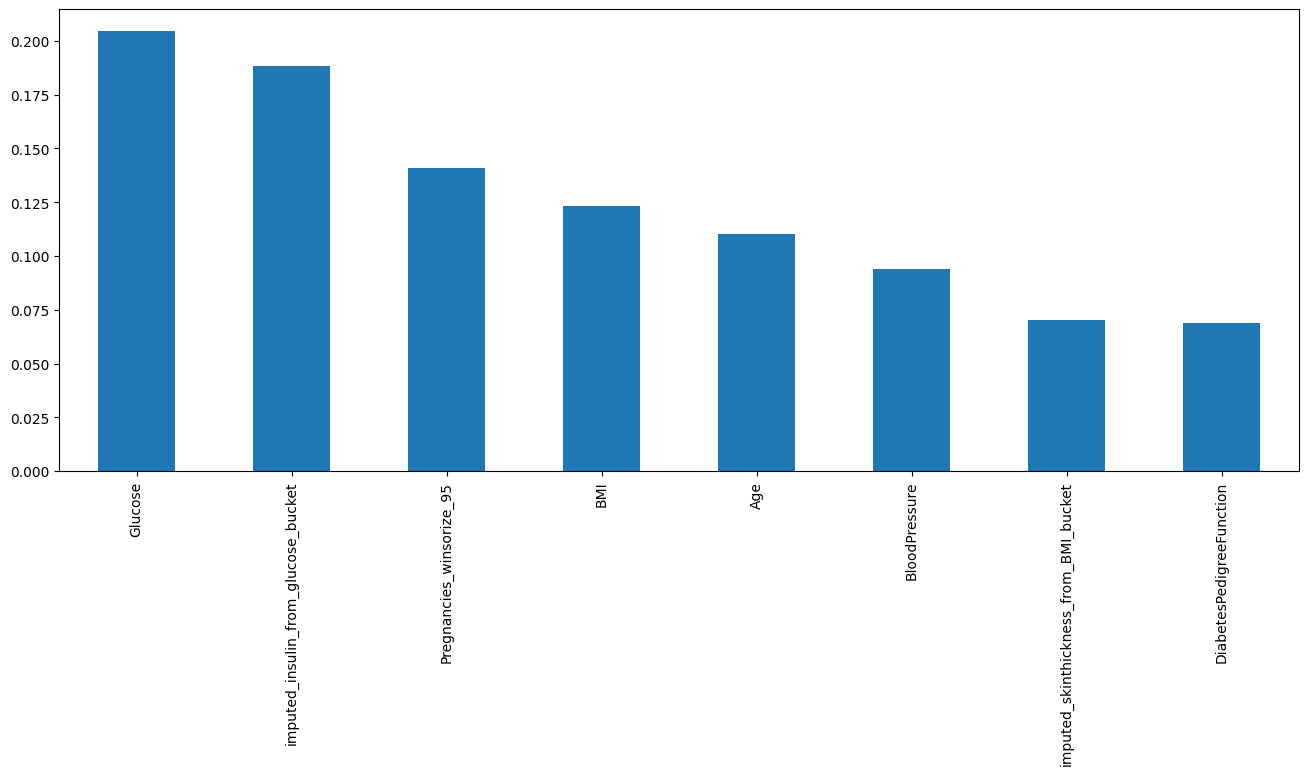

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_xgb = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Bar chart with feature importance in decreasing order
feature_importances_xgb.plot.bar(figsize=(16,6))

In [ ]:
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_xgb = pima_xgb_v3.predict_proba(X_test)[:, 1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_prob_xgb, pos_label=1)

# Compute the ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
roc_auc_xgb

0.7707221350078493

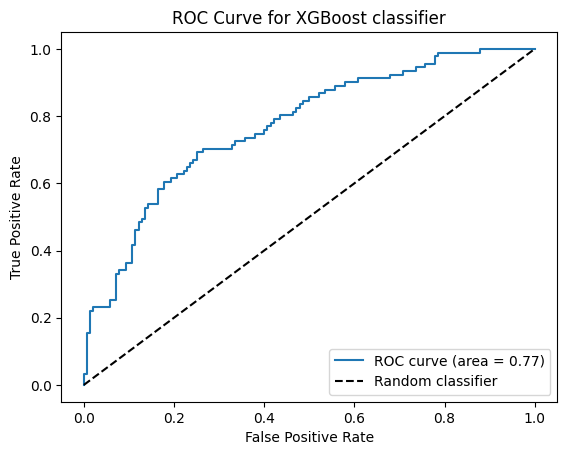

In [ ]:
# Plotting the ROC curve
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Machine - with Outcome being considered for class mean imputations

In [ ]:
# V1 = imputed values contain Outcome in class mean imputation for Insulin and Skin thickness
# Splitting the data into features (X) and target (y)
X = diabetes_df_working.drop(['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket'], axis=1)
y = diabetes_df_working['Outcome']

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Training the Gradient Boosting Machine classifier

gradientBoosting_pima = GradientBoostingClassifier()
gradientBoosting_pima.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predicting the model of test set
y_pred_gradientBoosting_pima= gradientBoosting_pima.predict(X_test)

accuracy_gradientBoosting_pima = accuracy_score(y_test, y_pred_gradientBoosting_pima)
print("Accuracy of Gradient Boosting Machine model: %.2f%%" % (accuracy_gradientBoosting_pima * 100.0))

Accuracy of Gradient Boosting Machine model: 87.88%


In [ ]:
# Hyperparameter tuning

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a Gradient Boosting Machine classifier
pima_gradientBoosting_v2 = GradientBoostingClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(pima_gradientBoosting_v2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9506101840>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95061020e0>})

In [ ]:
# Create a variable for the best model
best_gradientBoosting = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 231}


In [ ]:
# Training Gradient Boosting with optimal parameters on training data
pima_gradientBoosting_v3 = GradientBoostingClassifier(max_depth = 7, n_estimators = 207)
pima_gradientBoosting_v3.fit(X_train, y_train)

# Predicting on the test data
y_pred_gradientBoosting_pima = pima_gradientBoosting_v3.predict(X_test)

In [ ]:
# Model accuracy from 2nd attempt
accuracy_gradientBoosting_pima_v3 = accuracy_score(y_test, y_pred_gradientBoosting_pima)
print("Accuracy of Gradient Boosting machine model with optimal hyperparameters: {} %".format(accuracy_gradientBoosting_pima_v3*100))

Accuracy of Gradient Boosting machine model with optimal hyperparameters: 87.87878787878788 %


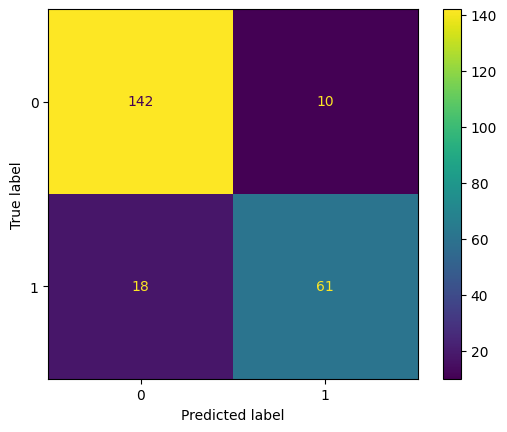

In [ ]:
# Confusion matrix
cm_gradientBoosting = confusion_matrix(y_test, y_pred_gradientBoosting_pima)

ConfusionMatrixDisplay(confusion_matrix=cm_gradientBoosting).plot();

In [ ]:
accuracy_gradientBoosting_pima = accuracy_score(y_test, y_pred_gradientBoosting_pima)
precision_gradientBoosting_pima = precision_score(y_test, y_pred_gradientBoosting_pima)
recall_gradientBoosting_pima = recall_score(y_test, y_pred_gradientBoosting_pima)
f1_score_gradientBoosting_pima = 2 * (precision_gradientBoosting_pima * recall_gradientBoosting_pima) / (precision_gradientBoosting_pima + recall_gradientBoosting_pima)


print("Accuracy of Gradient Boosting machine: %.2f%%" % (accuracy_gradientBoosting_pima*100))
print("Precision of Gradient Boosting machine: %.2f%%" % (precision_gradientBoosting_pima*100))
print("Recall of Gradient Boosting machine: %.2f%%" % (recall_gradientBoosting_pima*100))
print("F1 score of Gradient Boosting machine: %.2f" % (f1_score_gradientBoosting_pima))

Accuracy of Gradient Boosting machine: 87.88%
Precision of Gradient Boosting machine: 85.92%
Recall of Gradient Boosting machine: 77.22%
F1 score of Gradient Boosting machine: 0.81


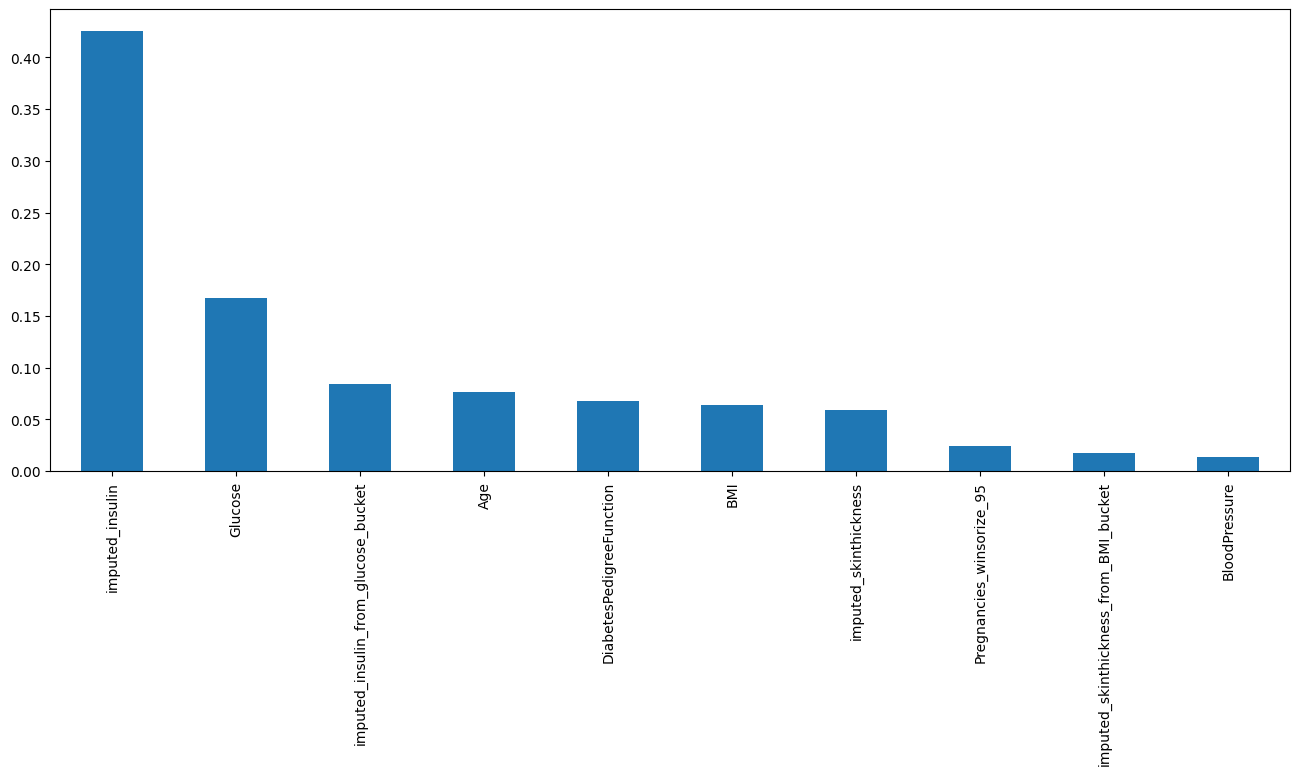

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_gradientBoosting = pd.Series(best_gradientBoosting.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Bar chart with feature importance in decreasing order
feature_importances_gradientBoosting.plot.bar(figsize=(16,6));

In [ ]:
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_gradientBoosting = pima_gradientBoosting_v3.predict_proba(X_test)[:, 1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gradientBoosting, pos_label=1)

# Compute the ROC AUC score
roc_auc_gradientBoosting = roc_auc_score(y_test, y_pred_prob_gradientBoosting)
roc_auc_gradientBoosting

0.9235509660226515

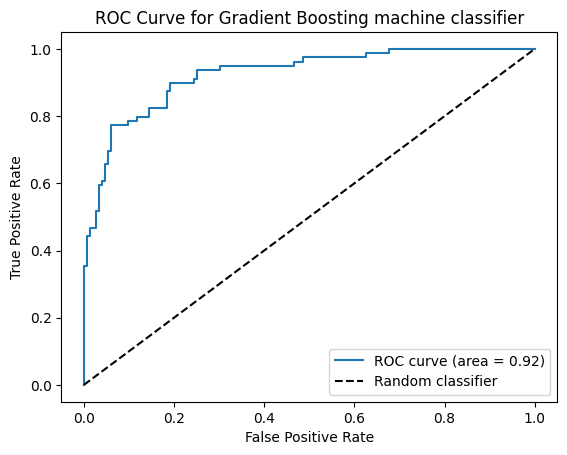

In [ ]:
# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_gradientBoosting)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting machine classifier')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Machine - WITHOUT Outcome being considered for class mean imputations

In [ ]:
# V2 = imputed values don't contain Outcome as class in Insulin and Skin thickness imputations
# Splitting the data into features (X) and target (Y)
X_v2 = diabetes_df_working.drop(['Outcome', 'SkinThickness', 'Insulin', 'Pregnancies', 'Skinthickness_winsorize_95', 'bmi_bucket', 'glucose_bucket', 'imputed_skinthickness', 'imputed_insulin'], axis=1)
y_v2 = diabetes_df_working['Outcome']

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.3, random_state=42, stratify=y_v2)

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Training the Gradient Boosting Machine classifier

gradientBoosting_pima_non_outcome_class = GradientBoostingClassifier()
gradientBoosting_pima_non_outcome_class.fit(X_train_v2, y_train_v2)

GradientBoostingClassifier()

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Predicting the model of test set
y_pred_gradientBoosting_pima_non_outcome_class= gradientBoosting_pima_non_outcome_class.predict(X_test_v2)

accuracy_gradientBoosting_pima_non_outcome_class = accuracy_score(y_test_v2, y_pred_gradientBoosting_pima_non_outcome_class)
print("Accuracy of Gradient Boosting Machine model: %.2f%%" % (accuracy_gradientBoosting_pima_non_outcome_class * 100.0))

Accuracy of Gradient Boosting Machine model: 73.16%


In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Hyperparameter tuning

param_dist_non_outcome_class = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a Gradient Boosting Machine classifier
pima_gradientBoosting_v2_non_outcome_class = GradientBoostingClassifier()

# Use random search to find the best hyperparameters
rand_search_non_outcome_class = RandomizedSearchCV(pima_gradientBoosting_v2_non_outcome_class,
                                 param_distributions = param_dist_non_outcome_class,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search_non_outcome_class.fit(X_train_v2, y_train_v2)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9505ff06a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b9505ff0b20>})

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Create a variable for the best model
best_gradientBoosting_non_outcome_class = rand_search_non_outcome_class.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_non_outcome_class.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 63}


In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Training Gradient Boosting with optimal parameters on training data
pima_gradientBoosting_v3_non_outcome_class = GradientBoostingClassifier(max_depth = 2, n_estimators = 278)
pima_gradientBoosting_v3_non_outcome_class.fit(X_train_v2, y_train_v2)

# Predicting on the test data
y_pred_gradientBoosting_pima_non_outcome_class = pima_gradientBoosting_v3_non_outcome_class.predict(X_test_v2)

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Model accuracy from 2nd attempt
accuracy_gradientBoosting_pima_v3_non_outcome_class = accuracy_score(y_test_v2, y_pred_gradientBoosting_pima_non_outcome_class)
print("Accuracy of Gradient Boosting machine model with optimal hyperparameters: {} %".format(accuracy_gradientBoosting_pima_v3_non_outcome_class*100))

Accuracy of Gradient Boosting machine model with optimal hyperparameters: 73.59307359307358 %


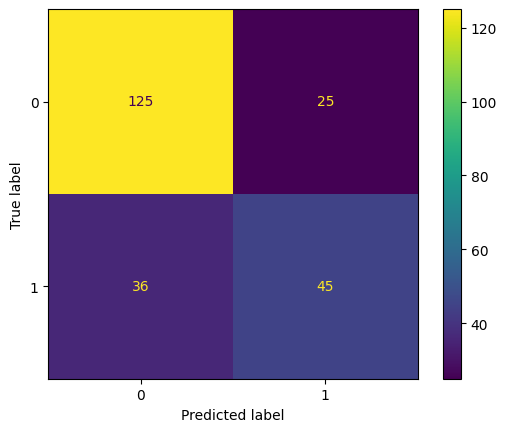

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Confusion matrix
cm_gradientBoosting_non_outcome_class = confusion_matrix(y_test_v2, y_pred_gradientBoosting_pima_non_outcome_class)

ConfusionMatrixDisplay(confusion_matrix=cm_gradientBoosting_non_outcome_class).plot();

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
accuracy_gradientBoosting_pima_non_outcome_class = accuracy_score(y_test_v2, y_pred_gradientBoosting_pima_non_outcome_class)
precision_gradientBoosting_pima_non_outcome_class = precision_score(y_test_v2, y_pred_gradientBoosting_pima_non_outcome_class)
recall_gradientBoosting_pima_non_outcome_class = recall_score(y_test_v2, y_pred_gradientBoosting_pima_non_outcome_class)
f1_score_gradientBoosting_pima_non_outcome_class = 2 * (precision_gradientBoosting_pima_non_outcome_class * recall_gradientBoosting_pima_non_outcome_class) / (precision_gradientBoosting_pima_non_outcome_class + recall_gradientBoosting_pima_non_outcome_class)


print("Accuracy of Gradient Boosting machine: %.2f%%" % (accuracy_gradientBoosting_pima_non_outcome_class*100))
print("Precision of Gradient Boosting machine: %.2f%%" % (precision_gradientBoosting_pima_non_outcome_class*100))
print("Recall of Gradient Boosting machine: %.2f%%" % (recall_gradientBoosting_pima_non_outcome_class*100))
print("F1 score of Gradient Boosting machine: %.2f" % (f1_score_gradientBoosting_pima_non_outcome_class))

Accuracy of Gradient Boosting machine: 73.59%
Precision of Gradient Boosting machine: 64.29%
Recall of Gradient Boosting machine: 55.56%
F1 score of Gradient Boosting machine: 0.60


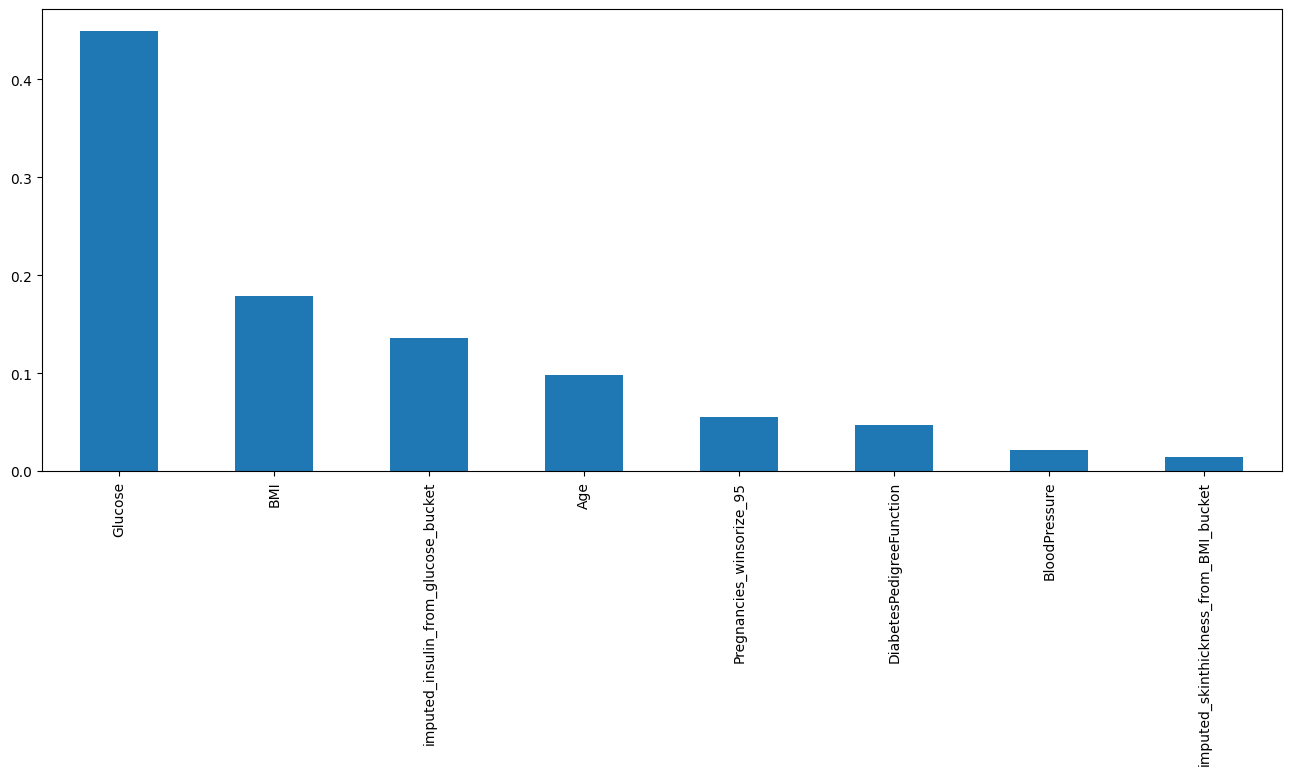

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_gradientBoosting_non_outcome_class = pd.Series(best_gradientBoosting_non_outcome_class.feature_importances_, index=X_train_v2.columns).sort_values(ascending=False)

# Bar chart with feature importance in decreasing order
feature_importances_gradientBoosting_non_outcome_class.plot.bar(figsize=(16,6));

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_gradientBoosting_non_outcome_class = pima_gradientBoosting_v3_non_outcome_class.predict_proba(X_test_v2)[:, 1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr_non_outcome_class, tpr_non_outcome_class, thresholds_non_outcome_class = roc_curve(y_test_v2, y_pred_prob_gradientBoosting_non_outcome_class, pos_label=1)

# Compute the ROC AUC score
roc_auc_gradientBoosting_non_outcome_class = roc_auc_score(y_test_v2, y_pred_prob_gradientBoosting_non_outcome_class)
roc_auc_gradientBoosting_non_outcome_class

0.8176131687242798

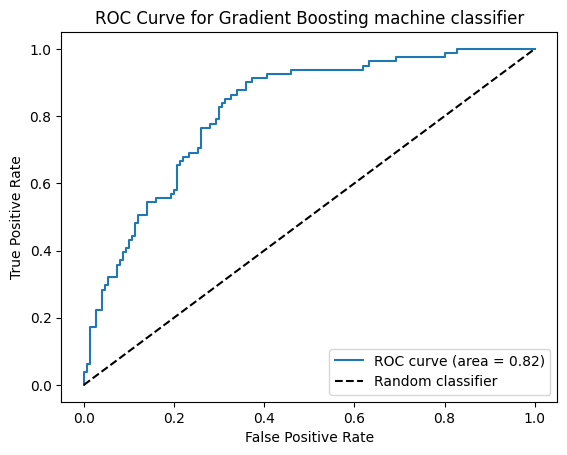

In [ ]:
# Running another version with the variables that don't contain Outcome in class mean imputation
# Plotting the ROC curve
plt.plot(fpr_non_outcome_class, tpr_non_outcome_class, label='ROC curve (area = %0.2f)' % roc_auc_gradientBoosting_non_outcome_class)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting machine classifier')
plt.legend(loc="lower right")
plt.show()

## GBM baseline model with raw data

In [ ]:
# V3 = raw data
# Splitting the data into features (X) and target (Y)
X_raw_data = diabetes_df.drop(['Outcome'], axis=1)
y_raw_data = diabetes_df['Outcome']

# Split the data into training and test sets
# 70% will be training and 30% will be test
X_train_raw_data, X_test_raw_data, y_train_raw_data, y_test_raw_data = train_test_split(X_raw_data, y_raw_data, test_size=0.3, random_state=42, stratify=y_raw_data)

In [ ]:
# Running baseline model with raw data
# Training the Gradient Boosting Machine classifier

gradientBoosting_pima_raw_data = GradientBoostingClassifier()
gradientBoosting_pima_raw_data.fit(X_train_raw_data, y_train_raw_data)

GradientBoostingClassifier()

In [ ]:
# Running baseline model with raw data
# Predicting the model of test set
y_pred_gradientBoosting_pima_raw_data= gradientBoosting_pima_raw_data.predict(X_test_raw_data)

accuracy_gradientBoosting_pima_raw_data = accuracy_score(y_test_raw_data, y_pred_gradientBoosting_pima_raw_data)
print("Accuracy of Gradient Boosting Machine model: %.2f%%" % (accuracy_gradientBoosting_pima_raw_data * 100.0))

Accuracy of Gradient Boosting Machine model: 75.76%


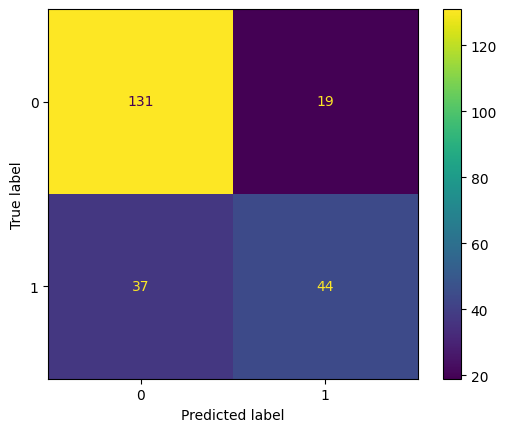

In [ ]:
# Running baseline model with raw data
# Confusion matrix
cm_gradientBoosting_raw_data = confusion_matrix(y_test_raw_data, y_pred_gradientBoosting_pima_raw_data)

ConfusionMatrixDisplay(confusion_matrix=cm_gradientBoosting_raw_data).plot();

In [ ]:
# Running baseline model with raw data
accuracy_gradientBoosting_pima_raw_data = accuracy_score(y_test_raw_data, y_pred_gradientBoosting_pima_raw_data)
precision_gradientBoosting_pima_raw_data = precision_score(y_test_raw_data, y_pred_gradientBoosting_pima_raw_data)
recall_gradientBoosting_pima_raw_data = recall_score(y_test_raw_data, y_pred_gradientBoosting_pima_raw_data)
f1_score_gradientBoosting_pima_raw_data = 2 * (precision_gradientBoosting_pima_raw_data * recall_gradientBoosting_pima_raw_data) / (precision_gradientBoosting_pima_raw_data + recall_gradientBoosting_pima_raw_data)


print("Accuracy of Gradient Boosting machine: %.2f%%" % (accuracy_gradientBoosting_pima_raw_data*100))
print("Precision of Gradient Boosting machine: %.2f%%" % (precision_gradientBoosting_pima_raw_data*100))
print("Recall of Gradient Boosting machine: %.2f%%" % (recall_gradientBoosting_pima_raw_data*100))
print("F1 score of Gradient Boosting machine: %.2f" % (f1_score_gradientBoosting_pima_raw_data))

Accuracy of Gradient Boosting machine: 75.76%
Precision of Gradient Boosting machine: 69.84%
Recall of Gradient Boosting machine: 54.32%
F1 score of Gradient Boosting machine: 0.61


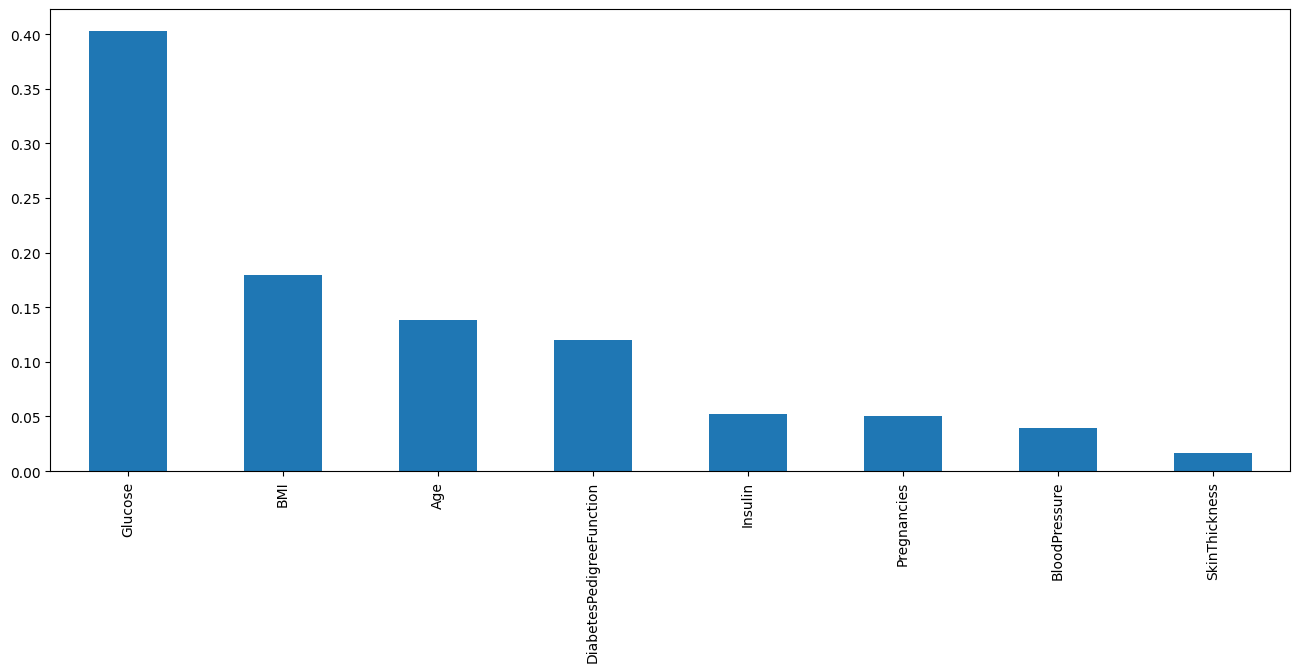

In [ ]:
# Running baseline model with raw data
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_gradientBoosting_raw_data = pd.Series(gradientBoosting_pima_raw_data.feature_importances_, index=X_train_raw_data.columns).sort_values(ascending=False)

# Bar chart with feature importance in decreasing order
feature_importances_gradientBoosting_raw_data.plot.bar(figsize=(16,6));

In [ ]:
# Running baseline model with raw data
# ROC curve

#Getting predicted class probabilities for the test set
y_pred_prob_gradientBoosting_raw_data = gradientBoosting_pima_raw_data.predict_proba(X_test_raw_data)[:, 1]

# Computing the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr_raw_data, tpr_raw_data, thresholds_raw_data = roc_curve(y_test_raw_data, y_pred_prob_gradientBoosting_raw_data, pos_label=1)

# Compute the ROC AUC score
roc_auc_gradientBoosting_raw_data = roc_auc_score(y_test_raw_data, y_pred_prob_gradientBoosting_raw_data)
roc_auc_gradientBoosting_raw_data

0.8353086419753086

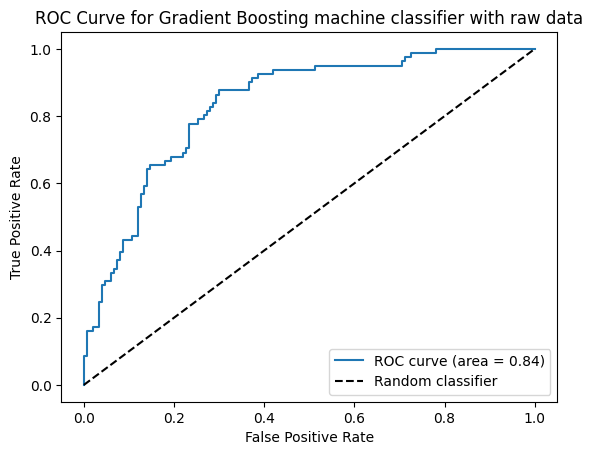

In [ ]:
# Running baseline model with raw data
# Plotting the ROC curve
plt.plot(fpr_raw_data, tpr_raw_data, label='ROC curve (area = %0.2f)' % roc_auc_gradientBoosting_raw_data)
# ROC curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting machine classifier with raw data')
plt.legend(loc="lower right")
plt.show()

## Shapley values

In [ ]:
tree_model_for_shap = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model_for_shap)

# calculate shap values for plotting
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],X_test)


ModuleNotFoundError: ignored

## All other code snippets

In [ ]:
# Creating split datasets for diabetes = 0 and diabetes = 1
# Required for plotting
diabetes_df_1 = diabetes_df[diabetes_df['Outcome'] == 1]
diabetes_df_0 = diabetes_df[diabetes_df['Outcome'] == 0]

In [ ]:
# Distribution plotting function
def combined_plot_distribution(feature, bin_size) :
    # 2 datasets for 1 vs 0
    tmp1 = diabetes_df_1[feature]
    tmp2 = diabetes_df_0[feature]
    hist_data = [tmp1, tmp2]

    group_labels = ['Diabetic', 'Non diabetic']
    colors = ['orange', 'blue']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True,
                             bin_size = bin_size, curve_type='kde')

    fig['layout'].update(title = 'Outcome comparison plot of ' + feature)

    py.iplot(fig, filename = 'Density plot')

In [ ]:
# Comparative distribution plot for BMI
# Colors can be changed in above function
combined_plot_distribution('BMI', 0)

In [ ]:
# Comparative distribution plot for DPF
# Colors can be changed in above function
combined_plot_distribution('DiabetesPedigreeFunction', 0)

In [ ]:
# Comparative distribution plot for Age
# Colors can be changed in above function
combined_plot_distribution('Age', 5)

# Younger women seem to be less prone to diabetes

In [ ]:
# use corr() method on dataframe to make correlation matrix
# corr for raw data
matrix = diabetes_df.corr(numeric_only = True)

# print correlation matrix
print("Correlation Matrix is : ")
matrix

## Follow steps for hyperparameter tuning, confusion matrix, etc. from https://www.datacamp.com/tutorial/random-forests-classifier-python

Shap not working in google collab